# Credit EDA Assignment

# Problem statement
Business Understanding
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specializes in lending various types of loans to urban customers. You have to use EDA to analyze the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 
Exploratory Data Analysis study aims to identify patterns that indicate if an applicant will repay their instalments which may be used for taking further actions such as denying the loan, reducing the amount of loan, lending at a higher interest rate, etc. This will make sure that the applicants capable of repaying the loan are not rejected. 


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

#  A. Data Understanding 
#  1.Reading data

In [3]:
df1=pd.read_csv('application_data.csv') # reading data application_data
df_2=pd.read_csv('previous_application.csv') # reading data previous_application

In [4]:
# Displaying all the rows and columns from the data
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
df1.head(5) # showing 5 top rows of data


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [6]:
# shape of csv file
df1.shape 

(307511, 122)

In [7]:
# checking the data types 
df1.dtypes 

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [8]:
# checking the data types count 
df1.dtypes.value_counts() 

float64    65
int64      41
object     16
dtype: int64

# 2.Checking the missing values

In [10]:

df1.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [11]:
percent_missing = df1.isnull().sum() * 100 / len(df1)
percent_missing

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [12]:
# checking columns with more than 35% of missing values
len(percent_missing[percent_missing.values>35])
percent_missing=percent_missing[percent_missing.values>35]
len(percent_missing[percent_missing.values>35])


49

In [13]:
percent_missing

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

# 3.Removing column which has missing data more than 35 %


In [13]:
# Renoving column which has missing data more than 35 %
df1.drop(percent_missing.index, axis=1, inplace = True)
df1.shape

(307511, 73)

In [14]:
df1.head(4)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Governmen

In [15]:
null=df1.isnull().sum()
fill=df1.isnull().sum()[null>0]
fill

AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
OCCUPATION_TYPE               96391
CNT_FAM_MEMBERS                   2
EXT_SOURCE_2                    660
EXT_SOURCE_3                  60965
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
DAYS_LAST_PHONE_CHANGE            1
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64

In [17]:
# considering to imp columns
d=df1[['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OCCUPATION_TYPE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','ORGANIZATION_TYPE']]

In [18]:
d.head(1)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0            -2120        Laborers              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   

        ORGANIZATION_TYPE  
0  Business Entity Type 3

In [19]:
d.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
count      307511.000000    307511.000000    307509.000000   
mean        -4986.120328     -2994.202373         2.152665   
std          3522.886321      1509.450419         0.910682   
min        -24672.000000     -7197.000000         1.000000   
25%         -7479.500000     -4299.000000         2.000000   
50%         -4504.000000     -3254.000000         2.000000   
75%         -2010.000000     -1720.000000         3.000000   
max             0.000000         0.000000        20.000000   

       REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count         307511.000000                307511.000000   
mean               2.052463                     2.031521   
std                0.509034                     0.502737   
min                1.000000                     1.000000   
25%                2.000000                     2.000000   
50%                2.000000                     2.000000   
75%                2.000000                     2.000000   
max                3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count            307511.000000               307511.000000   
mean                 12.063419                    0.015144   
std                   3.265832                    0.122126   
min                   0.000000                    0.000000   
25%                  10.000000                    0.000000   
50%                  12.000000                    0.000000   
75%                  14.000000                    0.000000   
max                  23.000000                    1.000000   

       REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
count               307511.000000                307511.000000   
mean                     0.050769                     0.040659   
std                      0.219526                     0.197499   
min                      0.000000                     0.000000   
25%                      0.000000                     0.000000   
50%                      0.000000                     0.000000   
75%                      0.000000                     0.000000   
max                      1.000000                     1.000000   

       

In [20]:
d.shape

(307511, 34)

# 4. Handling Nulls

In [21]:
d.isnull().sum() # There are four columns with null


SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
R

In [22]:
# values to be used for filling null values
mean1=d.AMT_ANNUITY.mean()
mean2=d.AMT_GOODS_PRICE.mean()
mode1=d.NAME_TYPE_SUITE.mode()[0]
mode2=d.OCCUPATION_TYPE.mode()[0]                
median1=d.CNT_FAM_MEMBERS.median()   
print(mode1,mode2,median1)

Unaccompanied Laborers 2.0


In [23]:
d['AMT_ANNUITY'].fillna(mean1,inplace=True) 

In [24]:
d['AMT_GOODS_PRICE'].fillna(mean2,inplace=True) 

In [25]:
d['NAME_TYPE_SUITE'].fillna(mode1,inplace=True) # filling Unaccompanied in NAME_TYPE_SUITE column

In [26]:
d['OCCUPATION_TYPE'].fillna(mode2,inplace=True)  # filling Laborers  in OCCUPATION_TYPE column

In [27]:
d['CNT_FAM_MEMBERS'].fillna(median1,inplace=True)  # filling 2.0(median) in CNT_FAM_MEMBERS column

In [ ]:
# 5.Checking data types 

In [28]:
category_col=d.select_dtypes(exclude=[np.number])
for cols in list (category_col):
    print(d[cols].value_counts())
    print('-'*30)

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
------------------------------
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
------------------------------
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
------------------------------
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
------------------------------
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
------------------------------
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64
------------------------------
Secondary / secondary special

In [29]:
numerical_col=d.select_dtypes(include=[np.number])
for cols in list (numerical_col):
    print(d[cols].describe())
    print('-'*30)

count    307511.000000
mean     278180.518577
std      102790.175348
min      100002.000000
25%      189145.500000
50%      278202.000000
75%      367142.500000
max      456255.000000
Name: SK_ID_CURR, dtype: float64
------------------------------
count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64
------------------------------
count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64
------------------------------
count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64
------------------------------
count    3.0

In [30]:
d['CNT_FAM_MEMBERS']=d['CNT_FAM_MEMBERS'].astype('int64') # converting count of family memeber to integer type
d.DAYS_EMPLOYED = d.DAYS_EMPLOYED.apply(lambda x: abs(x)) # converting into positive integer
d.DAYS_REGISTRATION = d.DAYS_REGISTRATION.apply(lambda x: abs(x)) # converting into positive integer
d.DAYS_ID_PUBLISH = d.DAYS_ID_PUBLISH.apply(lambda x: abs(x)) # converting into positive integer
d.DAYS_BIRTH=d.DAYS_BIRTH.apply(lambda x:abs(x)) # converting DAYS_BIRTH into positive integer

# 5.Separating in categorical and numerical columns

In [31]:
category_col=d.select_dtypes(exclude=[np.number])
category_col.head()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY NAME_TYPE_SUITE  \
0         Cash loans           M            N               Y   Unaccompanied   
1         Cash loans           F            N               N          Family   
2    Revolving loans           M            Y               Y   Unaccompanied   
3         Cash loans           F            N               Y   Unaccompanied   
4         Cash loans           M            N               Y   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
0  House / apartment        Laborers                  WEDNESDAY   
1  House / apartment      Core staff                     MONDAY   
2  House / apartment        Laborers                     MONDAY   
3  House / apartment        Laborers                  WEDNESDAY   
4  House / apartment      Core staff                   THURSDAY   

        ORGANIZATION_TYPE  
0  Business Entity Type 3  
1                  School  
2              Government  
3  Business Entity Type 3  
4                Religion

In [32]:
numerical_col=d.select_dtypes(include=[np.number])
numerical_col.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0          202500.0    406597.5   
1      100003       0             0          270000.0   1293502.5   
2      100004       0             0           67500.0    135000.0   
3      100006       0             0          135000.0    312682.5   
4      100007       0             0          121500.0    513000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0      24700.5         351000.0                    0.018801        9461   
1      35698.5        1129500.0                    0.003541       16765   
2       6750.0         135000.0                    0.010032       19046   
3      29686.5         297000.0                    0.008019       19005   
4      21865.5         513000.0                    0.028663       19932   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
0            637             3648.0             2120                1   
1           1188             1186.0              291                2   
2            225             4260.0             2531                1   
3           3039             9833.0             2437                2   
4           3038             4311.0             3458                1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                     2                            2                       10   
1                     1                            1                       11   
2                     2                            2                        9   
3                     2                            2                       17   
4                     2                            2                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  
0                       0                        0  
1                       0                        0  
2                       0                        0  
3                       0                        0  
4                       1                        1

# Univariate analysis for Numerical variables

In [33]:
d.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307511.000000     3.075110e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.454517     3.692794e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868   16036.995067   67724.742149   
std                      0.013831    4363.988632  139443.751806   
min                      0.000290    7489.000000       0.000000   
25%                      0.010006   12413.000000     933.000000   
50%                      0.018850   15750.000000    2219.000000   
75%                      0.028663   19682.000000    5707.000000   
max                      0.072508   25229.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
count      307511.000000    307511.000000    307511.000000   
mean         4986.120328      2994.202373         2.152664   
std          3522.886321      1509.450419         0.910679   
min             0.000000         0.000000         1.000000   
25%          2010.000000      1720.000000         2.000000   
50%          4504.000000      3254.000000         2.000000   
75%          7479.500000      4299.000000         3.000000   
max         24672.000000      7197.000000        20.000000   

       REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count         307511.000000                307511.000000   
mean               2.052463                     2.031521   
std                0.509034                     0.502737   
min                1.000000                     1.000000   
25%                2.000000                     2.000000   
50%                2.000000                     2.000000   
75%                2.000000                     2.000000   
max                3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count            307511.000000               307511.000000   
mean                 12.063419                    0.015144   
std                   3.265832                    0.122126   
min                   0.000000                    0.000000   
25%                  10.000000                    0.000000   
50%                  12.000000                    0.000000   
75%                  14.000000                    0.000000   
max                  23.000000                    1.000000   

       REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
count               307511.000000                307511.000000   
mean                     0.050769                     0.040659   
std                      0.219526                     0.197499   
min                      0.000000                     0.000000   
25%                      0.000000                     0.000000   
50%                      0.000000                     0.000000   
75%                      0.000000                     0.000000   
max                      1.000000                     1.000000   

       

In [34]:
# Checking outliers for this columns.
#CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,CNT_FAM_MEMBERS

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64


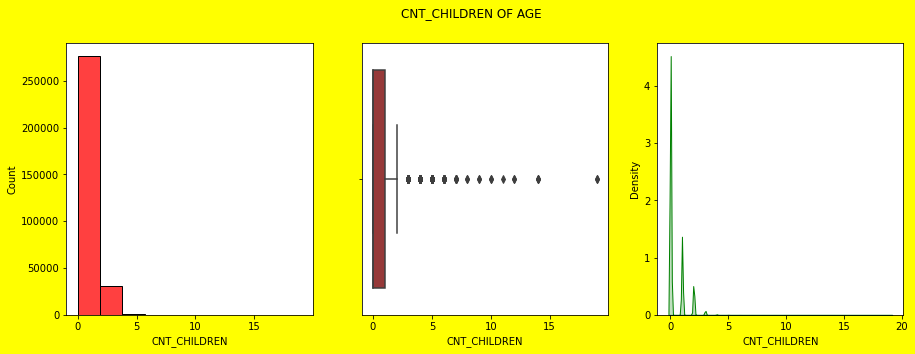

In [35]:
print(d.CNT_CHILDREN.describe())

plt.figure(figsize=(15,5),facecolor='yellow')
plt.suptitle('CNT_CHILDREN OF AGE')
plt.subplot(131)
sns.histplot(x = d['CNT_CHILDREN'], color = "red",bins=(10)) 
plt.subplot(132)
sns.boxplot(x = d['CNT_CHILDREN'], color = "brown") 
plt.subplot(133)
sns.kdeplot(x=d['CNT_CHILDREN'],color='green',shade=True)
plt.show()

# Conclusion:
1. Most of the people have 1-2 count of children
2. There are also outliers present.

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


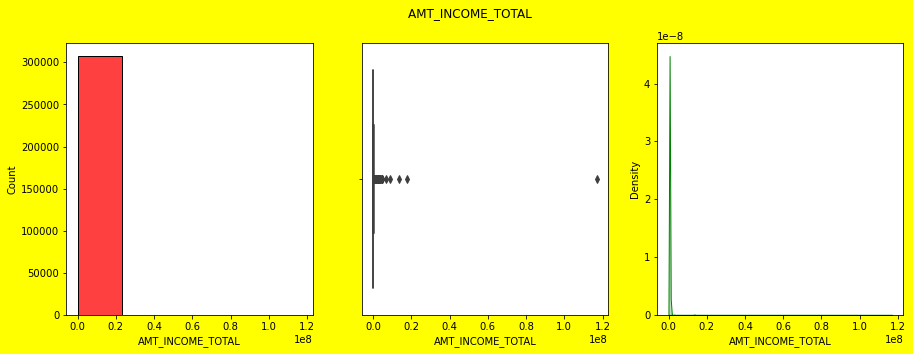

In [36]:
print(d.AMT_INCOME_TOTAL.describe())

plt.figure(figsize=(15,5),facecolor='yellow')
plt.suptitle('AMT_INCOME_TOTAL ')
plt.subplot(131)
sns.histplot(x = d['AMT_INCOME_TOTAL'], color = "red",bins=(5)) 
plt.subplot(132)
sns.boxplot(x = d['AMT_INCOME_TOTAL'], color = "brown") 
plt.subplot(133)
sns.kdeplot(x=d['AMT_INCOME_TOTAL'],color='green',shade=True)
plt.show()

# Conclusion:
1. 1.687979e+05 is mean income amount of all data set
2. There is outliers present.

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


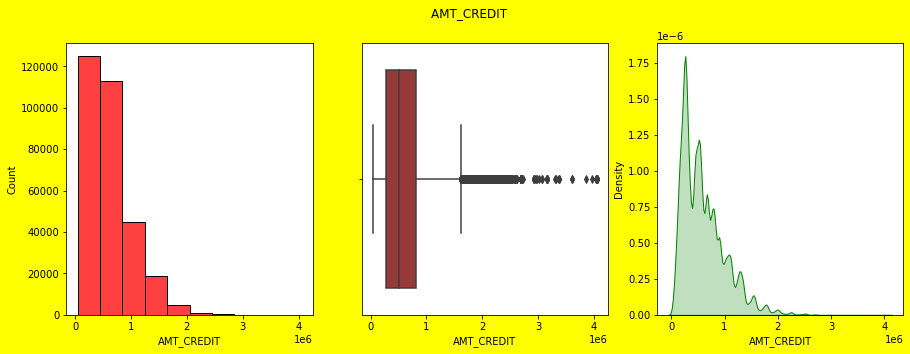

In [37]:
print(d.AMT_CREDIT.describe())

plt.figure(figsize=(15,5),facecolor='yellow')
plt.suptitle('AMT_CREDIT ')
plt.subplot(131)
sns.histplot(x = d['AMT_CREDIT'], color = "red",bins=(10)) 
plt.subplot(132)
sns.boxplot(x = d['AMT_CREDIT'], color = "brown") 
plt.subplot(133)
sns.kdeplot(x=d['AMT_CREDIT'],color='green',shade=True)
plt.show()

# Conclusion:
1. 5.990260e+05 is mean amount credit of all data set
2. There is outliers present.

count    307511.000000
mean      27108.573909
std       14493.454517
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


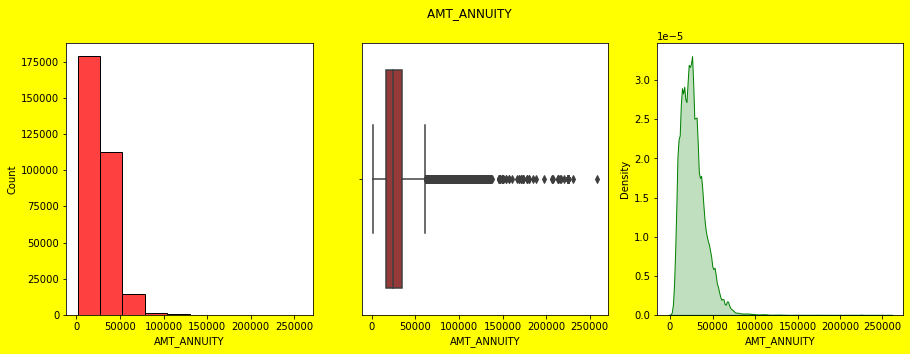

In [38]:
print(d.AMT_ANNUITY.describe())

plt.figure(figsize=(15,5),facecolor='yellow')
plt.suptitle('AMT_ANNUITY ')
plt.subplot(131)
sns.histplot(x = d['AMT_ANNUITY'], color = "red",bins=(10)) 
plt.subplot(132)
sns.boxplot(x = d['AMT_ANNUITY'], color = "brown") 
plt.subplot(133)
sns.kdeplot(x=d['AMT_ANNUITY'],color='green',shade=True)
plt.show()

# Conclusion:
1. Most of amt_annunity is between 16000-34000.
2. There is outliers present.

count    3.075110e+05
mean     5.383962e+05
std      3.692794e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


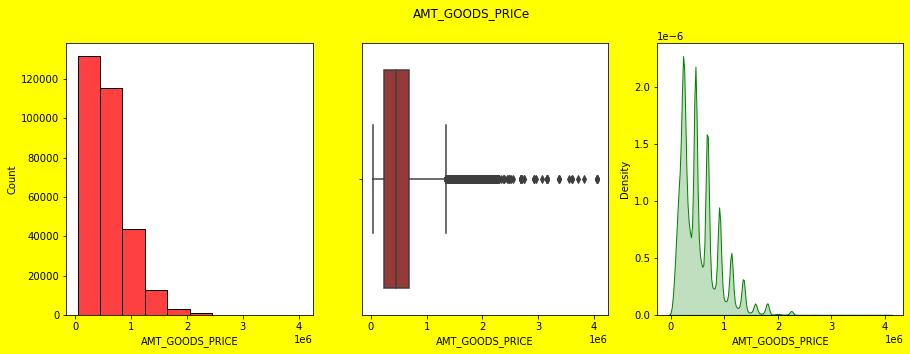

In [39]:
print(d.AMT_GOODS_PRICE.describe())

plt.figure(figsize=(15,5),facecolor='yellow')
plt.suptitle('AMT_GOODS_PRICe')
plt.subplot(131)
sns.histplot(x = d['AMT_GOODS_PRICE'], color = "red",bins=(10)) 
plt.subplot(132)
sns.boxplot(x = d['AMT_GOODS_PRICE'], color = "brown") 
plt.subplot(133)
sns.kdeplot(x=d['AMT_GOODS_PRICE'],color='green',shade=True)
plt.show()

# Conclusion:
 1.From Kdeplot we can see that it is right skewed    

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


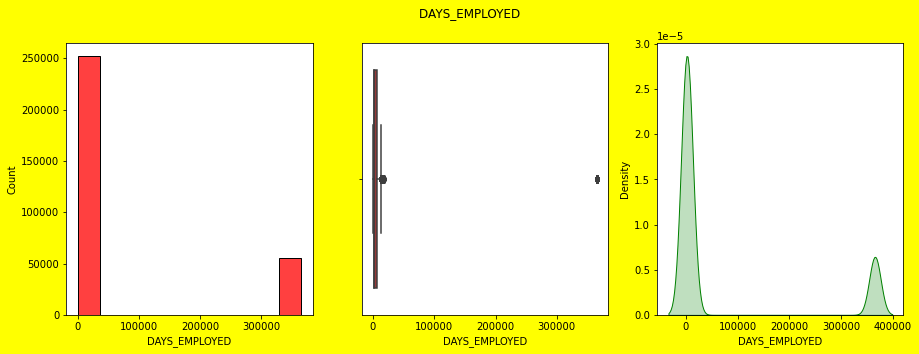

In [40]:
print(d.DAYS_EMPLOYED.describe())

plt.figure(figsize=(15,5),facecolor='yellow')
plt.suptitle('DAYS_EMPLOYED ')
plt.subplot(131)
sns.histplot(x = d['DAYS_EMPLOYED'], color = "red",bins=(10)) 
plt.subplot(132)
sns.boxplot(x = d['DAYS_EMPLOYED'], color = "brown") 
plt.subplot(133)
sns.kdeplot(x=d['DAYS_EMPLOYED'],color='green',shade=True)
plt.show()

# Conclusion:
1. 75% of people have have days employed 5700
2. There is outliers present in data. 

count    307511.000000
mean          2.152664
std           0.910679
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


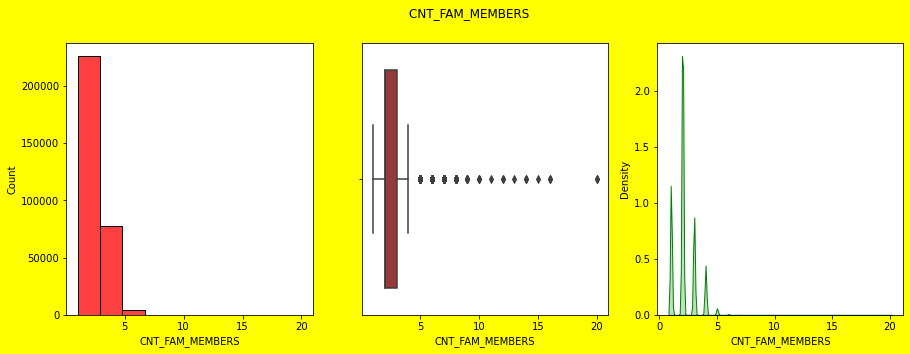

In [41]:
print(d.CNT_FAM_MEMBERS.describe())

plt.figure(figsize=(15,5),facecolor='yellow')
plt.suptitle('CNT_FAM_MEMBERS ')
plt.subplot(131)
sns.histplot(x = d['CNT_FAM_MEMBERS'], color = "red",bins=(10)) 
plt.subplot(132)
sns.boxplot(x = d['CNT_FAM_MEMBERS'], color = "brown") 
plt.subplot(133)
sns.kdeplot(x=d['CNT_FAM_MEMBERS'],color='green',shade=True)
plt.show()

# Conclusion :
1.75% of CNT_FAM_MEMBERS is at 3 member only.

2.There are outliers present.

0    282686
1     24825
Name: TARGET, dtype: int64


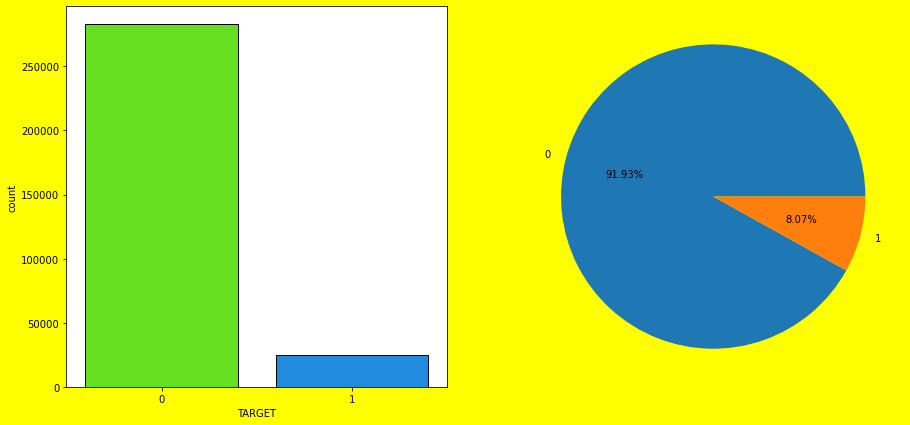

In [42]:
print(d['TARGET'].value_counts())
plt.figure(figsize=(15,7),facecolor='yellow')
plt.subplot(121)
sns.countplot(x=d['TARGET'],ec='black',palette='gist_rainbow')
plt.subplot(122)
perc=d['TARGET'].value_counts()
lbl=list(d['TARGET'].value_counts().index)
plt.pie(perc,labels=lbl,autopct='%.2f%%')


plt.show()


# Conclusion:
1.91.93% people were able to pay on time.

2.8.07% people were able to pay on time.

# B. Univariate Analysis of Categorical Variable

In [43]:
category_col.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64


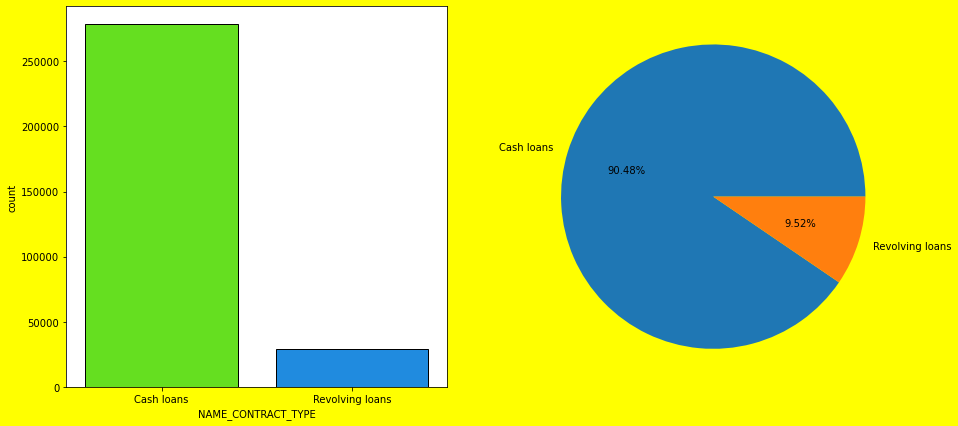

In [44]:
print(d['NAME_CONTRACT_TYPE'].value_counts())
plt.figure(figsize=(15,7),facecolor='yellow')
plt.subplot(121)
sns.countplot(x=d['NAME_CONTRACT_TYPE'],ec='black',palette='gist_rainbow')
plt.subplot(122)
perc=d['NAME_CONTRACT_TYPE'].value_counts()
lbl=list(d['NAME_CONTRACT_TYPE'].value_counts().index)
plt.pie(perc,labels=lbl,autopct='%.2f%%')
plt.show()


# Conclusion :
1.Revoling loans are less compared to cash loans.

In [46]:
category_col.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [47]:
d.shape

(307511, 34)

In [48]:
def num_graph(n):
    print(d[n].describe())
    plt.figure(figsize=(15,5),facecolor='yellow')
    print('                                   ', 'Distribution of ',d[n].name)
    #plt.suptitle(d[n])
    plt.subplot(131)
    sns.histplot(x = d[n], color = "red",bins=(10)) 
    plt.subplot(132)
    sns.boxplot(x = d[n], color = "brown") 
    plt.subplot(133)
    sns.kdeplot(x=d[n],color='green',shade=True)
    plt.show()
    

count    307511.000000
mean     278180.518577
std      102790.175348
min      100002.000000
25%      189145.500000
50%      278202.000000
75%      367142.500000
max      456255.000000
Name: SK_ID_CURR, dtype: float64
                                    Distribution of  SK_ID_CURR


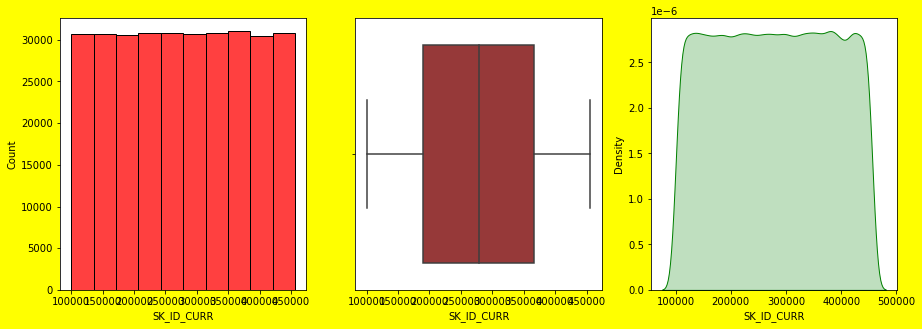

count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64
                                    Distribution of  TARGET


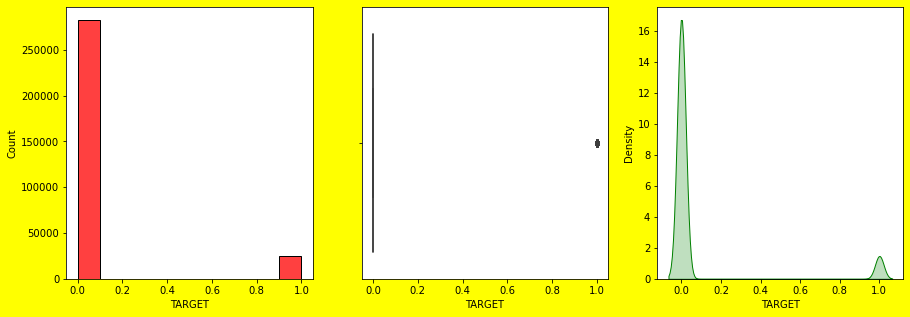

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64
                                    Distribution of  CNT_CHILDREN


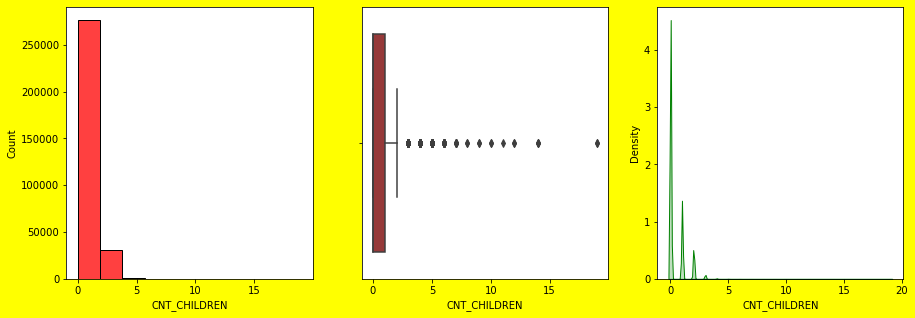

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64
                                    Distribution of  AMT_INCOME_TOTAL


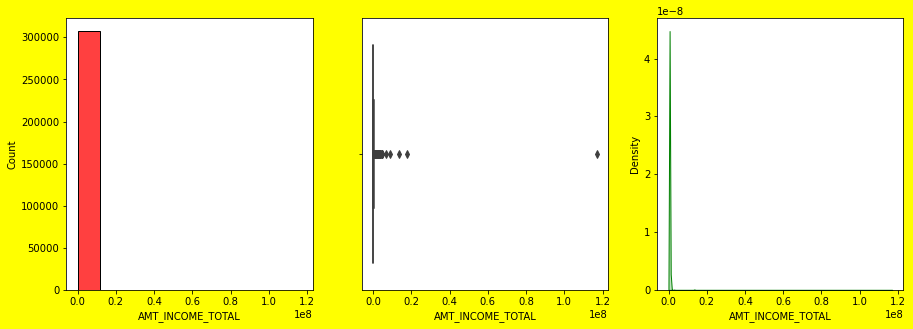

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64
                                    Distribution of  AMT_CREDIT


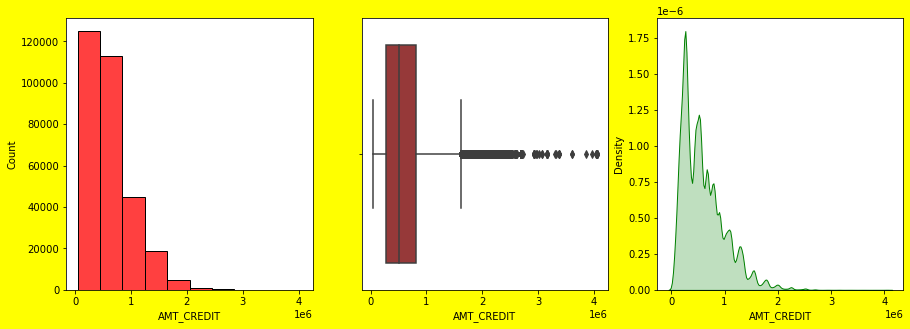

count    307511.000000
mean      27108.573909
std       14493.454517
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64
                                    Distribution of  AMT_ANNUITY


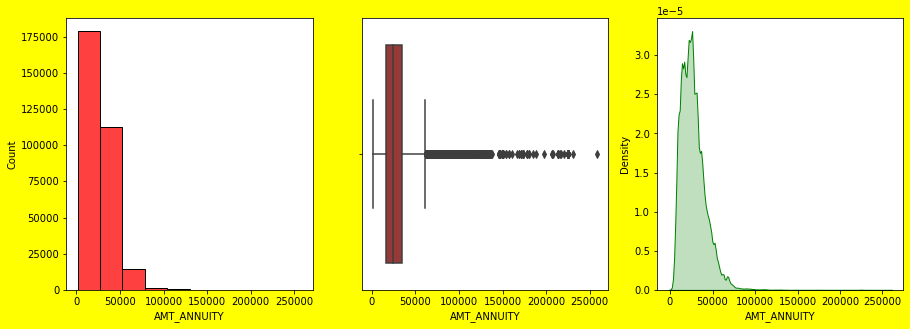

count    3.075110e+05
mean     5.383962e+05
std      3.692794e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64
                                    Distribution of  AMT_GOODS_PRICE


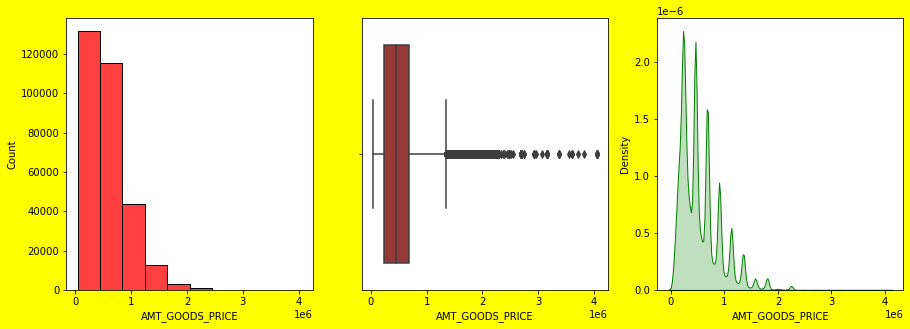

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64
                                    Distribution of  REGION_POPULATION_RELATIVE


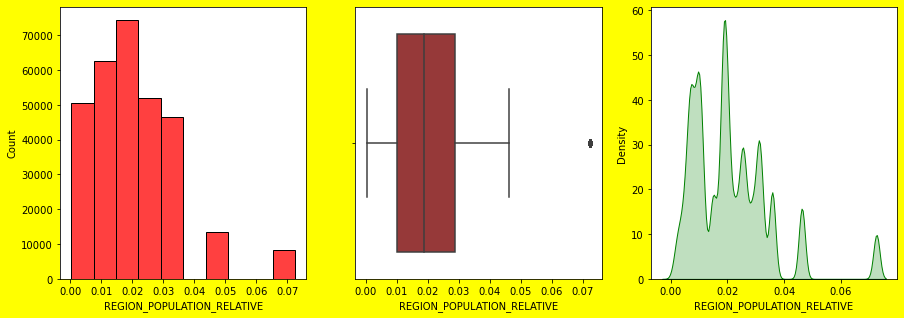

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64
                                    Distribution of  DAYS_BIRTH


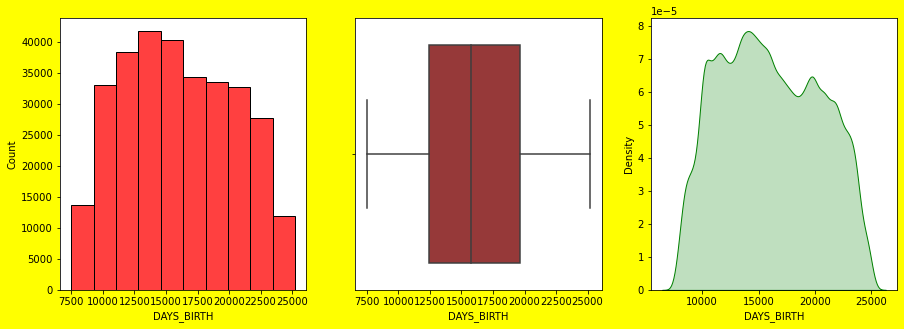

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64
                                    Distribution of  DAYS_EMPLOYED


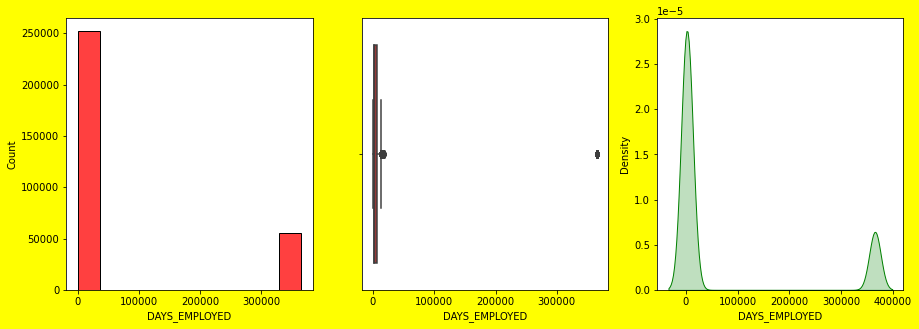

count    307511.000000
mean       4986.120328
std        3522.886321
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64
                                    Distribution of  DAYS_REGISTRATION


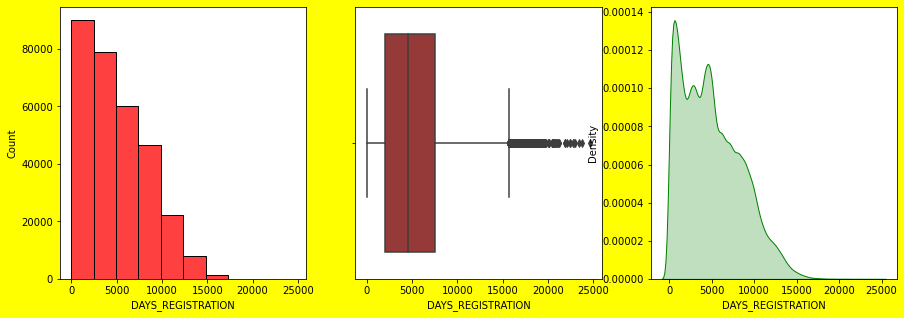

count    307511.000000
mean       2994.202373
std        1509.450419
min           0.000000
25%        1720.000000
50%        3254.000000
75%        4299.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64
                                    Distribution of  DAYS_ID_PUBLISH


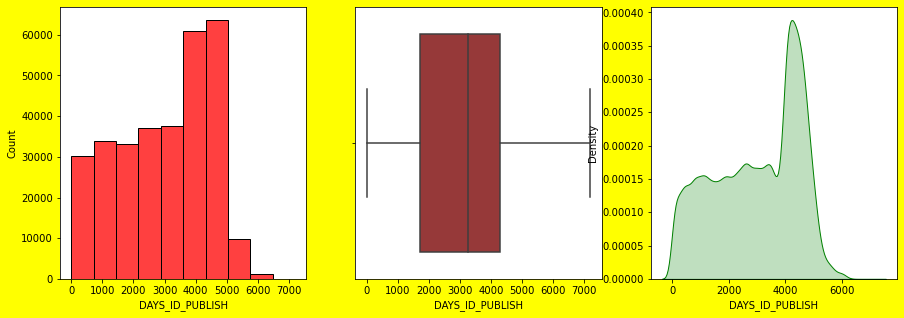

count    307511.000000
mean          2.152664
std           0.910679
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64
                                    Distribution of  CNT_FAM_MEMBERS


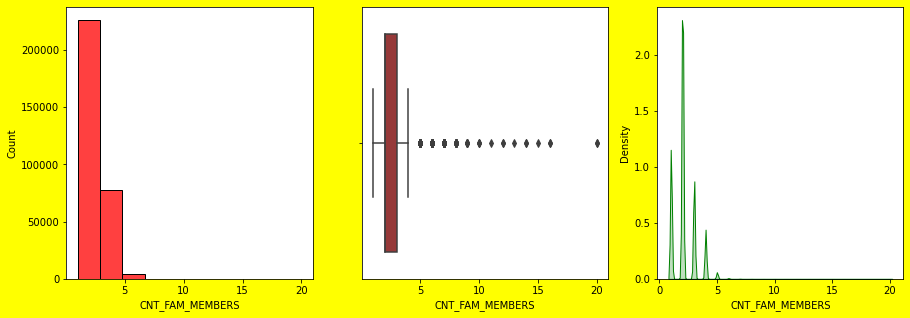

count    307511.000000
mean          2.052463
std           0.509034
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT, dtype: float64
                                    Distribution of  REGION_RATING_CLIENT


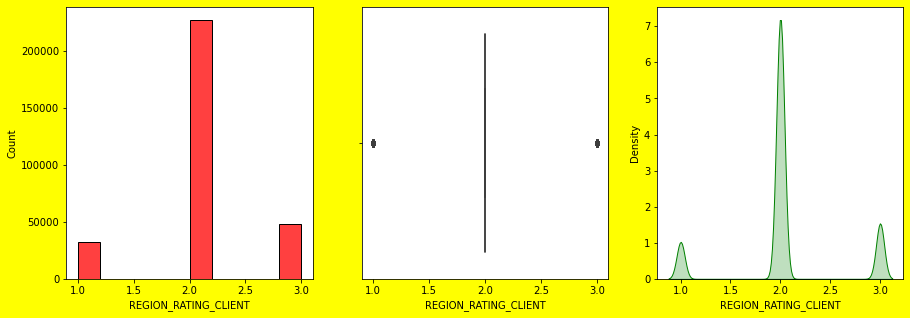

count    307511.000000
mean          2.031521
std           0.502737
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64
                                    Distribution of  REGION_RATING_CLIENT_W_CITY


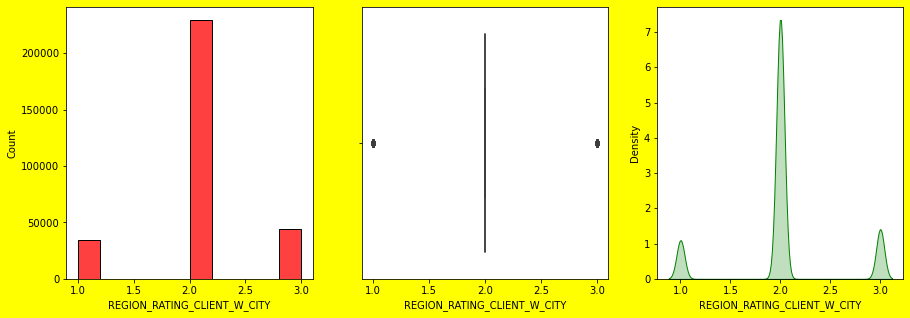

count    307511.000000
mean         12.063419
std           3.265832
min           0.000000
25%          10.000000
50%          12.000000
75%          14.000000
max          23.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64
                                    Distribution of  HOUR_APPR_PROCESS_START


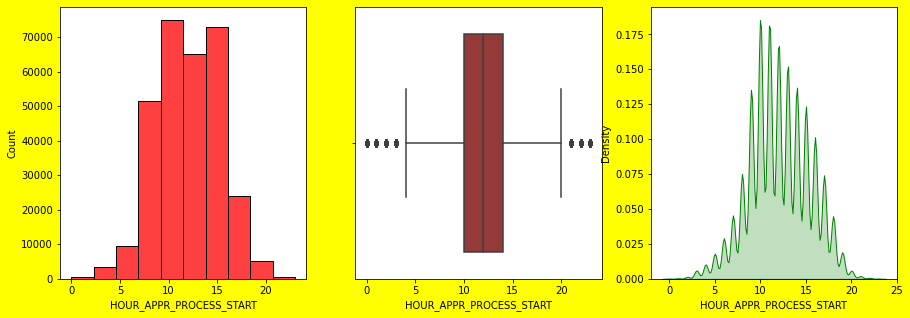

count    307511.000000
mean          0.015144
std           0.122126
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64
                                    Distribution of  REG_REGION_NOT_LIVE_REGION


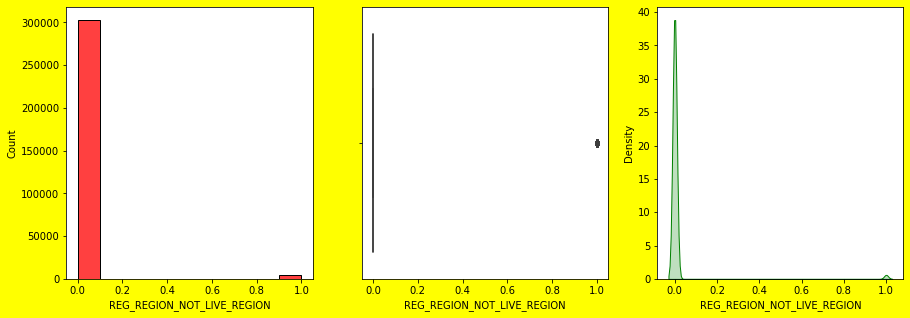

count    307511.000000
mean          0.050769
std           0.219526
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_WORK_REGION, dtype: float64
                                    Distribution of  REG_REGION_NOT_WORK_REGION


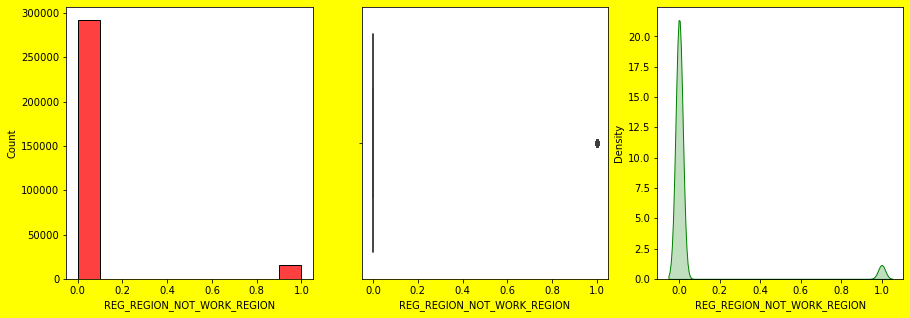

count    307511.000000
mean          0.040659
std           0.197499
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_REGION_NOT_WORK_REGION, dtype: float64
                                    Distribution of  LIVE_REGION_NOT_WORK_REGION


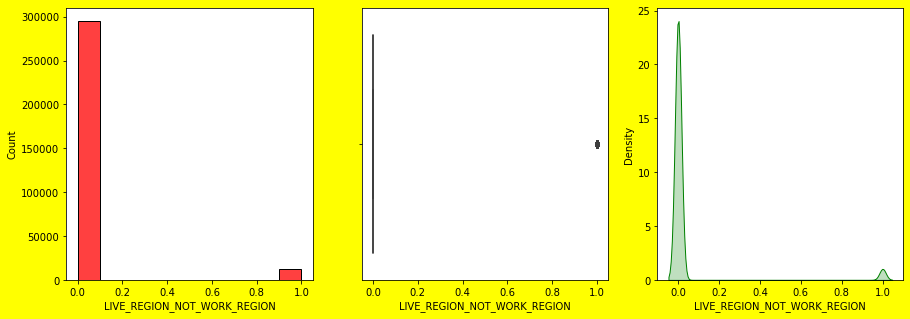

count    307511.000000
mean          0.078173
std           0.268444
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_LIVE_CITY, dtype: float64
                                    Distribution of  REG_CITY_NOT_LIVE_CITY


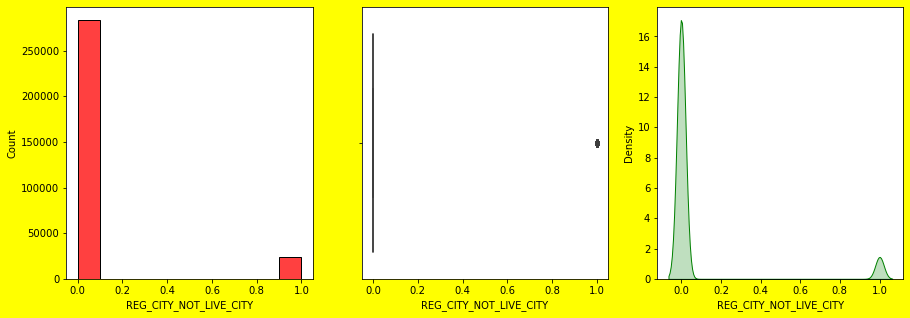

count    307511.000000
mean          0.230454
std           0.421124
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_WORK_CITY, dtype: float64
                                    Distribution of  REG_CITY_NOT_WORK_CITY


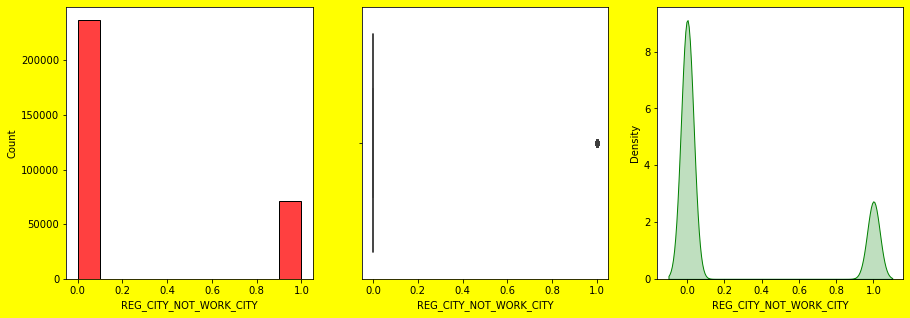

count    307511.000000
mean          0.179555
std           0.383817
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_CITY_NOT_WORK_CITY, dtype: float64
                                    Distribution of  LIVE_CITY_NOT_WORK_CITY


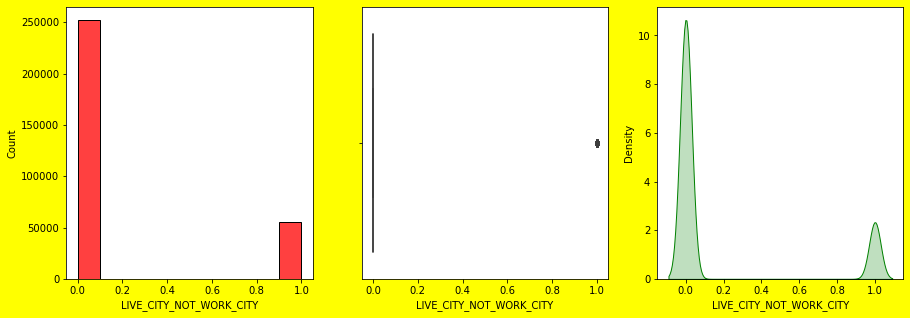

In [49]:
for col in numerical_col:
    num_graph(col)

# c. Univariate analysis for Categorical variables


In [50]:
def cat_graph(c):
    print(d[c].value_counts())
    plt.figure(figsize=(15,7),facecolor='yellow')
    plt.subplot(121)
    sns.countplot(y=d[c],ec='black',palette='gist_rainbow')
    plt.yticks(rotation=45)
    plt.subplot(122)
    perc=d[c].value_counts()
    lbl=list(d[c].value_counts().index)
    plt.pie(perc,labels=lbl,autopct='%.2f%%',startangle=50)
    plt.show()
    

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64


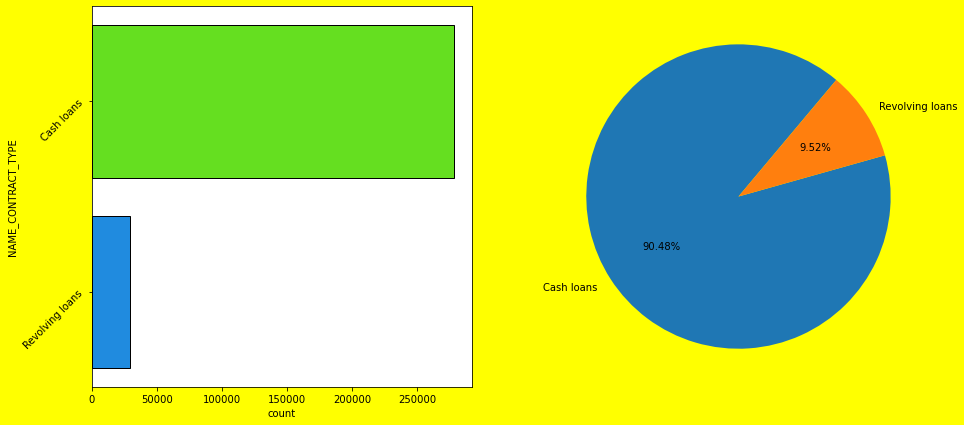

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


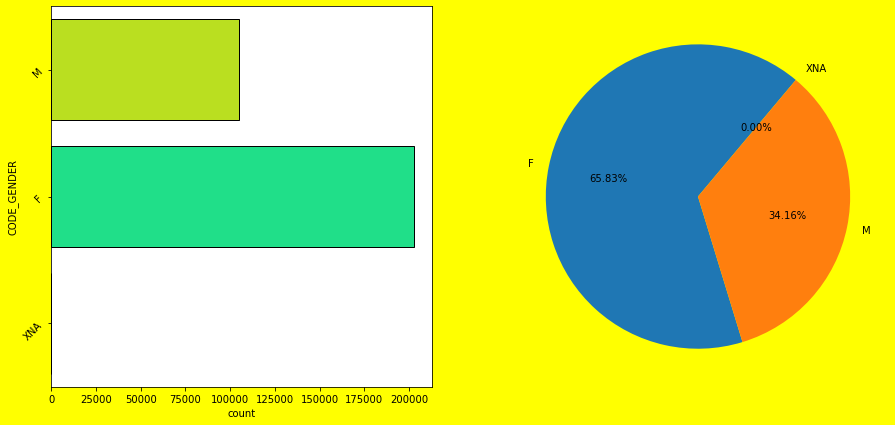

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64


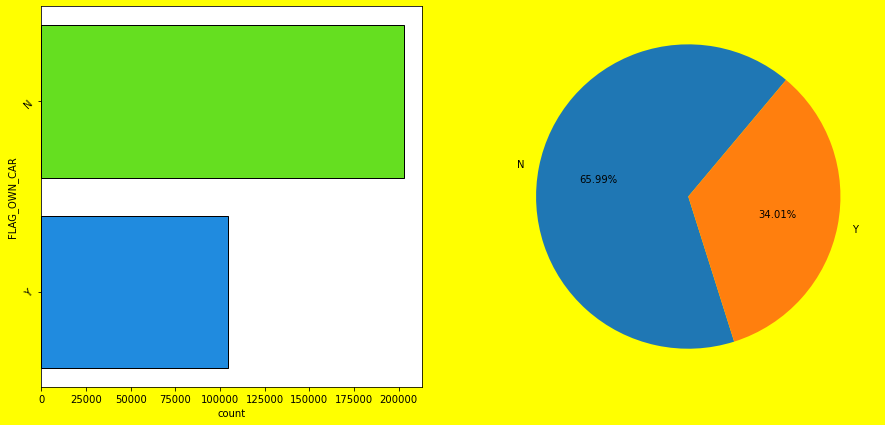

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64


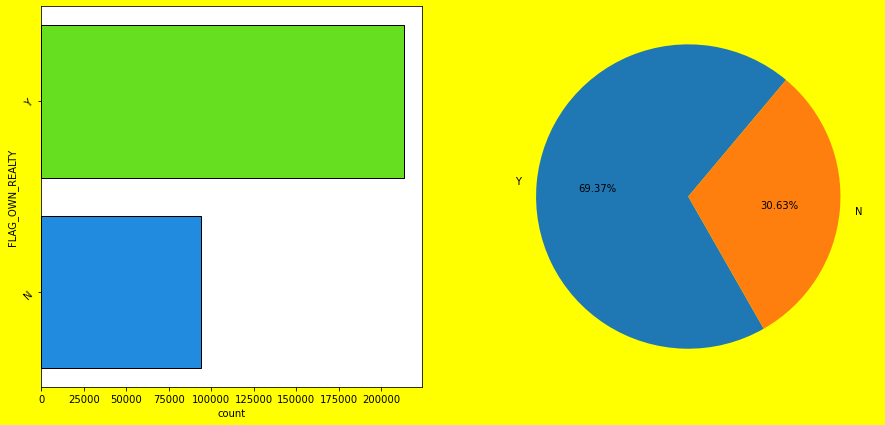

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64


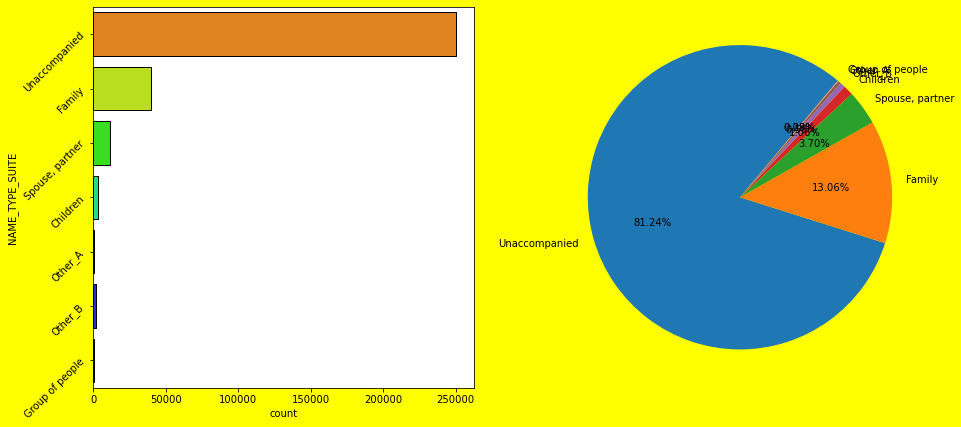

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64


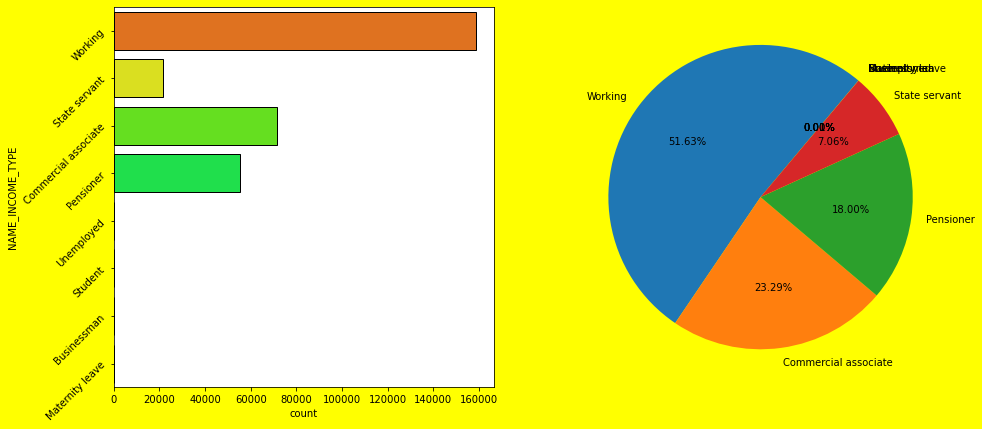

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64


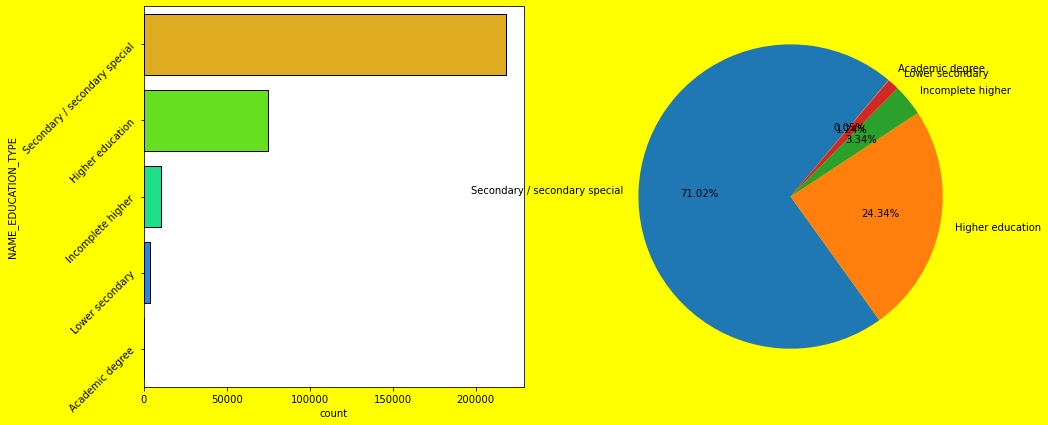

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64


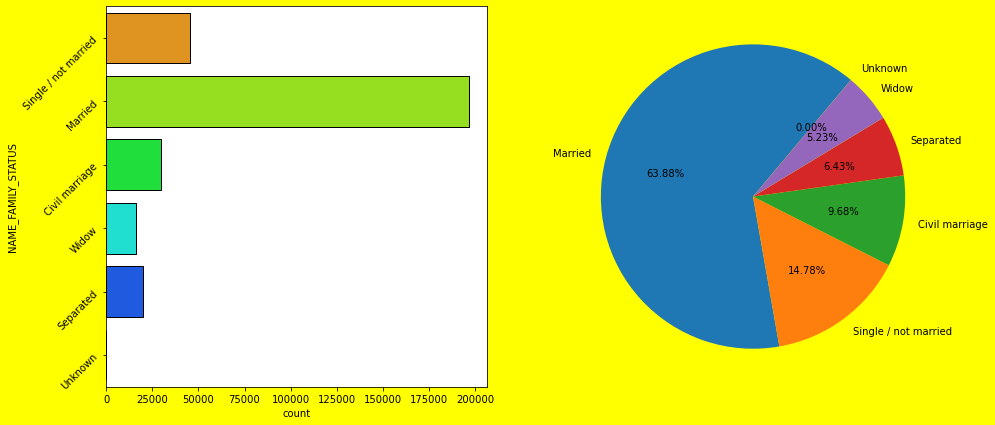

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64


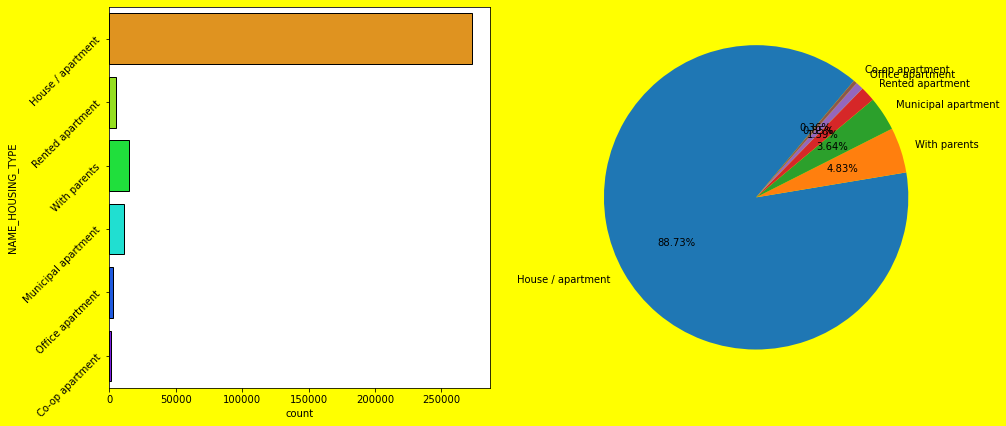

Laborers                 151577
Sales staff               32102
Core staff                27570
Managers                  21371
Drivers                   18603
High skill tech staff     11380
Accountants                9813
Medicine staff             8537
Security staff             6721
Cooking staff              5946
Cleaning staff             4653
Private service staff      2652
Low-skill Laborers         2093
Waiters/barmen staff       1348
Secretaries                1305
Realty agents               751
HR staff                    563
IT staff                    526
Name: OCCUPATION_TYPE, dtype: int64


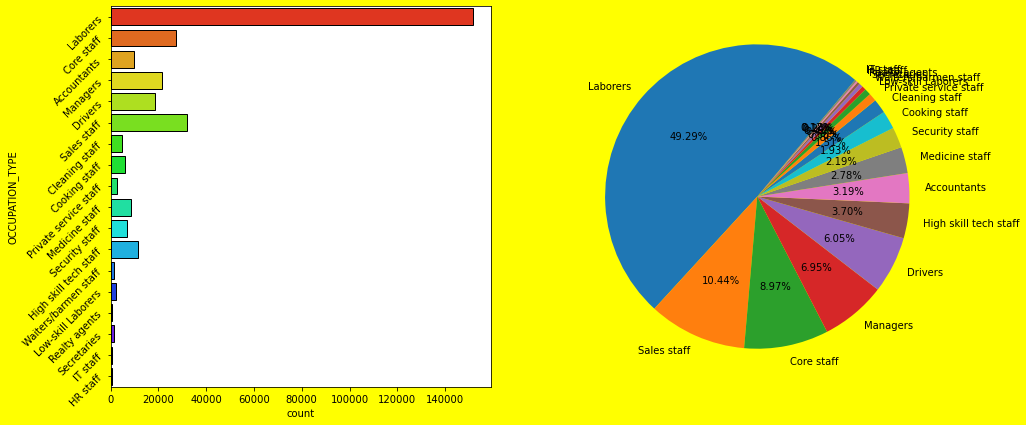

TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64


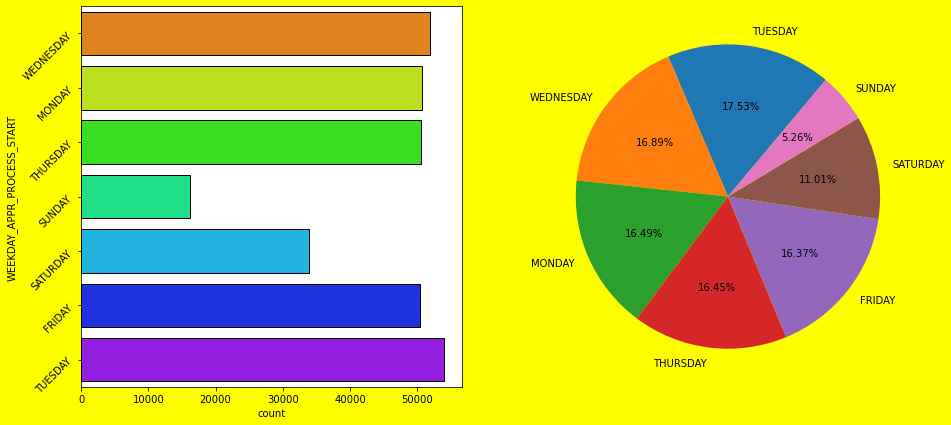

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

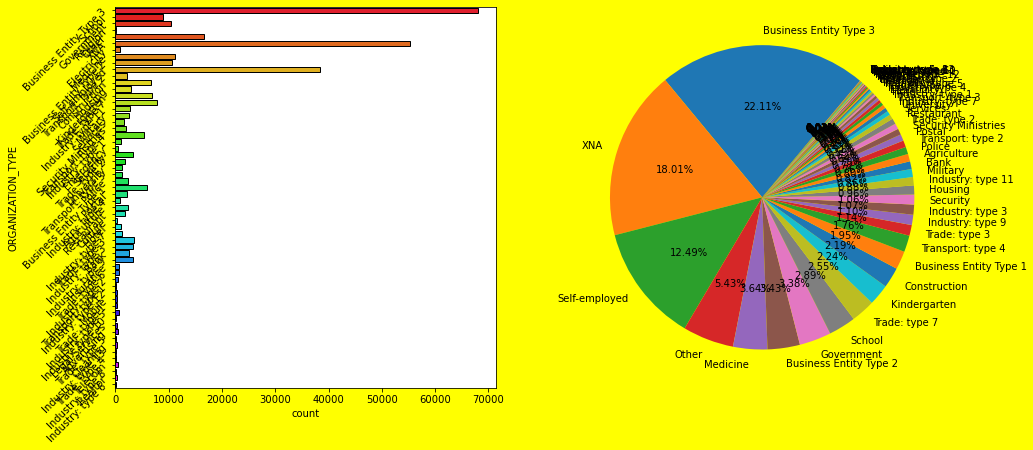

In [51]:
for column in category_col:
    cat_graph(column)

In [52]:
target0=d[d['TARGET']==0]
target1=d[d['TARGET']==1]
print(target0.shape)
print(target1.shape)

(282686, 34)
(24825, 34)


# D. Univariate analysis of numerical column for TARGET=0 (Applicants making payments on time)

In [53]:
def num_graph(n):
    print(target0[n].describe())
    plt.figure(figsize=(15,5),facecolor='yellow')
    print('Distribution of ',target0[n].name)
   
    plt.subplot(131)
    sns.histplot(x = target0[n], color = "red",bins=(10)) 
    plt.subplot(132)
    sns.boxplot(x = target0[n], color = "brown") 
    plt.subplot(133)
    sns.kdeplot(x=target0[n],color='green',shade=True)
    plt.show()
    

count    282686.000000
mean     278244.744536
std      102825.776954
min      100003.000000
25%      189103.250000
50%      278362.500000
75%      367241.500000
max      456255.000000
Name: SK_ID_CURR, dtype: float64
Distribution of  SK_ID_CURR


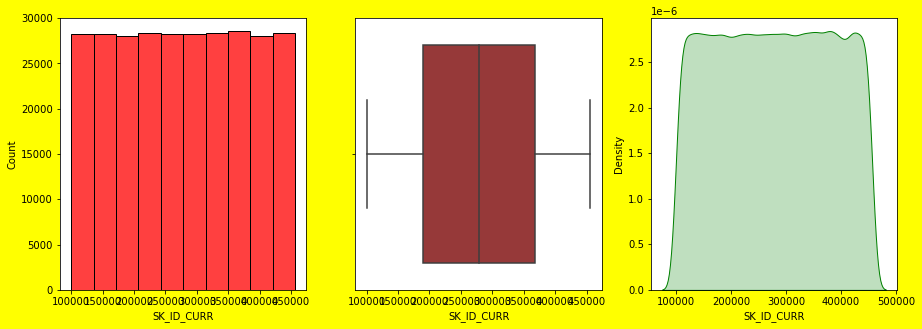

count    282686.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: TARGET, dtype: float64
Distribution of  TARGET


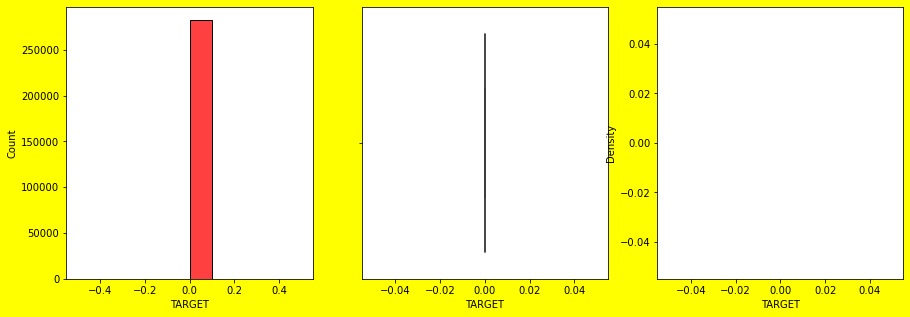

count    282686.000000
mean          0.412946
std           0.718843
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64
Distribution of  CNT_CHILDREN


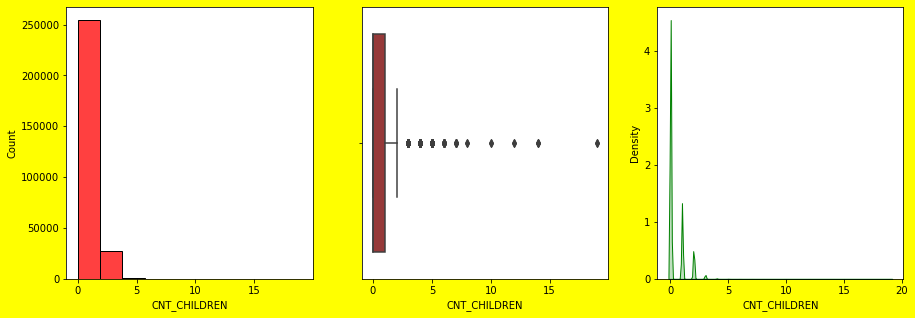

count    2.826860e+05
mean     1.690777e+05
std      1.104763e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.485000e+05
75%      2.025000e+05
max      1.800009e+07
Name: AMT_INCOME_TOTAL, dtype: float64
Distribution of  AMT_INCOME_TOTAL


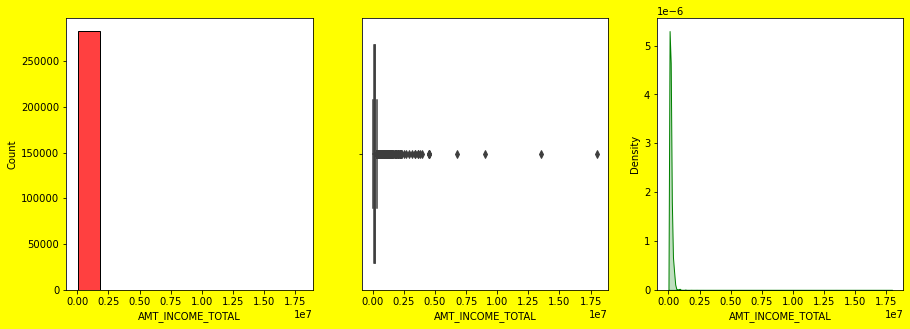

count    2.826860e+05
mean     6.026483e+05
std      4.068459e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.177880e+05
75%      8.100000e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64
Distribution of  AMT_CREDIT


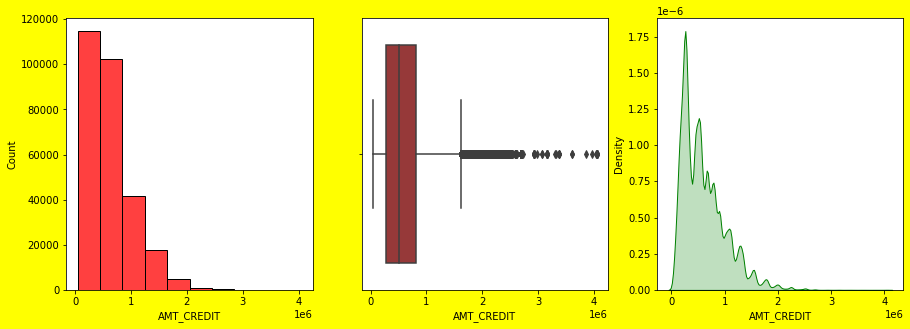

count    282686.000000
mean      27163.621012
std       14657.996056
min        1615.500000
25%       16456.500000
50%       24876.000000
75%       34749.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64
Distribution of  AMT_ANNUITY


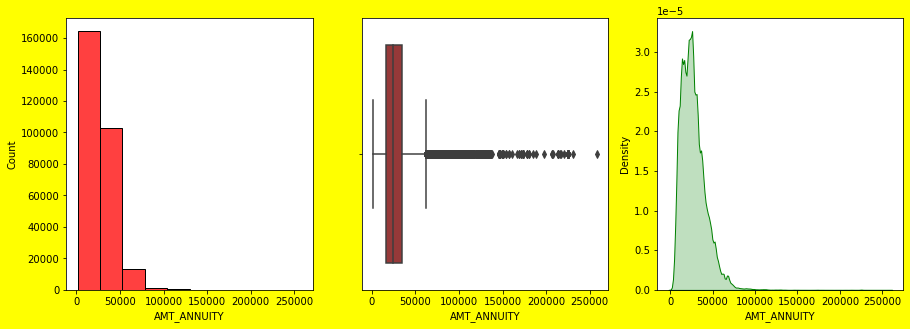

count    2.826860e+05
mean     5.427328e+05
std      3.736156e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.850024e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64
Distribution of  AMT_GOODS_PRICE


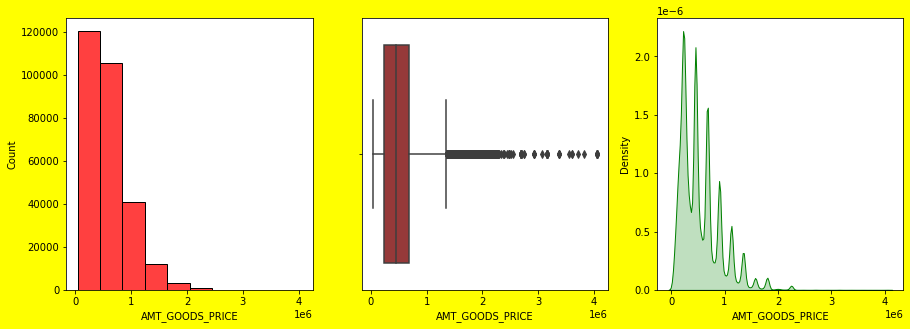

count    282686.000000
mean          0.021021
std           0.013978
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64
Distribution of  REGION_POPULATION_RELATIVE


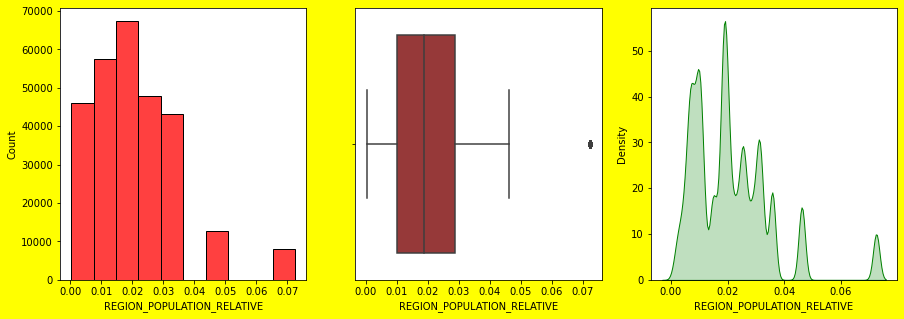

count    282686.000000
mean      16138.176397
std        4364.200856
min        7489.000000
25%       12536.000000
50%       15877.000000
75%       19793.750000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64
Distribution of  DAYS_BIRTH


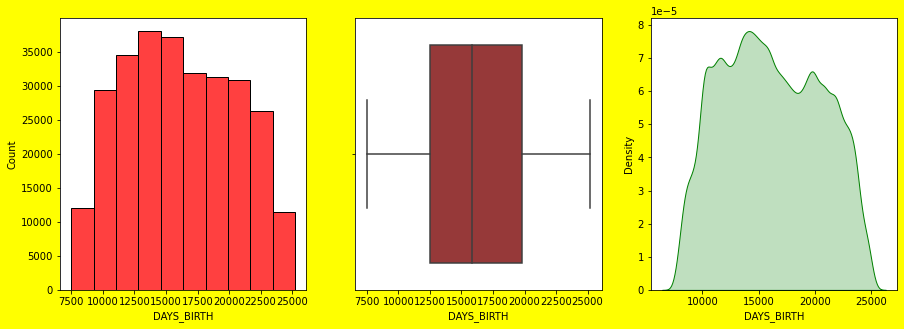

count    282686.000000
mean      69668.812255
std      140983.356991
min           0.000000
25%         967.000000
50%        2304.000000
75%        6074.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64
Distribution of  DAYS_EMPLOYED


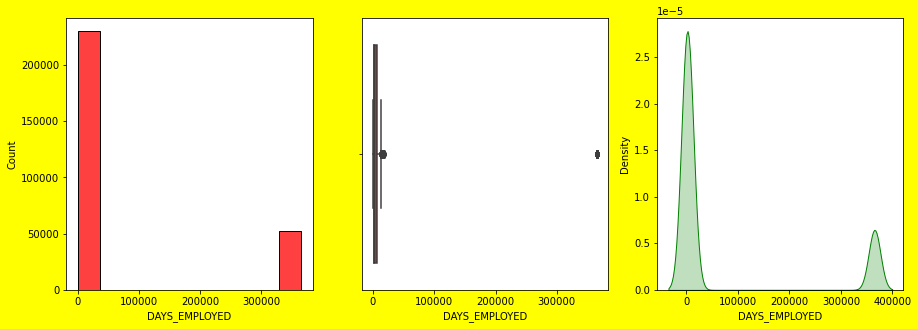

count    282686.000000
mean       5029.941065
std        3538.464478
min           0.000000
25%        2045.000000
50%        4544.000000
75%        7550.000000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64
Distribution of  DAYS_REGISTRATION


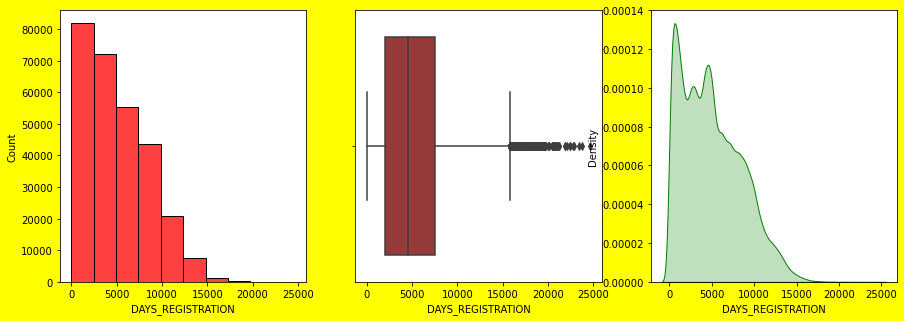

count    282686.000000
mean       3017.219788
std        1506.614090
min           0.000000
25%        1755.000000
50%        3295.000000
75%        4313.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64
Distribution of  DAYS_ID_PUBLISH


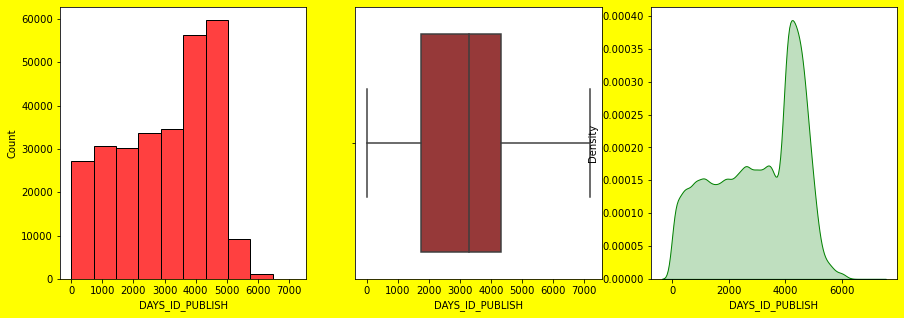

count    282686.000000
mean          2.150152
std           0.906981
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64
Distribution of  CNT_FAM_MEMBERS


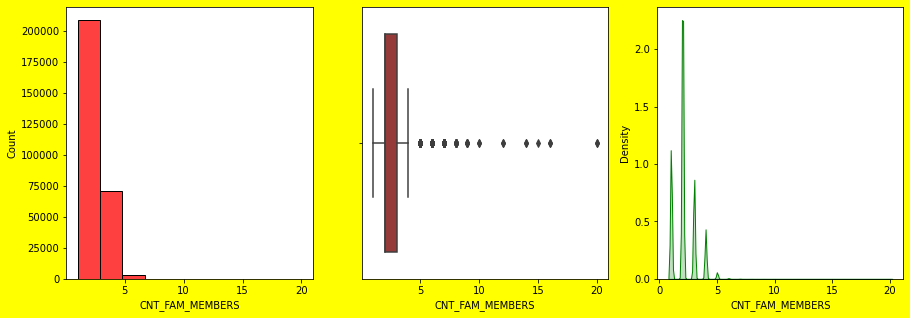

count    282686.000000
mean          2.043578
std           0.508422
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT, dtype: float64
Distribution of  REGION_RATING_CLIENT


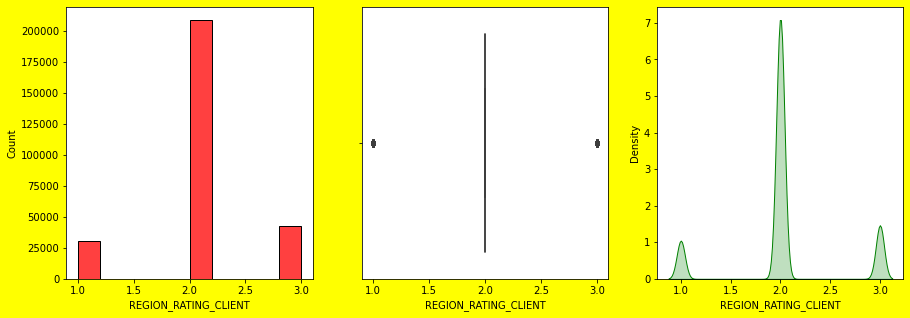

count    282686.000000
mean          2.022449
std           0.501971
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64
Distribution of  REGION_RATING_CLIENT_W_CITY


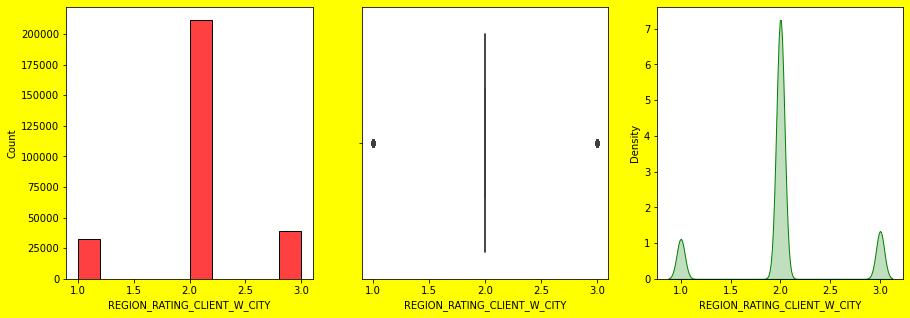

count    282686.000000
mean         12.086807
std           3.263173
min           0.000000
25%          10.000000
50%          12.000000
75%          14.000000
max          23.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64
Distribution of  HOUR_APPR_PROCESS_START


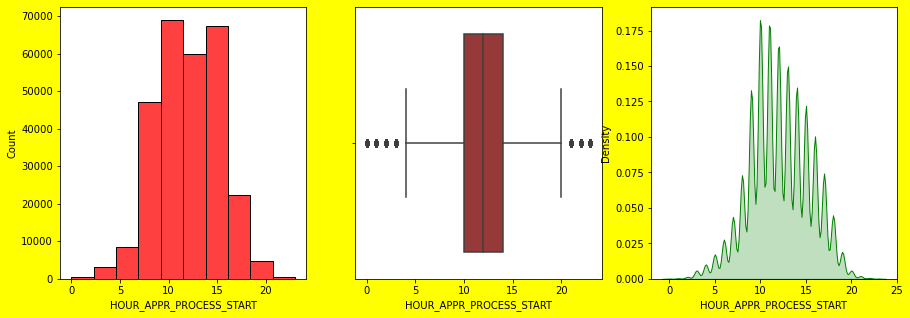

count    282686.000000
mean          0.014942
std           0.121323
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64
Distribution of  REG_REGION_NOT_LIVE_REGION


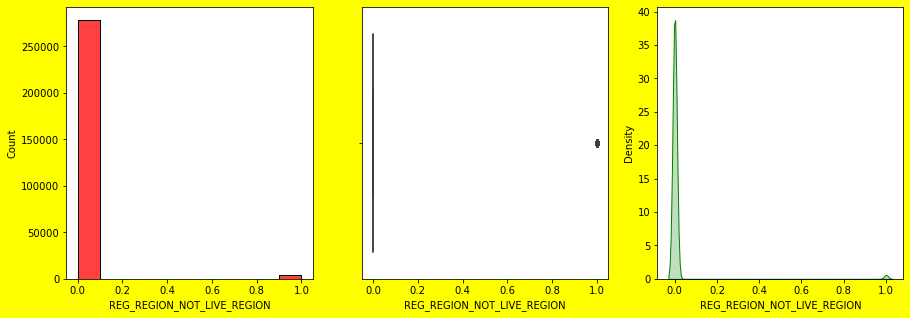

count    282686.000000
mean          0.050317
std           0.218599
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_WORK_REGION, dtype: float64
Distribution of  REG_REGION_NOT_WORK_REGION


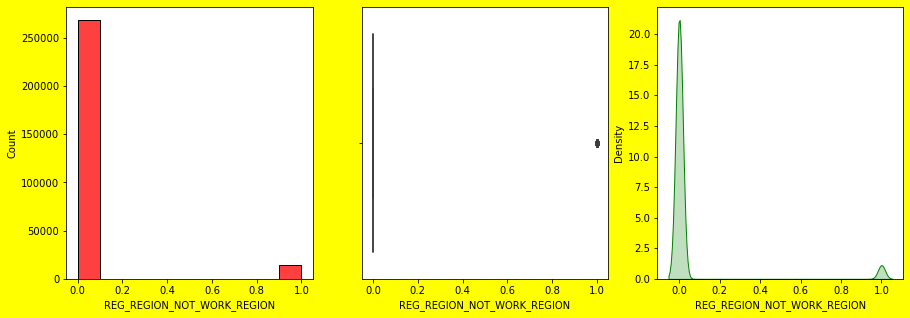

count    282686.000000
mean          0.040494
std           0.197114
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_REGION_NOT_WORK_REGION, dtype: float64
Distribution of  LIVE_REGION_NOT_WORK_REGION


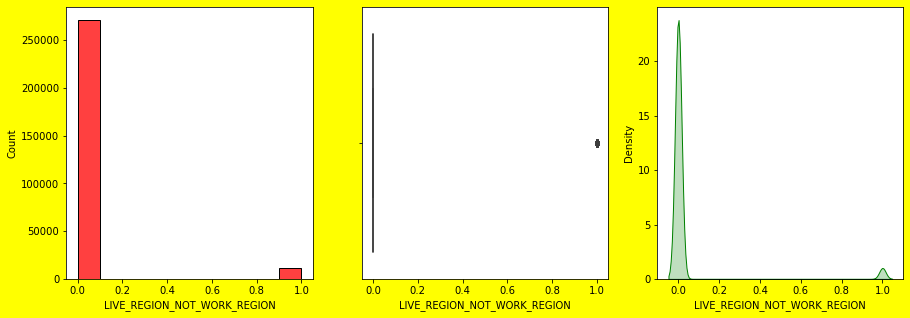

count    282686.000000
mean          0.074641
std           0.262812
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_LIVE_CITY, dtype: float64
Distribution of  REG_CITY_NOT_LIVE_CITY


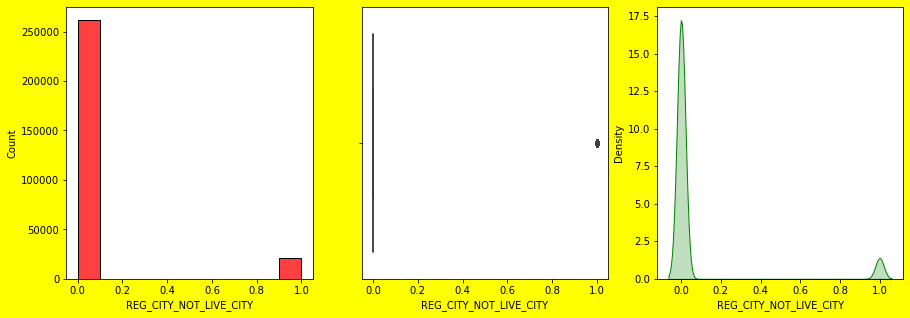

count    282686.000000
mean          0.224090
std           0.416982
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_WORK_CITY, dtype: float64
Distribution of  REG_CITY_NOT_WORK_CITY


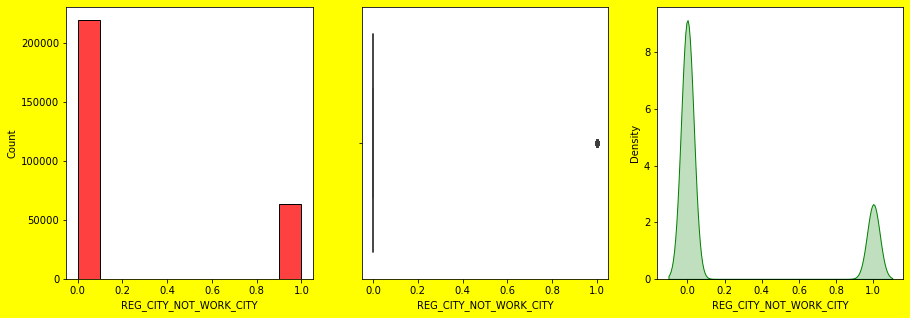

count    282686.000000
mean          0.175856
std           0.380698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_CITY_NOT_WORK_CITY, dtype: float64
Distribution of  LIVE_CITY_NOT_WORK_CITY


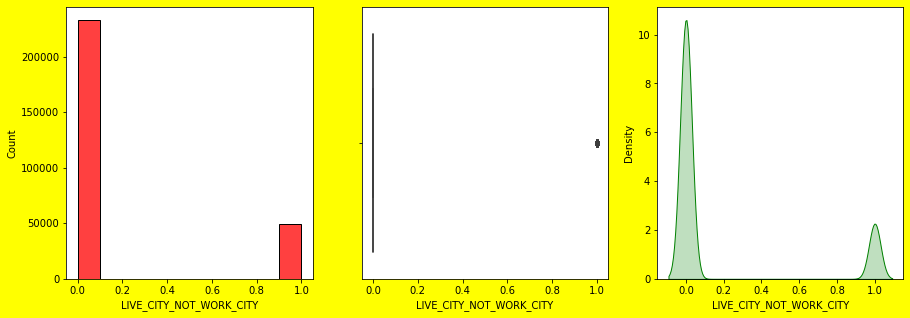

In [54]:
for col in numerical_col:
    num_graph(col)
    

# Conclusion (For numerical variables applicants making payments on time) :
1.Most of the people have 1-2 count of children,There are also outliers present.


2.2.1.687979e+05 is mean income amount of all data set

3.3.5.990260e+05 is mean amount credit of all data set

4.4.Most of amt_annunity is between 16000-34000.

5.From Kdeplot of amt_goods_price  we can see that it is right skewed.

6.75% of people have have days employed 5700

7.Most 50% of DAYS_REGISTRATION have done near 2000-7550days.

8.Most 50% of DAYS_ID_PUBLISH have done near 1700-3295days.

9.75% of CNT_FAM_MEMBERS is at 3 member only.





# E. Univariate analysis of categorical column for TARGET=0 (Applicants making payments on time)

In [55]:
def cat_graph(c):
    print(target0[c].value_counts())
    plt.figure(figsize=(15,7),facecolor='yellow')
    plt.subplot(121)
    sns.countplot(y=target0[c],ec='black',palette='gist_rainbow')
    plt.yticks(rotation=0)
    plt.subplot(122)
    perc=target0[c].value_counts()
    lbl=list(target0[c].value_counts().index)
    plt.pie(perc,labels=lbl,autopct='%.2f%%',startangle=50)
    plt.show()
    

Cash loans         255011
Revolving loans     27675
Name: NAME_CONTRACT_TYPE, dtype: int64


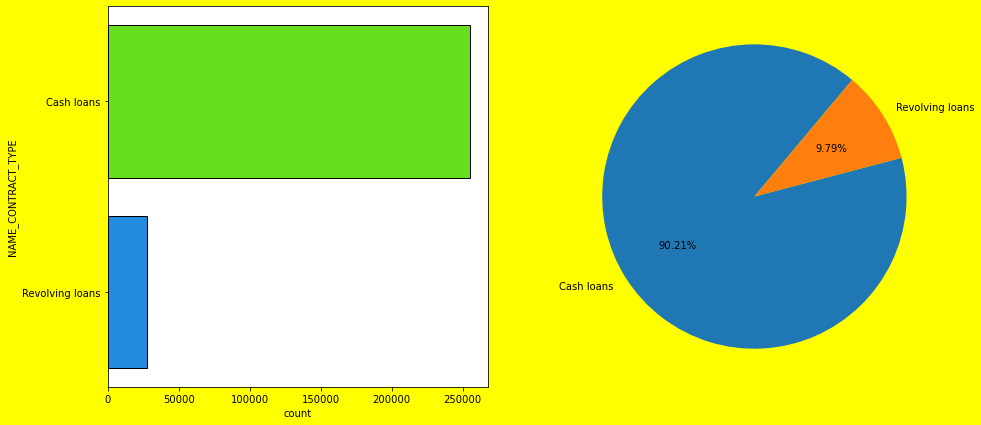

F      188278
M       94404
XNA         4
Name: CODE_GENDER, dtype: int64


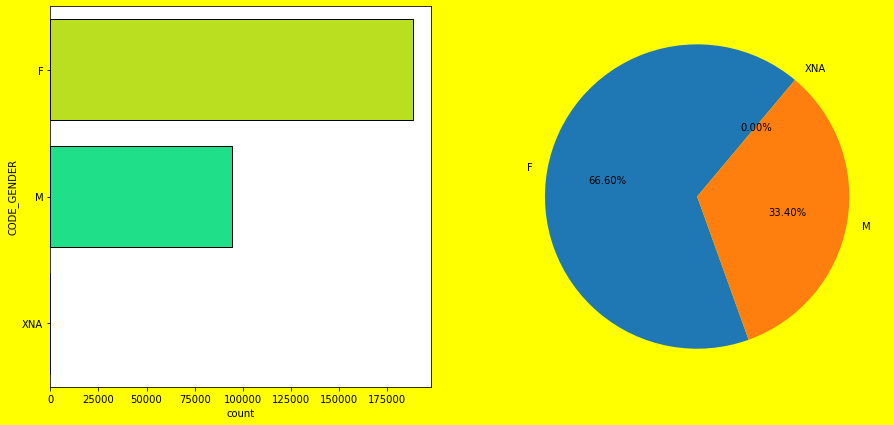

N    185675
Y     97011
Name: FLAG_OWN_CAR, dtype: int64


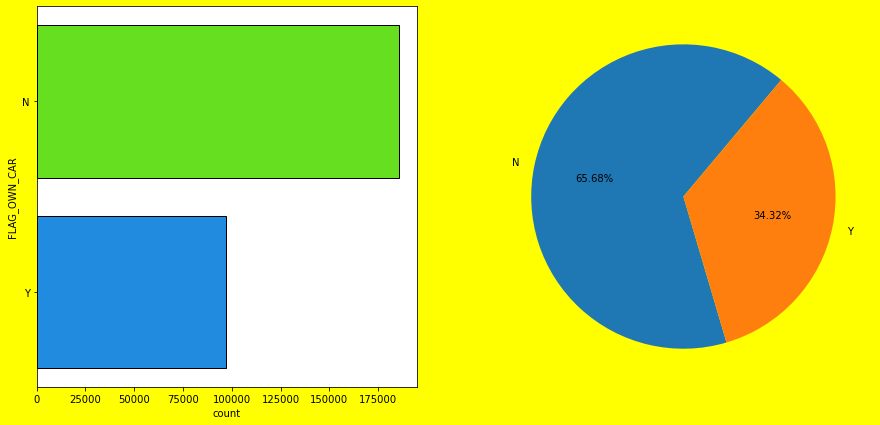

Y    196329
N     86357
Name: FLAG_OWN_REALTY, dtype: int64


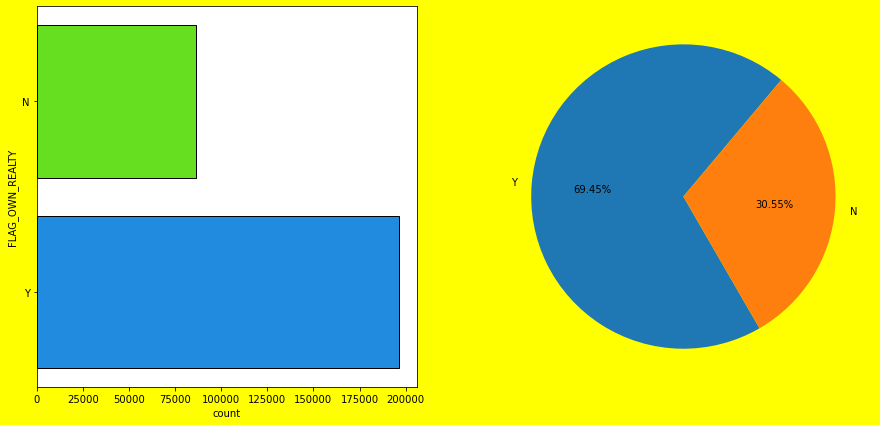

Unaccompanied      229411
Family              37140
Spouse, partner     10475
Children             3026
Other_B              1596
Other_A               790
Group of people       248
Name: NAME_TYPE_SUITE, dtype: int64


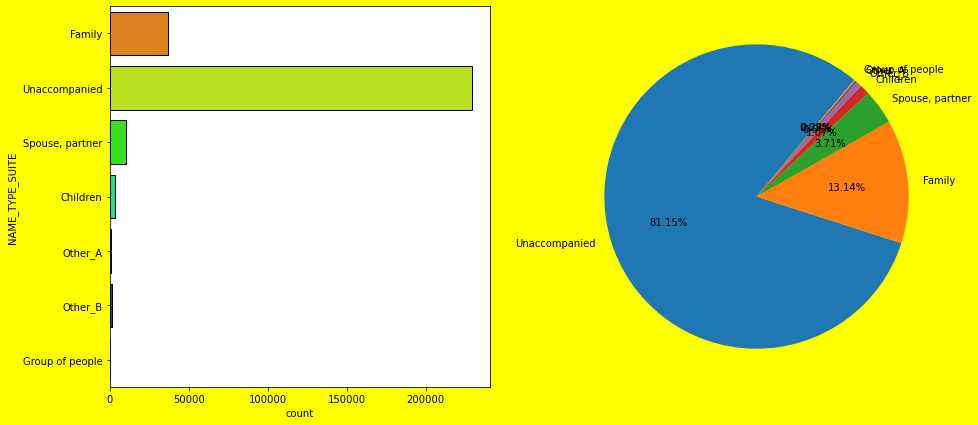

Working                 143550
Commercial associate     66257
Pensioner                52380
State servant            20454
Student                     18
Unemployed                  14
Businessman                 10
Maternity leave              3
Name: NAME_INCOME_TYPE, dtype: int64


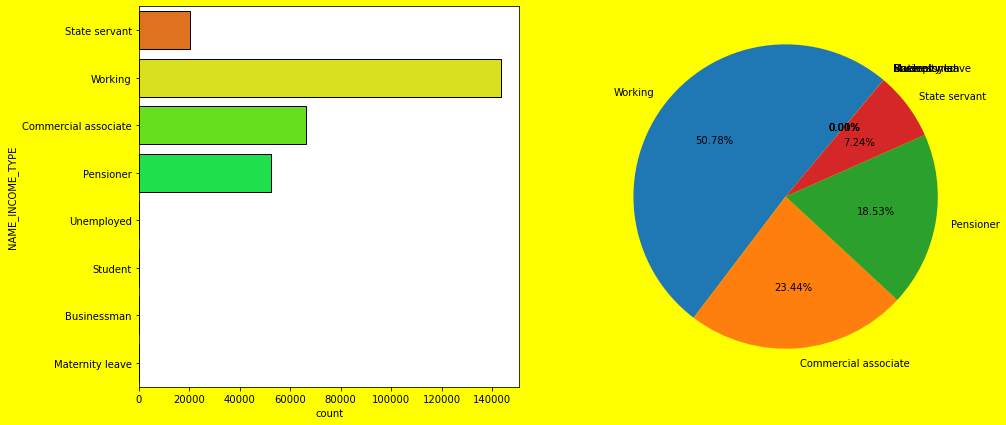

Secondary / secondary special    198867
Higher education                  70854
Incomplete higher                  9405
Lower secondary                    3399
Academic degree                     161
Name: NAME_EDUCATION_TYPE, dtype: int64


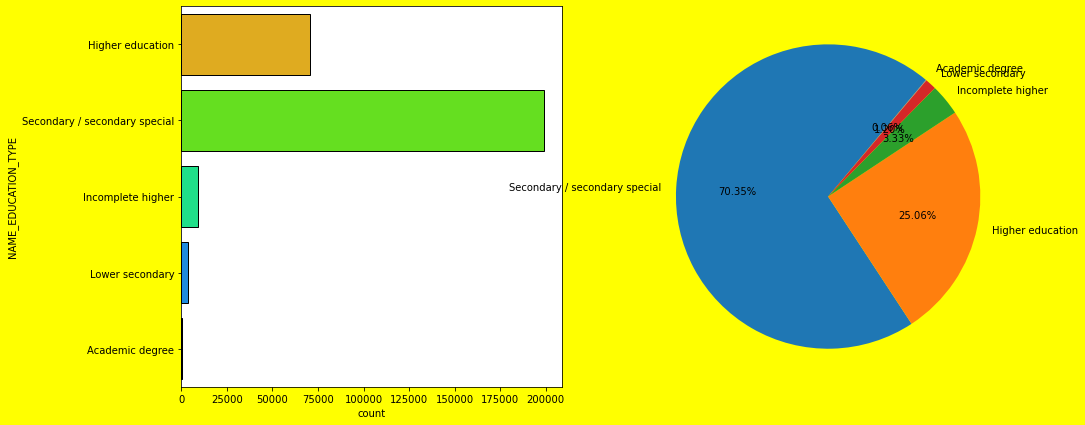

Married                 181582
Single / not married     40987
Civil marriage           26814
Separated                18150
Widow                    15151
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64


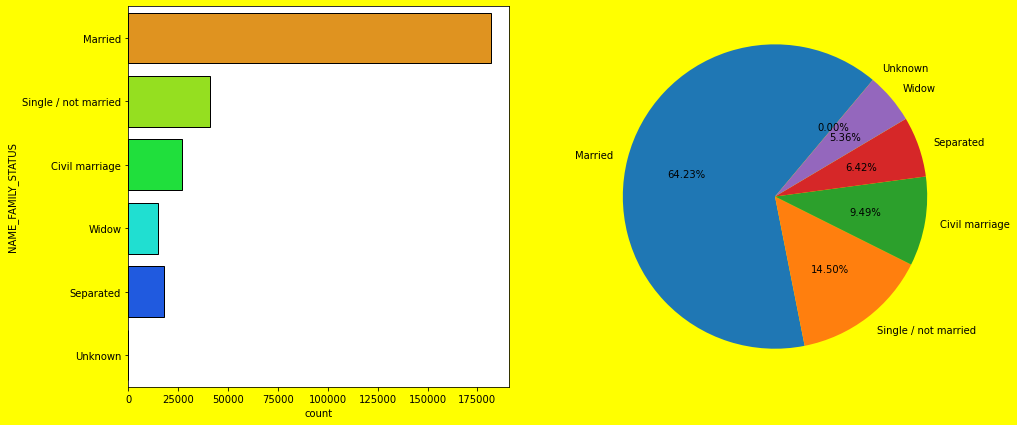

House / apartment      251596
With parents            13104
Municipal apartment     10228
Rented apartment         4280
Office apartment         2445
Co-op apartment          1033
Name: NAME_HOUSING_TYPE, dtype: int64


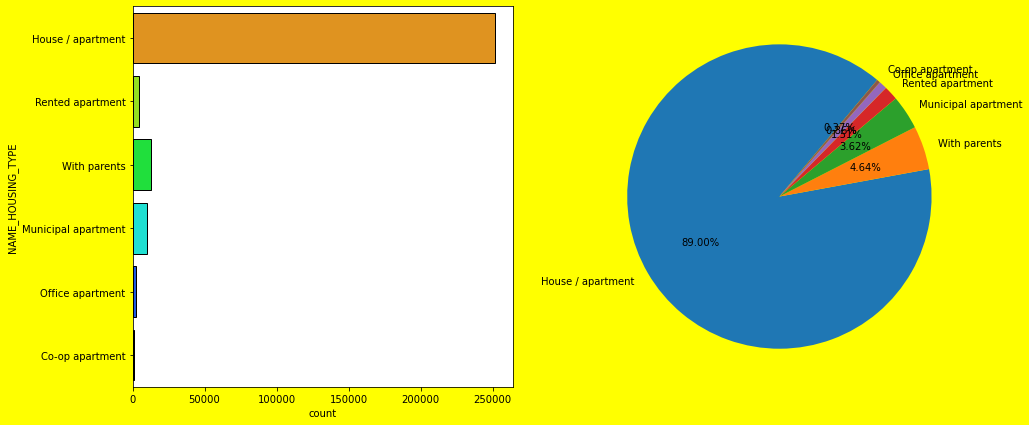

Laborers                 139461
Sales staff               29010
Core staff                25832
Managers                  20043
Drivers                   16496
High skill tech staff     10679
Accountants                9339
Medicine staff             7965
Security staff             5999
Cooking staff              5325
Cleaning staff             4206
Private service staff      2477
Low-skill Laborers         1734
Secretaries                1213
Waiters/barmen staff       1196
Realty agents               692
HR staff                    527
IT staff                    492
Name: OCCUPATION_TYPE, dtype: int64


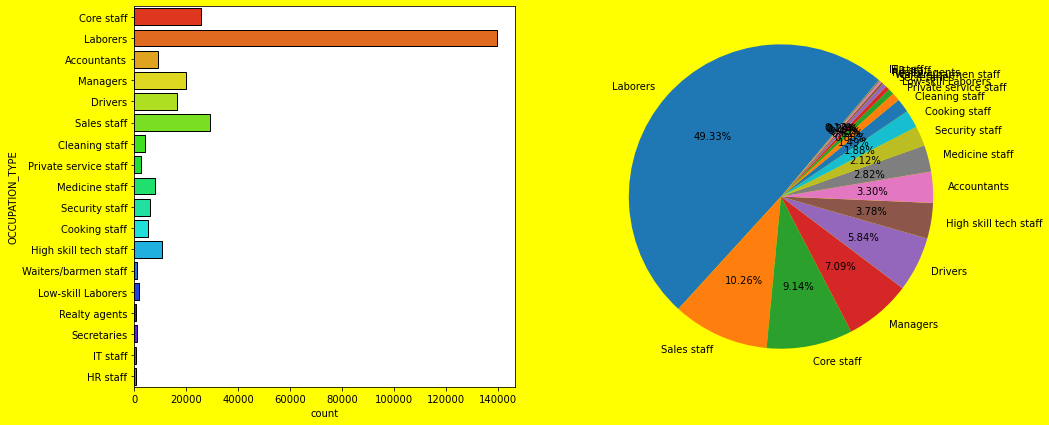

TUESDAY      49400
WEDNESDAY    47696
MONDAY       46780
THURSDAY     46493
FRIDAY       46237
SATURDAY     31182
SUNDAY       14898
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64


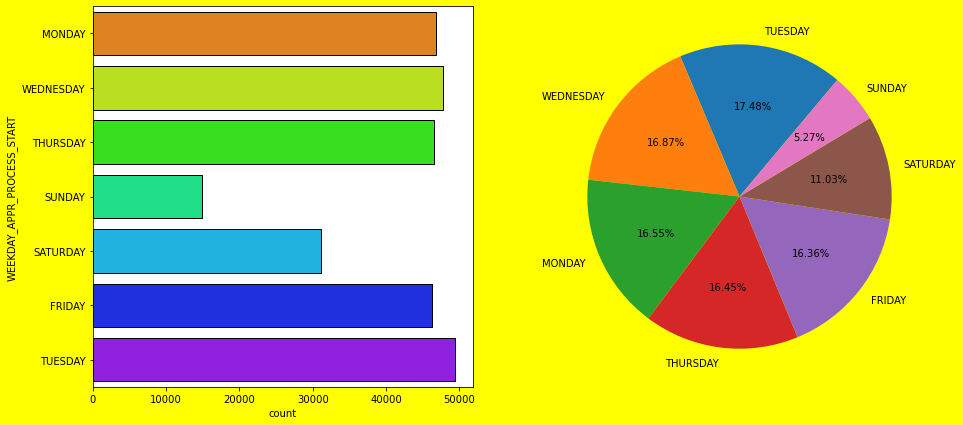

Business Entity Type 3    61669
XNA                       52384
Self-employed             34504
Other                     15408
Medicine                  10456
Government                 9678
Business Entity Type 2     9653
School                     8367
Trade: type 7              7091
Kindergarten               6396
Construction               5936
Business Entity Type 1     5497
Transport: type 4          4897
Industry: type 9           3143
Trade: type 3              3131
Industry: type 3           2930
Security                   2923
Housing                    2723
Military                   2499
Industry: type 11          2470
Bank                       2377
Police                     2224
Agriculture                2197
Transport: type 2          2032
Postal                     1975
Security Ministries        1878
Trade: type 2              1767
Restaurant                 1599
Services                   1471
University                 1262
Industry: type 7           1202
Transpor

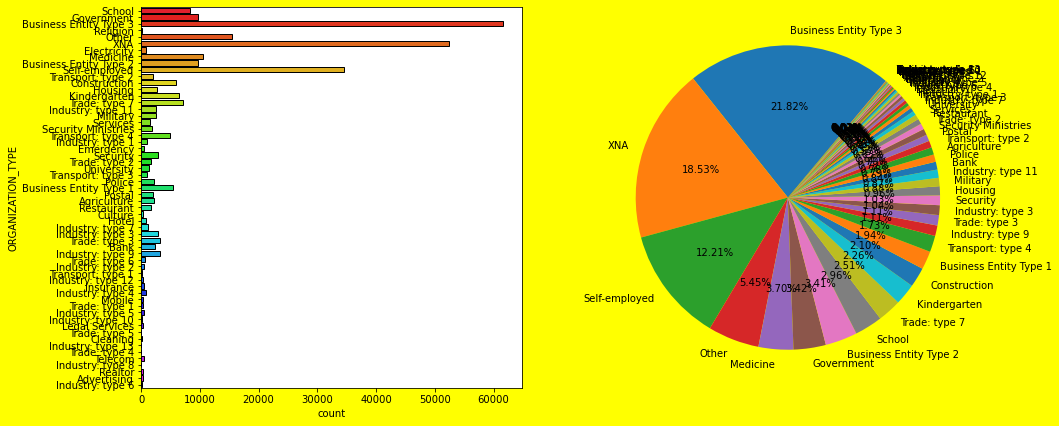

In [56]:
for column in category_col:
    cat_graph(column)

# Conclusion (For Univariate analysis categorical columns for people making payment on time ):
1.Revoling loans(30.21%) are less compared to cash loans.

2.more female member applied for for loan (66%)then male(33%)

3.66% of people do not have car.while 34% have car.

4.More people have have own Realty 69%.

5.More people have Unaccompanied NAME_TYPE_SUITE 81%,while others have low NAME_TYPE_SUITE.

6.50.78% of people have Income type of working.

7.70% have NAME_EDUCATION_TYPE of Secondary / secondary special.

8.There are more people Married 64%.

9.89% have House / apartment type housing type.

10.49% of people have OCCUPATION_TYPE of laborers.

11.most of the people have appplied for loan process on tuesday and wednesday.

12.21% of people have ORGANIZATION_TYPE of Business Entity Type 3.




# F. Univariate analysis of numerical column for TARGET=1 (Applicants not making payments on time)

In [57]:
def num_graph(n):
    print(target1[n].describe())
    plt.figure(figsize=(15,5),facecolor='yellow')
    print('                                   ', 'Distribution of ',target0[n].name)
    #plt.suptitle(d[n])
    plt.subplot(131)
    sns.histplot(x = target1[n], color = "red",bins=(10)) 
    plt.subplot(132)
    sns.boxplot(x = target1[n], color = "brown") 
    plt.subplot(133)
    sns.kdeplot(x=target1[n],color='green',shade=True)
    plt.show()
    

count     24825.000000
mean     277449.167936
std      102383.123458
min      100002.000000
25%      189555.000000
50%      276291.000000
75%      366050.000000
max      456254.000000
Name: SK_ID_CURR, dtype: float64
                                    Distribution of  SK_ID_CURR


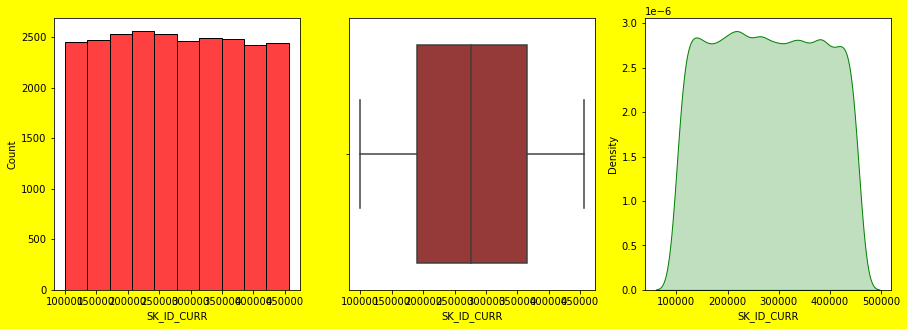

count    24825.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: TARGET, dtype: float64
                                    Distribution of  TARGET


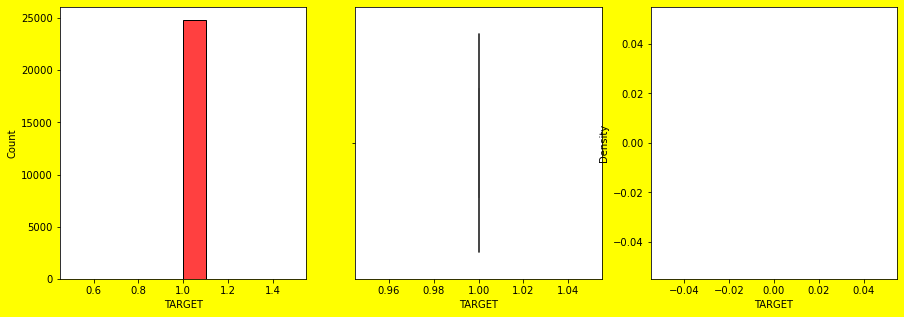

count    24825.000000
mean         0.463807
std          0.756903
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         11.000000
Name: CNT_CHILDREN, dtype: float64
                                    Distribution of  CNT_CHILDREN


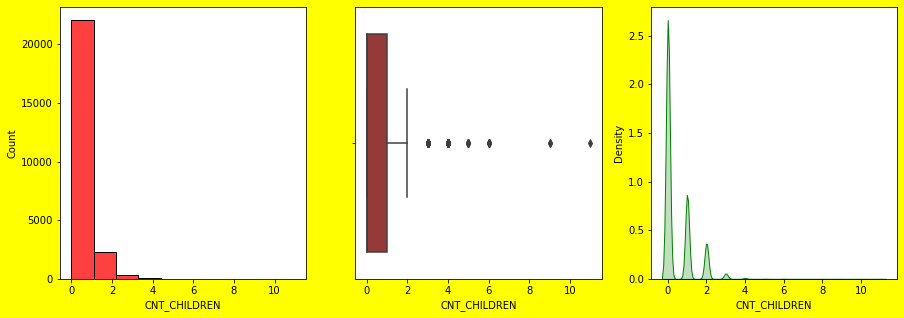

count    2.482500e+04
mean     1.656118e+05
std      7.466770e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.350000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64
                                    Distribution of  AMT_INCOME_TOTAL


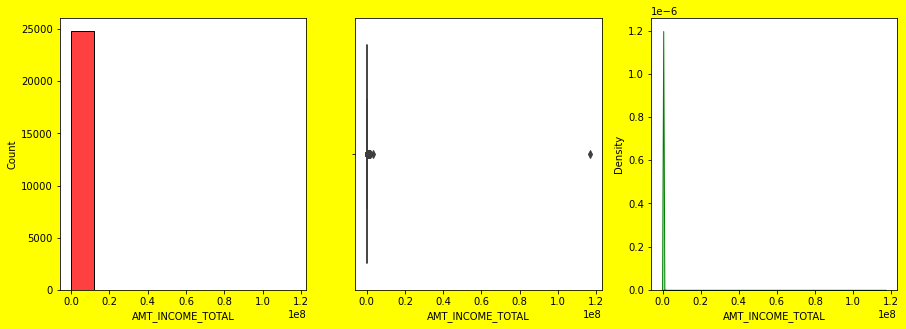

count    2.482500e+04
mean     5.577785e+05
std      3.464332e+05
min      4.500000e+04
25%      2.844000e+05
50%      4.975200e+05
75%      7.333155e+05
max      4.027680e+06
Name: AMT_CREDIT, dtype: float64
                                    Distribution of  AMT_CREDIT


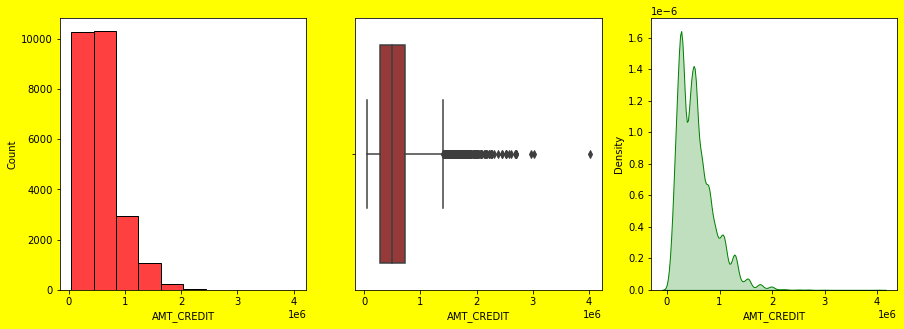

count     24825.000000
mean      26481.744290
std       12450.676999
min        2722.500000
25%       17361.000000
50%       25263.000000
75%       32976.000000
max      149211.000000
Name: AMT_ANNUITY, dtype: float64
                                    Distribution of  AMT_ANNUITY


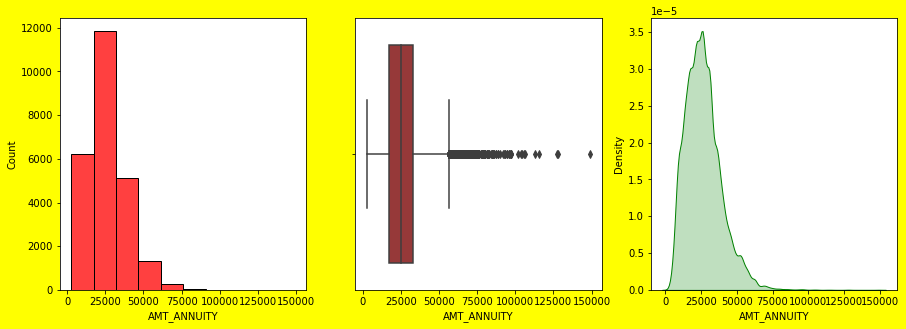

count    2.482500e+04
mean     4.890142e+05
std      3.115080e+05
min      4.500000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.750000e+05
max      3.600000e+06
Name: AMT_GOODS_PRICE, dtype: float64
                                    Distribution of  AMT_GOODS_PRICE


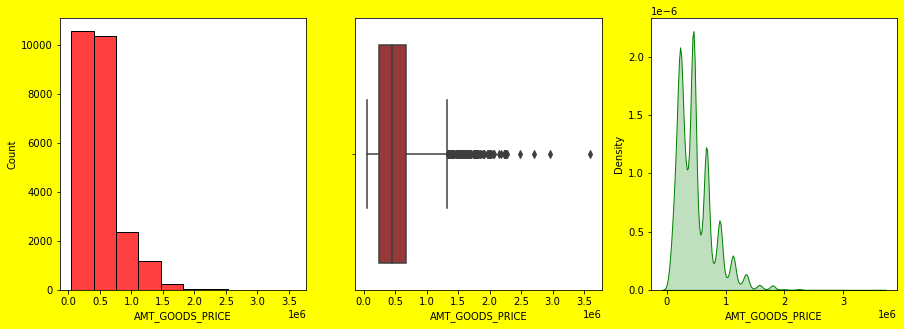

count    24825.000000
mean         0.019131
std          0.011905
min          0.000533
25%          0.009630
50%          0.018634
75%          0.025164
max          0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64
                                    Distribution of  REGION_POPULATION_RELATIVE


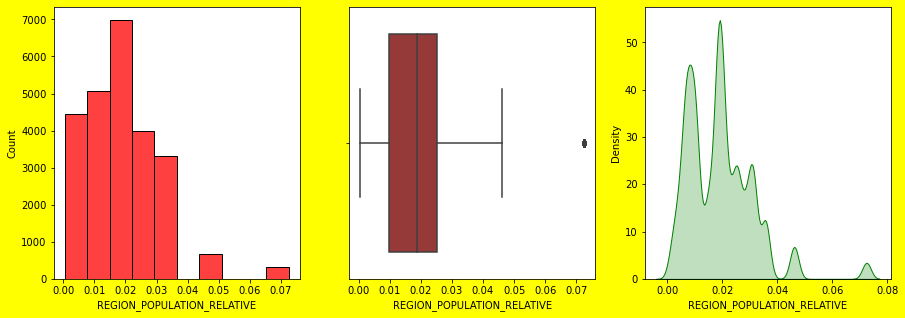

count    24825.000000
mean     14884.828077
std       4192.844583
min       7678.000000
25%      11396.000000
50%      14282.000000
75%      18037.000000
max      25168.000000
Name: DAYS_BIRTH, dtype: float64
                                    Distribution of  DAYS_BIRTH


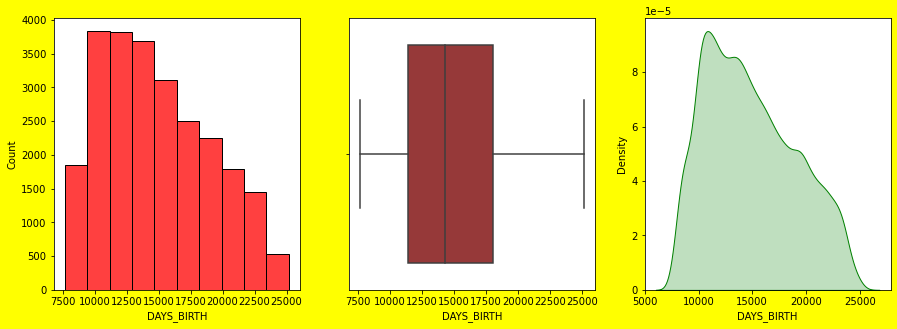

count     24825.000000
mean      45587.324149
std      118303.300421
min           0.000000
25%         677.000000
50%        1458.000000
75%        3280.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64
                                    Distribution of  DAYS_EMPLOYED


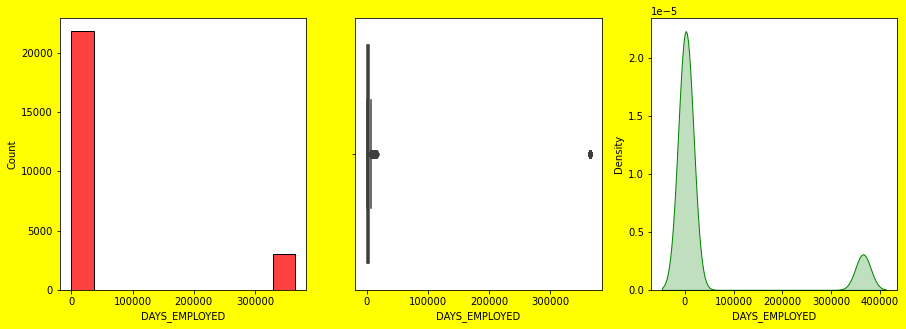

count    24825.000000
mean      4487.127009
std       3299.650241
min          0.000000
25%       1671.000000
50%       4056.000000
75%       6646.000000
max      22928.000000
Name: DAYS_REGISTRATION, dtype: float64
                                    Distribution of  DAYS_REGISTRATION


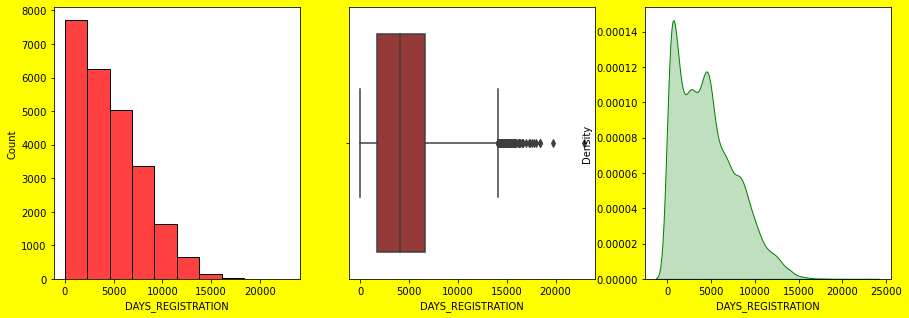

count    24825.000000
mean      2732.099617
std       1516.975313
min          0.000000
25%       1392.000000
50%       2797.000000
75%       4119.000000
max       6207.000000
Name: DAYS_ID_PUBLISH, dtype: float64
                                    Distribution of  DAYS_ID_PUBLISH


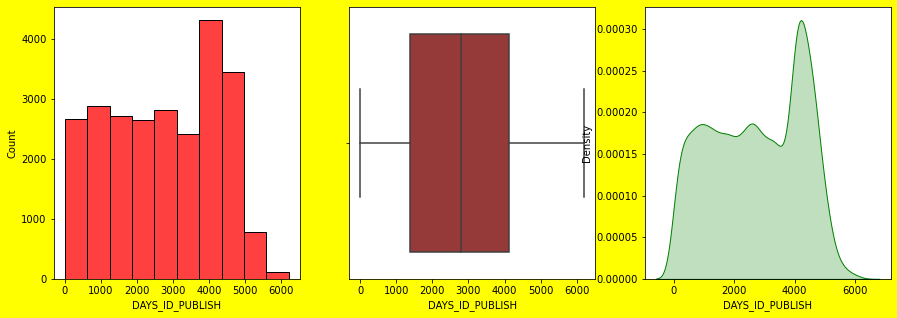

count    24825.000000
mean         2.181269
std          0.951327
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         13.000000
Name: CNT_FAM_MEMBERS, dtype: float64
                                    Distribution of  CNT_FAM_MEMBERS


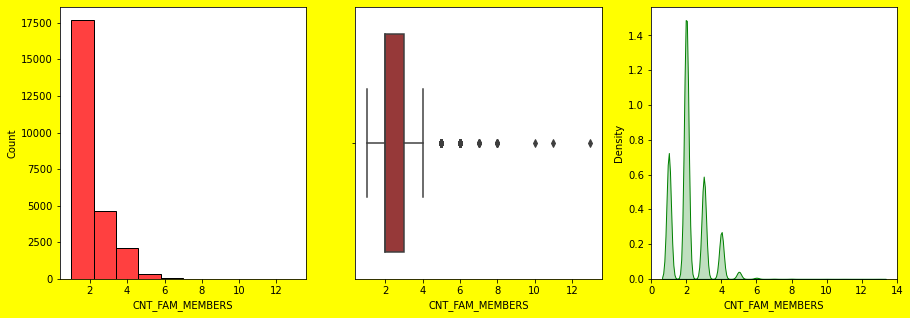

count    24825.000000
mean         2.153635
std          0.505052
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: REGION_RATING_CLIENT, dtype: float64
                                    Distribution of  REGION_RATING_CLIENT


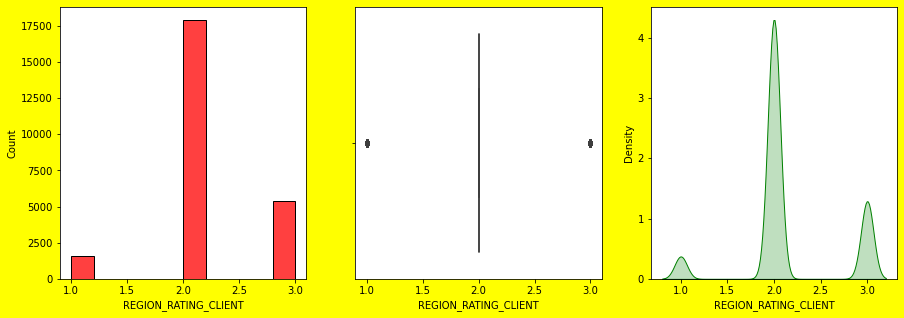

count    24825.000000
mean         2.134824
std          0.499909
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64
                                    Distribution of  REGION_RATING_CLIENT_W_CITY


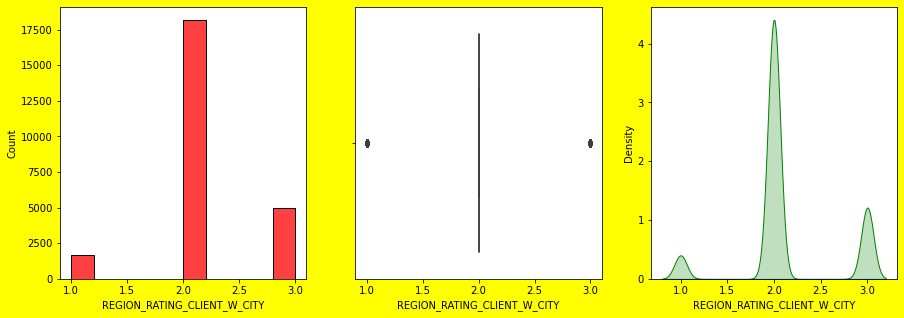

count    24825.000000
mean        11.797100
std          3.284299
min          0.000000
25%         10.000000
50%         12.000000
75%         14.000000
max         23.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64
                                    Distribution of  HOUR_APPR_PROCESS_START


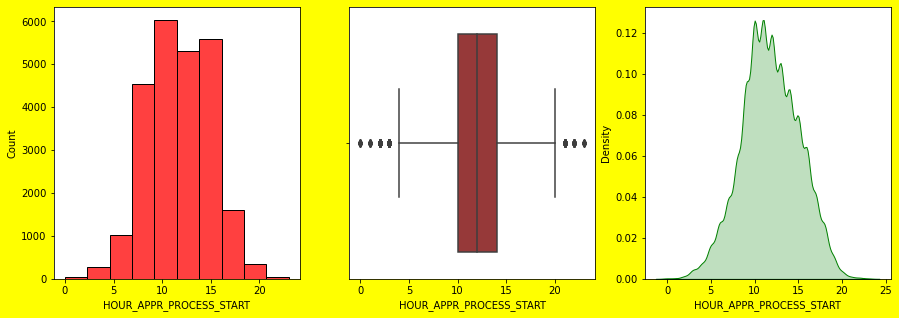

count    24825.000000
mean         0.017442
std          0.130914
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64
                                    Distribution of  REG_REGION_NOT_LIVE_REGION


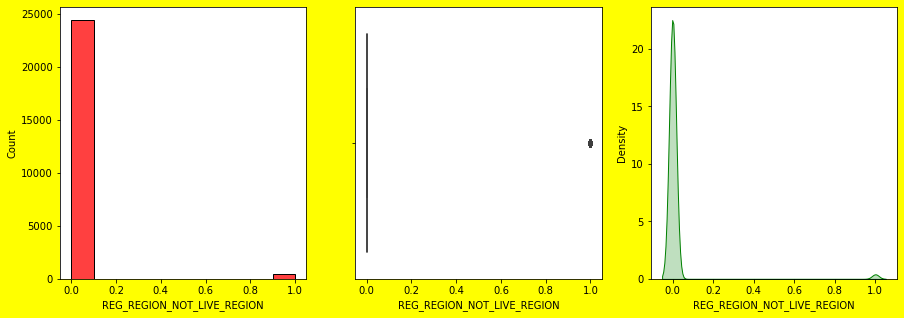

count    24825.000000
mean         0.055911
std          0.229755
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: REG_REGION_NOT_WORK_REGION, dtype: float64
                                    Distribution of  REG_REGION_NOT_WORK_REGION


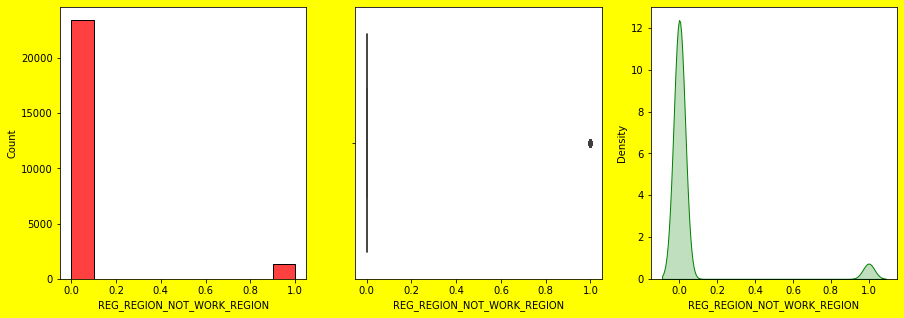

count    24825.000000
mean         0.042538
std          0.201817
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: LIVE_REGION_NOT_WORK_REGION, dtype: float64
                                    Distribution of  LIVE_REGION_NOT_WORK_REGION


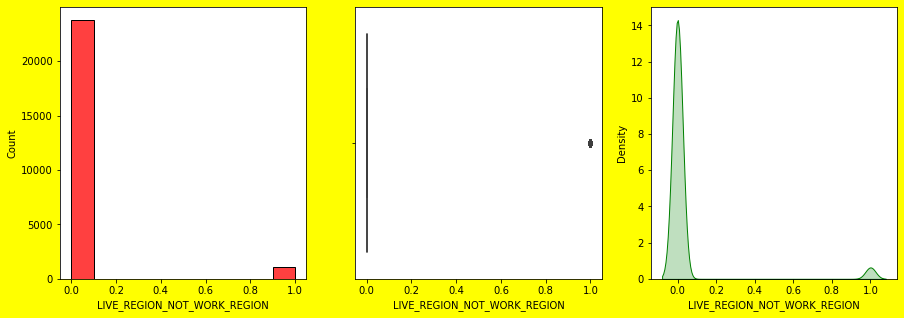

count    24825.000000
mean         0.118389
std          0.323074
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: REG_CITY_NOT_LIVE_CITY, dtype: float64
                                    Distribution of  REG_CITY_NOT_LIVE_CITY


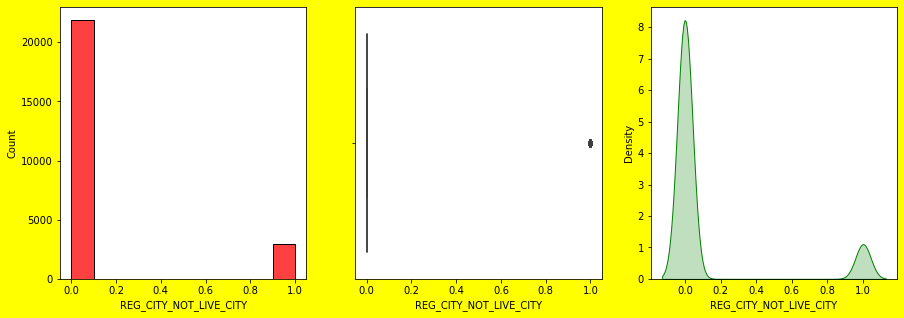

count    24825.00000
mean         0.30292
std          0.45953
min          0.00000
25%          0.00000
50%          0.00000
75%          1.00000
max          1.00000
Name: REG_CITY_NOT_WORK_CITY, dtype: float64
                                    Distribution of  REG_CITY_NOT_WORK_CITY


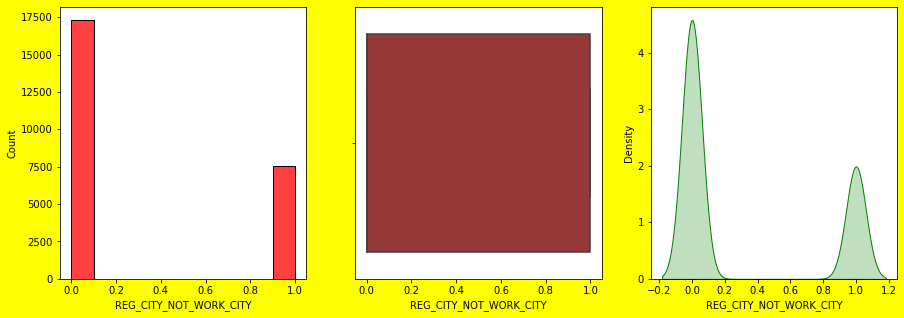

count    24825.000000
mean         0.221672
std          0.415380
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: LIVE_CITY_NOT_WORK_CITY, dtype: float64
                                    Distribution of  LIVE_CITY_NOT_WORK_CITY


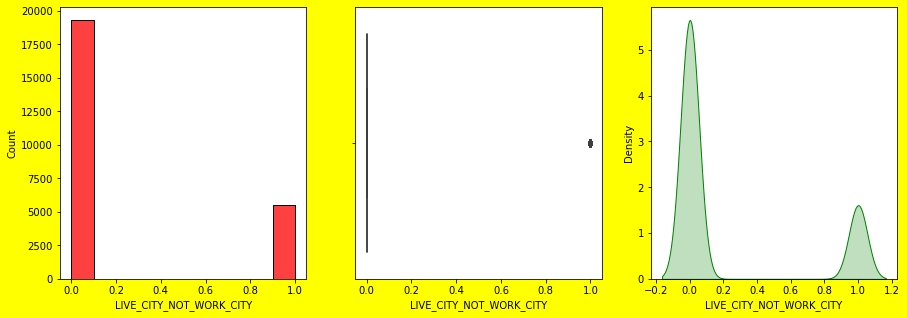

In [58]:
for col in numerical_col:
    num_graph(col)

# Conclusion(For Continuous columns making payments not on time.) :
1.Most of the people have 1-2 count of children,There are also outliers present.

2.1.690777e+05 is mean income amount of all data set.

3.6.026483e+05 is mean amount credit of all data set

4.Most of amt_annunity is between 16000-34000.

5.From Kdeplot of amt_goods_price  we can see that it is right skewed.its has more outliers.

6.50% of people have have days employed 6000

7.Most 50% of DAYS_REGISTRATION have done near 1700-4300days.

8.Most 50% of DAYS_ID_PUBLISH have done near 1700-3295days.

9.75% of CNT_FAM_MEMBERS is at 3 member only.





# G. Univariate analysis of categorical column for TARGET=1 (Applicants not making payments on time)

In [59]:
def cat_graph(c):
    print(target1[c].value_counts())
    plt.figure(figsize=(15,7),facecolor='yellow')
    plt.subplot(121)
    sns.countplot(y=target1[c],ec='black',palette='gist_rainbow')
    plt.yticks(rotation=0)
    plt.subplot(122)
    perc=target1[c].value_counts()
    lbl=list(target1[c].value_counts().index)
    plt.pie(perc,labels=lbl,autopct='%.2f%%',startangle=50)
    plt.show()
    

Cash loans         23221
Revolving loans     1604
Name: NAME_CONTRACT_TYPE, dtype: int64


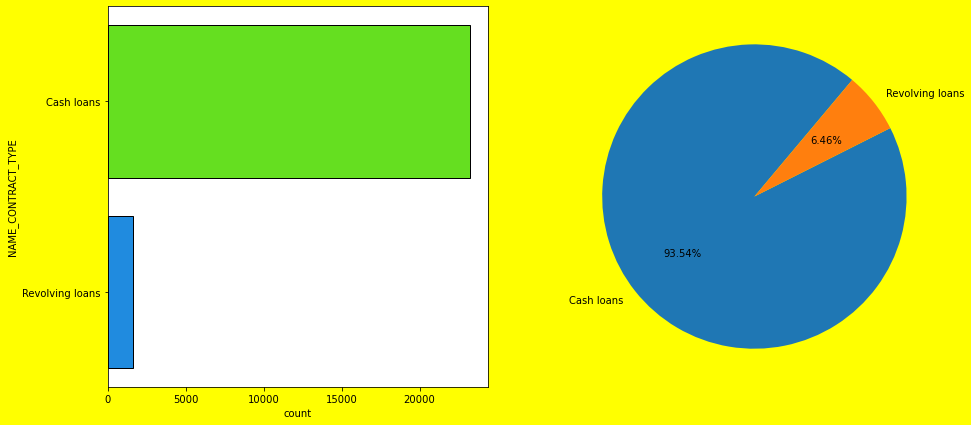

F    14170
M    10655
Name: CODE_GENDER, dtype: int64


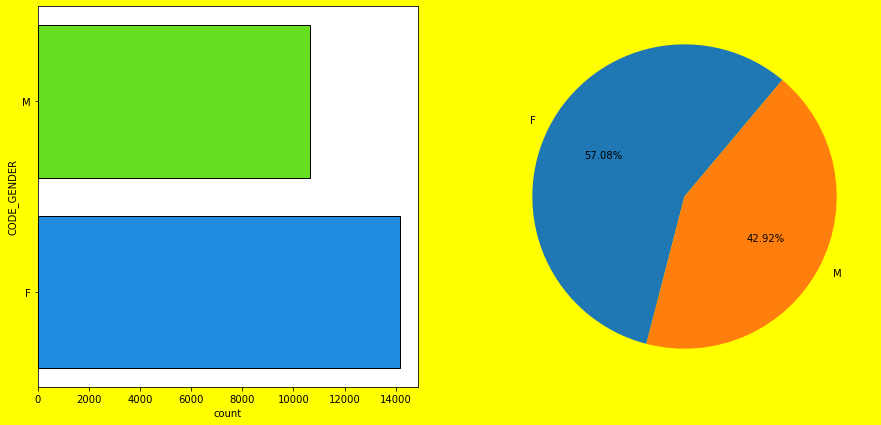

N    17249
Y     7576
Name: FLAG_OWN_CAR, dtype: int64


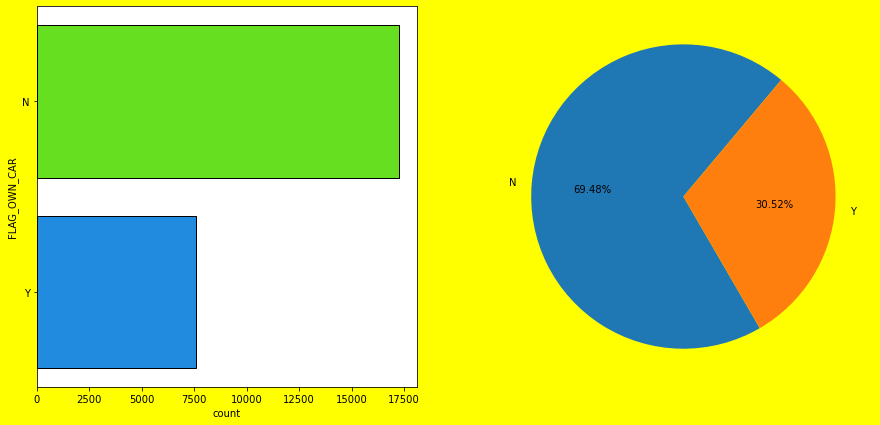

Y    16983
N     7842
Name: FLAG_OWN_REALTY, dtype: int64


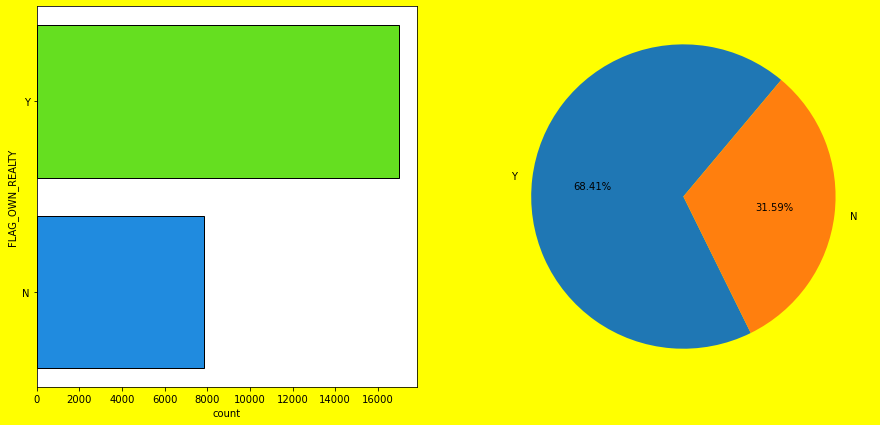

Unaccompanied      20407
Family              3009
Spouse, partner      895
Children             241
Other_B              174
Other_A               76
Group of people       23
Name: NAME_TYPE_SUITE, dtype: int64


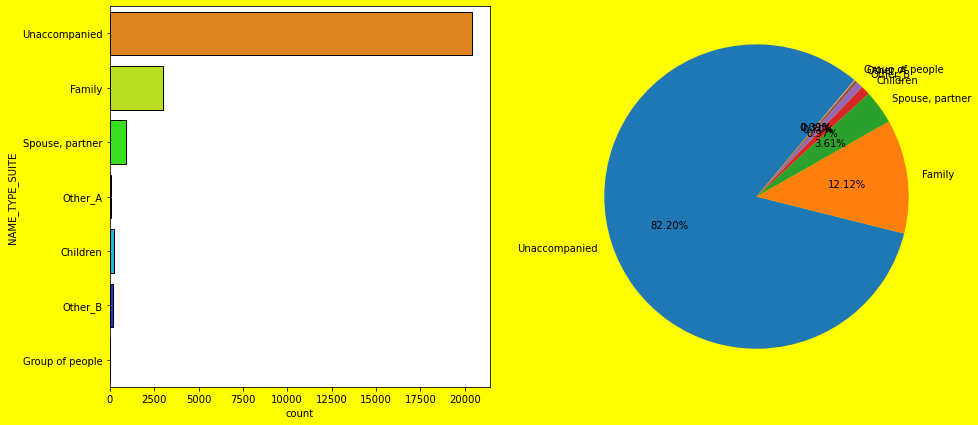

Working                 15224
Commercial associate     5360
Pensioner                2982
State servant            1249
Unemployed                  8
Maternity leave             2
Name: NAME_INCOME_TYPE, dtype: int64


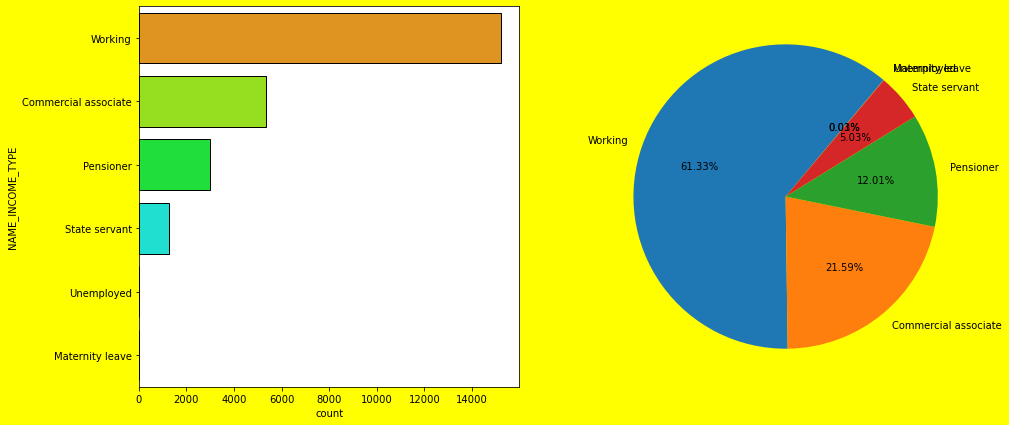

Secondary / secondary special    19524
Higher education                  4009
Incomplete higher                  872
Lower secondary                    417
Academic degree                      3
Name: NAME_EDUCATION_TYPE, dtype: int64


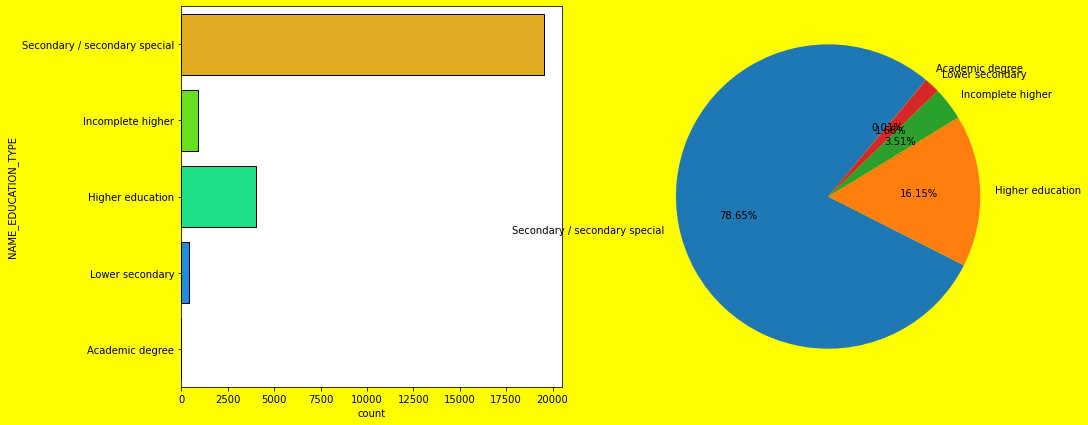

Married                 14850
Single / not married     4457
Civil marriage           2961
Separated                1620
Widow                     937
Name: NAME_FAMILY_STATUS, dtype: int64


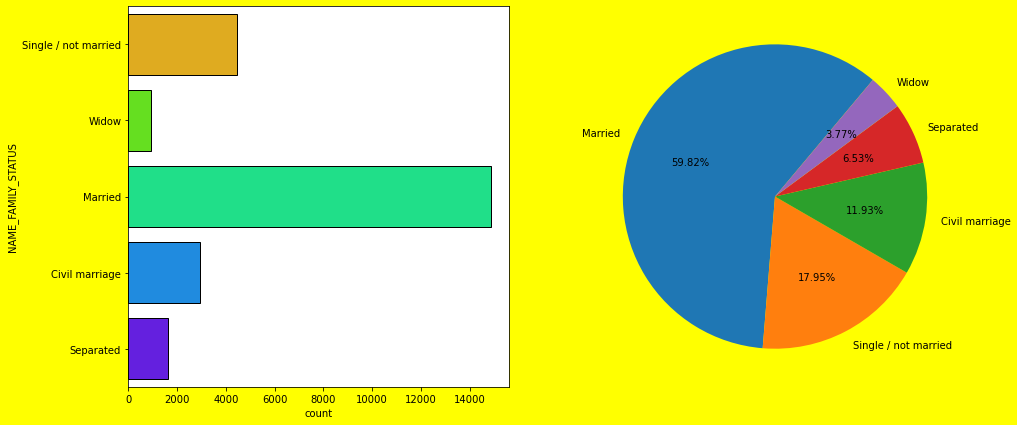

House / apartment      21272
With parents            1736
Municipal apartment      955
Rented apartment         601
Office apartment         172
Co-op apartment           89
Name: NAME_HOUSING_TYPE, dtype: int64


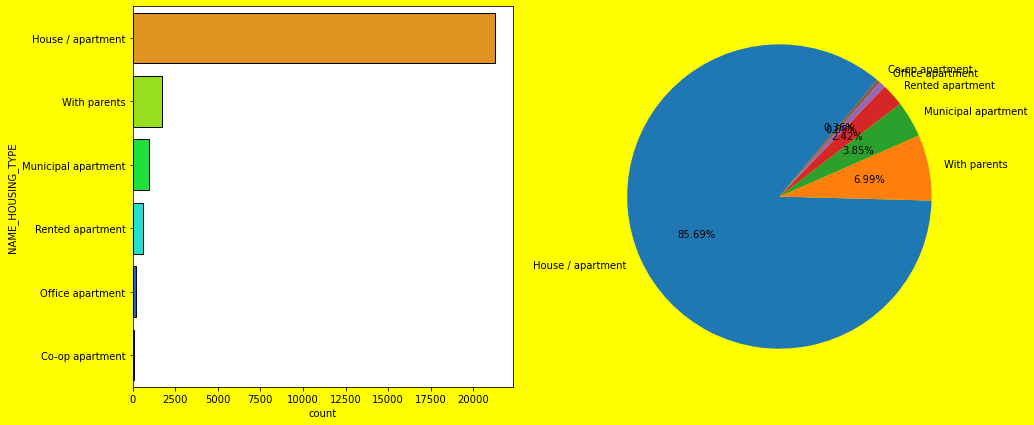

Laborers                 12116
Sales staff               3092
Drivers                   2107
Core staff                1738
Managers                  1328
Security staff             722
High skill tech staff      701
Cooking staff              621
Medicine staff             572
Accountants                474
Cleaning staff             447
Low-skill Laborers         359
Private service staff      175
Waiters/barmen staff       152
Secretaries                 92
Realty agents               59
HR staff                    36
IT staff                    34
Name: OCCUPATION_TYPE, dtype: int64


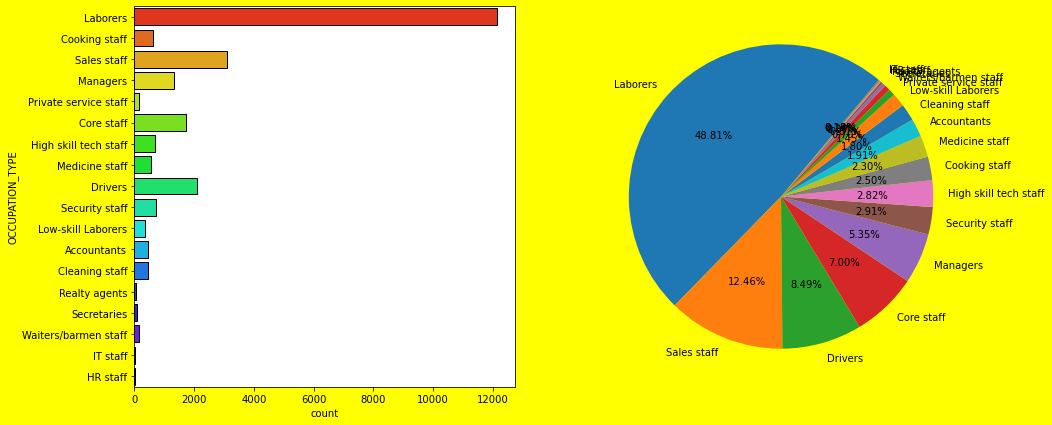

TUESDAY      4501
WEDNESDAY    4238
FRIDAY       4101
THURSDAY     4098
MONDAY       3934
SATURDAY     2670
SUNDAY       1283
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64


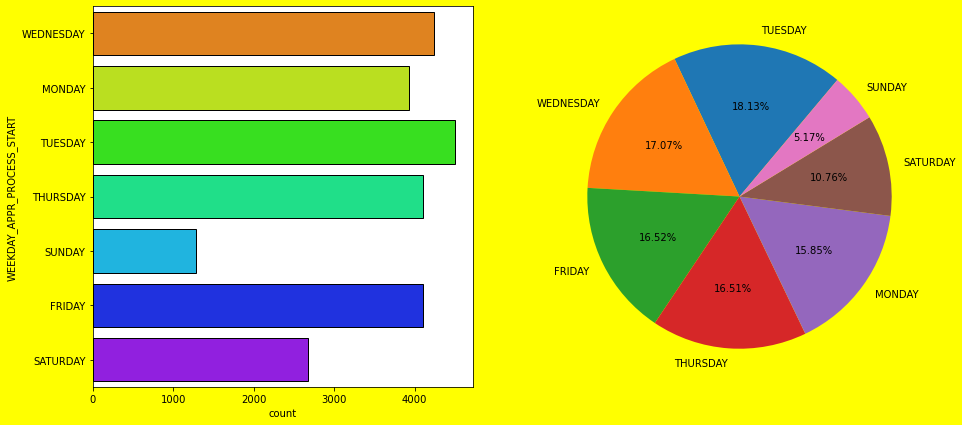

Business Entity Type 3    6323
Self-employed             3908
XNA                       2990
Other                     1275
Business Entity Type 2     900
Construction               785
Trade: type 7              740
Medicine                   737
Government                 726
School                     526
Transport: type 4          501
Business Entity Type 1     487
Kindergarten               484
Trade: type 3              361
Industry: type 3           348
Security                   324
Agriculture                257
Housing                    235
Industry: type 11          234
Industry: type 9           225
Restaurant                 212
Transport: type 3          187
Postal                     182
Transport: type 2          172
Military                   135
Trade: type 2              133
Bank                       130
Police                     117
Industry: type 1           115
Industry: type 7           105
Services                   104
Security Ministries         96
Industry

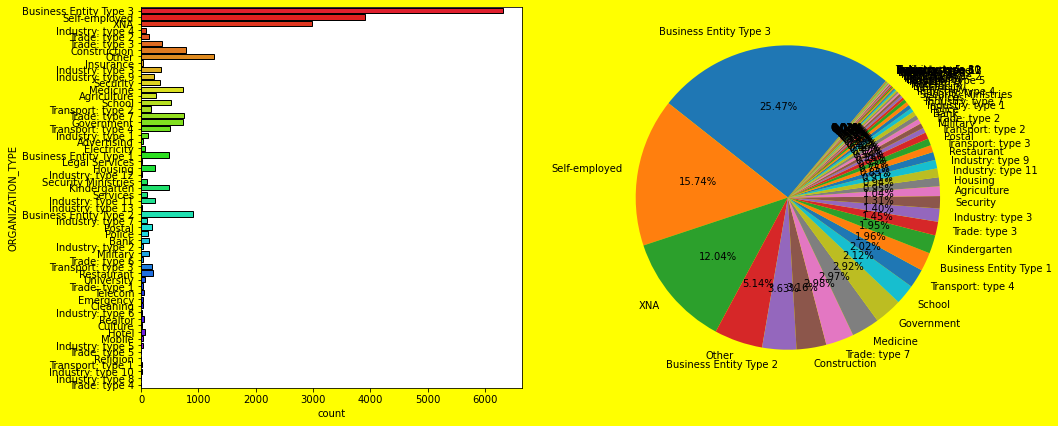

In [60]:
for column in category_col:
    cat_graph(column)

# Conclusion (For Univariate analysis categorical columns for people making payment not on time ):
1.Revoling loans(6.46%) are less compared to cash loans.

2.more female member applied for for loan (57%)then male(42%)

3.66% of people do not have car.while 30% have car.

4.More people have have own Realty 68%,while 31% of people dont haveown realty.

5.More people have Unaccompanied NAME_TYPE_SUITE 82.20%,while others have low NAME_TYPE_SUITE.

6.63.78% of people have Income type of working.

7.76% have NAME_EDUCATION_TYPE of Secondary / secondary special.

8.There are more people Married 59%.

9.85% have House / apartment type housing type.

10.48% of people have OCCUPATION_TYPE of labores.

11.Most of the people have appplied for loan process on tuesday and wednesday.

12.25% of people have ORGANIZATION_TYPE of Business Entity Type 3.




# H. Bivariate Analysis for categorical columns

In [61]:
category_col.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

TARGET 0
Cash loans         255011
Revolving loans     27675
Name: NAME_CONTRACT_TYPE, dtype: int64
TARGET 1
Cash loans         23221
Revolving loans     1604
Name: NAME_CONTRACT_TYPE, dtype: int64
Cash loans         0.091059
Revolving loans    0.057958
Name: NAME_CONTRACT_TYPE, dtype: float64


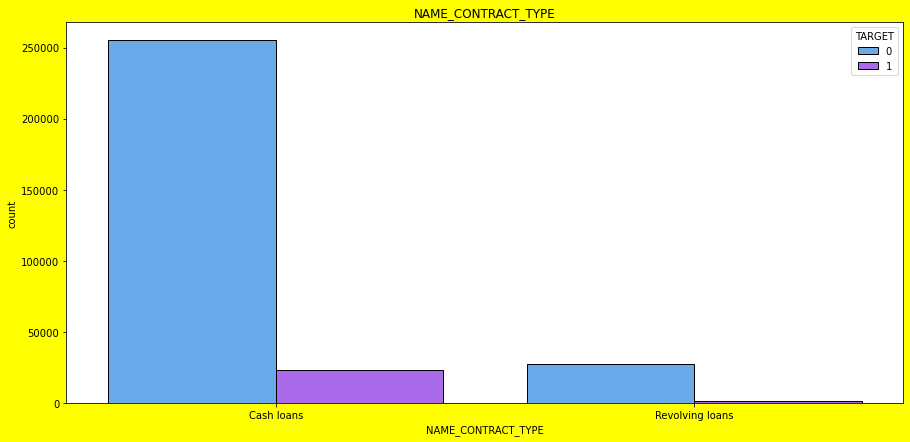

In [62]:
print('TARGET 0')
print(target0.NAME_CONTRACT_TYPE.value_counts())
print('TARGET 1')
print(target1.NAME_CONTRACT_TYPE.value_counts())
print(target1.NAME_CONTRACT_TYPE.value_counts()/target0.NAME_CONTRACT_TYPE.value_counts())
plt.figure(figsize=(15,7),facecolor='yellow')
sns.countplot(data=d,x=d.NAME_CONTRACT_TYPE,hue=d['TARGET'],palette='cool',ec='black')
plt.title('NAME_CONTRACT_TYPE')
plt.show()

# Conclusion:
1.More people have applied for  Cash loan contract type than revolving loans.

2.People with Cash loans contract type have high chance to be defaulter. 

TARGET 0
F      188278
M       94404
XNA         4
Name: CODE_GENDER, dtype: int64
TARGET 1
F    14170
M    10655
Name: CODE_GENDER, dtype: int64
F      0.075261
M      0.112866
XNA         NaN
Name: CODE_GENDER, dtype: float64


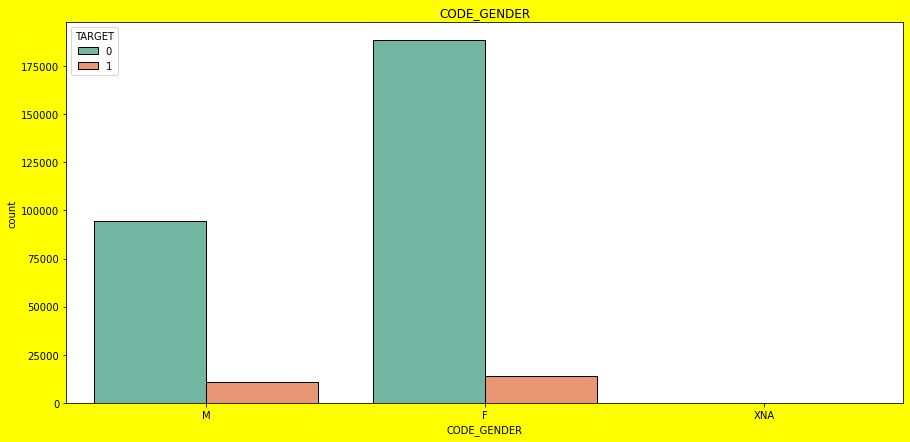

In [63]:
print('TARGET 0')
print(target0.CODE_GENDER.value_counts())
print('TARGET 1')
print(target1.CODE_GENDER.value_counts())
print(target1.CODE_GENDER.value_counts()/target0.CODE_GENDER.value_counts())
plt.figure(figsize=(15,7),facecolor='yellow')
sns.countplot(data=d,x=d.CODE_GENDER,hue=d['TARGET'],ec='black',palette = 'Set2')
plt.title('CODE_GENDER')
plt.show()

# Conclusion:
1.Female people have applied more for loan.

2.while male people have high chance to be defaulter.

TARGET 0
N    185675
Y     97011
Name: FLAG_OWN_CAR, dtype: int64
TARGET 1
N    17249
Y     7576
Name: FLAG_OWN_CAR, dtype: int64
TARGET 0
Y    196329
N     86357
Name: FLAG_OWN_REALTY, dtype: int64
TARGET 1
Y    16983
N     7842
Name: FLAG_OWN_REALTY, dtype: int64
N    0.092899
Y    0.078094
Name: FLAG_OWN_CAR, dtype: float64
Y    0.086503
N    0.090809
Name: FLAG_OWN_REALTY, dtype: float64


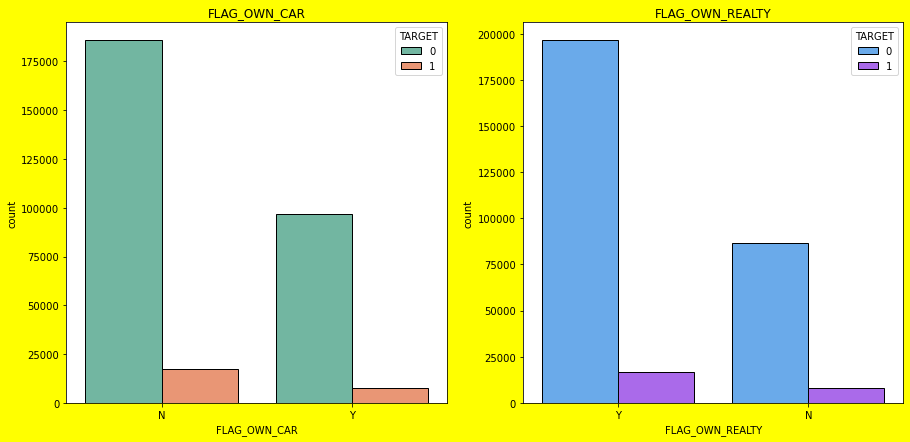

In [64]:
print('TARGET 0')
print(target0.FLAG_OWN_CAR.value_counts())
print('TARGET 1')
print(target1.FLAG_OWN_CAR.value_counts())
print('TARGET 0')
print(target0.FLAG_OWN_REALTY.value_counts())
print('TARGET 1')
print(target1.FLAG_OWN_REALTY.value_counts())
print(target1.FLAG_OWN_CAR.value_counts()/target0.FLAG_OWN_CAR.value_counts())
print(target1.FLAG_OWN_REALTY.value_counts()/target0.FLAG_OWN_REALTY.value_counts())
plt.figure(figsize=(15,7),facecolor='yellow')
plt.subplot(121)
sns.countplot(data=d,x=d.FLAG_OWN_CAR,hue=d['TARGET'],palette = 'Set2',ec='black')
plt.title('FLAG_OWN_CAR')
plt.subplot(122)
plt.title('FLAG_OWN_REALTY')
sns.countplot(data=d,x=d.FLAG_OWN_REALTY,hue=d['TARGET'],palette ='cool',ec='black')

plt.show()

# Conclusion:
1.People with property have more made more payment on time.

2.People with no car have applied more applied for loan.

TARGET 0
Unaccompanied      229411
Family              37140
Spouse, partner     10475
Children             3026
Other_B              1596
Other_A               790
Group of people       248
Name: NAME_TYPE_SUITE, dtype: int64
TARGET 1
Unaccompanied      20407
Family              3009
Spouse, partner      895
Children             241
Other_B              174
Other_A               76
Group of people       23
Name: NAME_TYPE_SUITE, dtype: int64
Unaccompanied      0.088954
Family             0.081018
Spouse, partner    0.085442
Children           0.079643
Other_B            0.109023
Other_A            0.096203
Group of people    0.092742
Name: NAME_TYPE_SUITE, dtype: float64


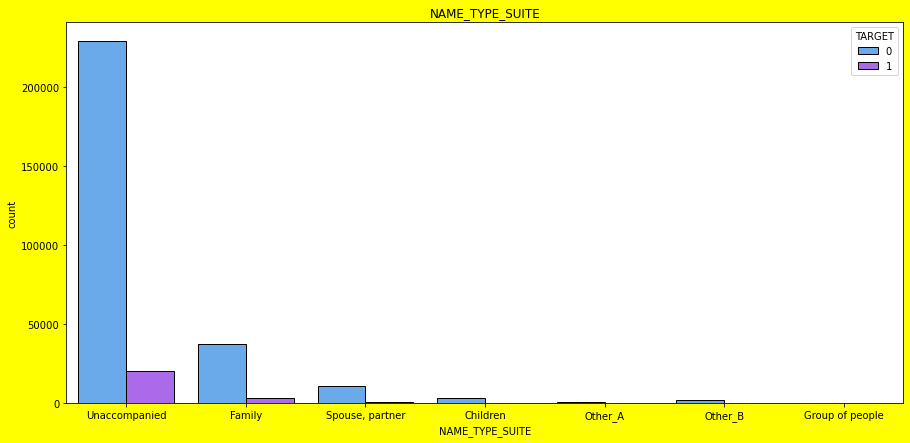

In [65]:
print('TARGET 0')
print(target0.NAME_TYPE_SUITE.value_counts())
print('TARGET 1')
print(target1.NAME_TYPE_SUITE.value_counts())
print(target1.NAME_TYPE_SUITE.value_counts()/target0.NAME_TYPE_SUITE.value_counts())
plt.figure(figsize=(15,7),facecolor='yellow')
sns.countplot(data=d,x=d.NAME_TYPE_SUITE,hue=d['TARGET'],ec='black',palette ='cool')

plt.title('NAME_TYPE_SUITE')
plt.show()

# Conclusion:
1.People of Other_B type suite have high chance to be defaulters.

TARGET 0
Working                 143550
Commercial associate     66257
Pensioner                52380
State servant            20454
Student                     18
Unemployed                  14
Businessman                 10
Maternity leave              3
Name: NAME_INCOME_TYPE, dtype: int64
TARGET 1
Working                 15224
Commercial associate     5360
Pensioner                2982
State servant            1249
Unemployed                  8
Maternity leave             2
Name: NAME_INCOME_TYPE, dtype: int64
Businessman                  NaN
Commercial associate    0.080897
Maternity leave         0.666667
Pensioner               0.056930
State servant           0.061064
Student                      NaN
Unemployed              0.571429
Working                 0.106054
Name: NAME_INCOME_TYPE, dtype: float64


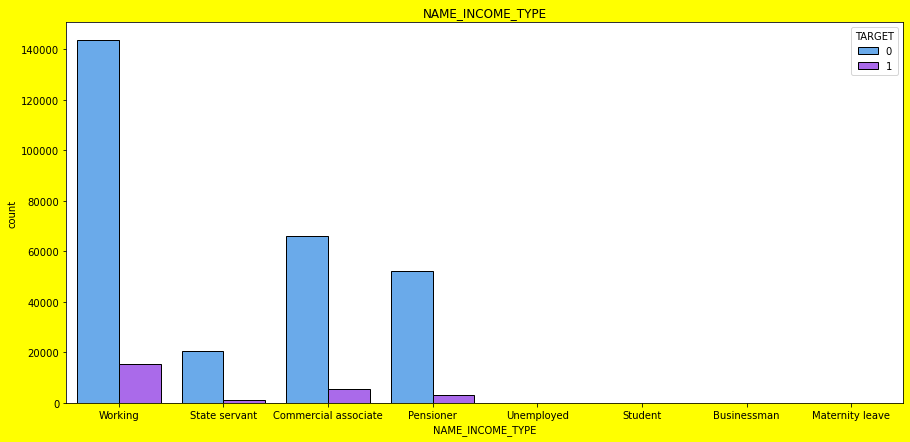

In [66]:
print('TARGET 0')
print(target0.NAME_INCOME_TYPE.value_counts())
print('TARGET 1')
print(target1.NAME_INCOME_TYPE.value_counts())
print(target1.NAME_INCOME_TYPE.value_counts()/target0.NAME_INCOME_TYPE.value_counts())
plt.figure(figsize=(15,7),facecolor='yellow')
sns.countplot(data=d,x=d.NAME_INCOME_TYPE,hue=d['TARGET'],palette='cool',ec='black')
plt.title('NAME_INCOME_TYPE')
plt.show()

# Conclusion :
1.57% people with income type Unemployed have high chance to be defaulters

TARGET 0
Secondary / secondary special    198867
Higher education                  70854
Incomplete higher                  9405
Lower secondary                    3399
Academic degree                     161
Name: NAME_EDUCATION_TYPE, dtype: int64
TARGET 1
Secondary / secondary special    19524
Higher education                  4009
Incomplete higher                  872
Lower secondary                    417
Academic degree                      3
Name: NAME_EDUCATION_TYPE, dtype: int64
Secondary / secondary special    0.098176
Higher education                 0.056581
Incomplete higher                0.092717
Lower secondary                  0.122683
Academic degree                  0.018634
Name: NAME_EDUCATION_TYPE, dtype: float64


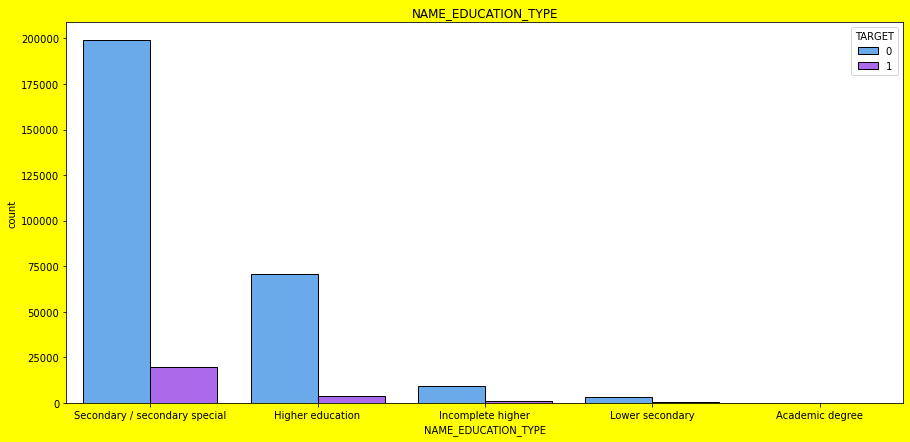

In [67]:
print('TARGET 0')
print(target0.NAME_EDUCATION_TYPE.value_counts())
print('TARGET 1')
print(target1.NAME_EDUCATION_TYPE.value_counts())
print(target1.NAME_EDUCATION_TYPE.value_counts()/target0.NAME_EDUCATION_TYPE.value_counts())
plt.figure(figsize=(15,7),facecolor='yellow')
sns.countplot(data=d,x=d.NAME_EDUCATION_TYPE,hue=d['TARGET'],palette='cool',ec='black')
plt.title('NAME_EDUCATION_TYPE')
plt.show()

# Conclusion :
1. People with NAME_EDUCATION_TYPE type Lower secondary  have high risk to be defaulters.

TARGET 0
House / apartment      251596
With parents            13104
Municipal apartment     10228
Rented apartment         4280
Office apartment         2445
Co-op apartment          1033
Name: NAME_HOUSING_TYPE, dtype: int64
TARGET 1
House / apartment      21272
With parents            1736
Municipal apartment      955
Rented apartment         601
Office apartment         172
Co-op apartment           89
Name: NAME_HOUSING_TYPE, dtype: int64
House / apartment      0.084548
With parents           0.132479
Municipal apartment    0.093371
Rented apartment       0.140421
Office apartment       0.070348
Co-op apartment        0.086157
Name: NAME_HOUSING_TYPE, dtype: float64


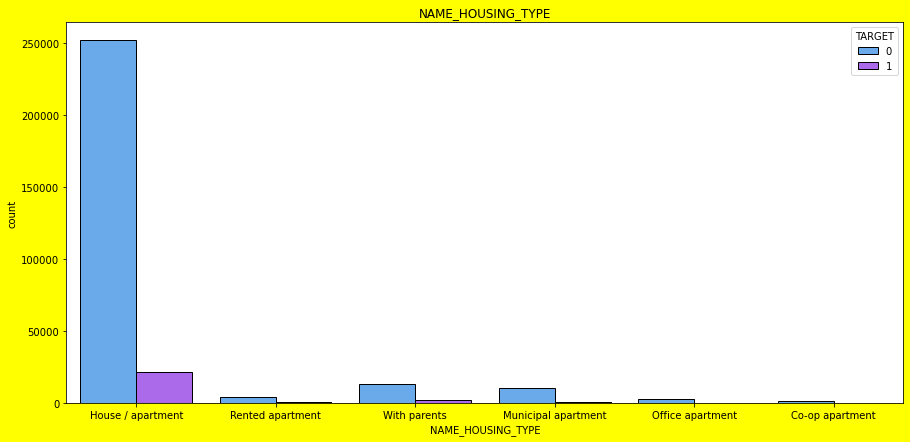

In [68]:
print('TARGET 0')
print(target0.NAME_HOUSING_TYPE.value_counts())
print('TARGET 1')
print(target1.NAME_HOUSING_TYPE.value_counts())
print(target1.NAME_HOUSING_TYPE.value_counts()/target0.NAME_HOUSING_TYPE.value_counts())
plt.figure(figsize=(15,7),facecolor='yellow')
sns.countplot(data=d,x=d.NAME_HOUSING_TYPE,hue=d['TARGET'],palette='cool',ec='black')
plt.title('NAME_HOUSING_TYPE')
plt.show()


# Conclusion:
1.People with housing type Rented apartment have high risk to be defaulters.

2.People with housing type With parents  have high risk to be defaulters.

TARGET 0
Laborers                 139461
Sales staff               29010
Core staff                25832
Managers                  20043
Drivers                   16496
High skill tech staff     10679
Accountants                9339
Medicine staff             7965
Security staff             5999
Cooking staff              5325
Cleaning staff             4206
Private service staff      2477
Low-skill Laborers         1734
Secretaries                1213
Waiters/barmen staff       1196
Realty agents               692
HR staff                    527
IT staff                    492
Name: OCCUPATION_TYPE, dtype: int64
TARGET 1
Laborers                 12116
Sales staff               3092
Drivers                   2107
Core staff                1738
Managers                  1328
Security staff             722
High skill tech staff      701
Cooking staff              621
Medicine staff             572
Accountants                474
Cleaning staff             447
Low-skill Laborers         35

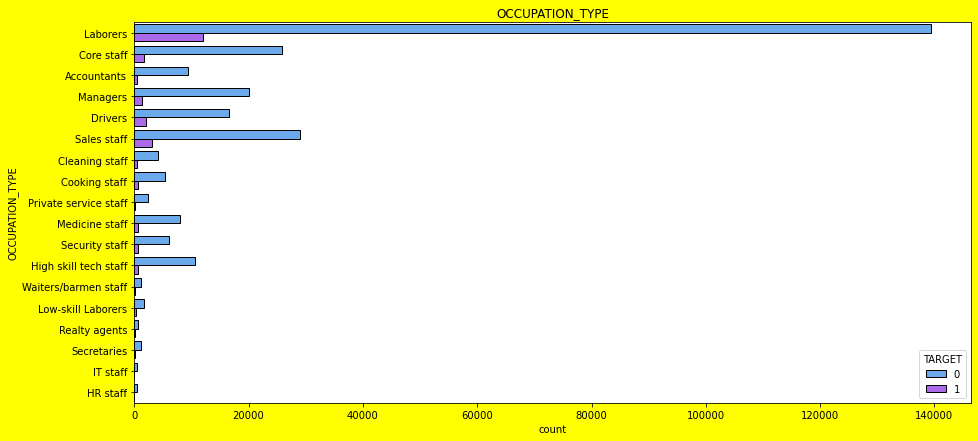

In [69]:
print('TARGET 0')
print(target0.OCCUPATION_TYPE.value_counts())
print('TARGET 1')
print(target1.OCCUPATION_TYPE.value_counts())
print(target1.OCCUPATION_TYPE.value_counts()/target0.OCCUPATION_TYPE.value_counts())
plt.figure(figsize=(15,7),facecolor='yellow')

sns.countplot(data=d,y=d.OCCUPATION_TYPE,hue=d['TARGET'],palette='cool',ec='black')
plt.title('OCCUPATION_TYPE')

plt.show()

# Conclusion:
1.more people almost  20% Low-skill Laborers have high risk of to be defaulters.

2.Security staff, Waiters/barmen staff have high risk of to be defaulters.

# USING CORRELATION TO CHOOSE BEST COLUMNS FOR Bivariate Analysis and Multivariate Analysis

In [70]:
target0=target0.drop(['SK_ID_CURR', 'TARGET'], axis=1)
target1=target1.drop(['SK_ID_CURR', 'TARGET'], axis=1)

In [71]:
cor_target0=round(target0.corr(),1)
cor_target0

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                          1.0               0.0         0.0   
AMT_INCOME_TOTAL                      0.0               1.0         0.3   
AMT_CREDIT                            0.0               0.3         1.0   
AMT_ANNUITY                           0.0               0.4         0.8   
AMT_GOODS_PRICE                      -0.0               0.3         1.0   
REGION_POPULATION_RELATIVE           -0.0               0.2         0.1   
DAYS_BIRTH                           -0.3              -0.1         0.0   
DAYS_EMPLOYED                        -0.2              -0.1        -0.1   
DAYS_REGISTRATION                    -0.2              -0.1        -0.0   
DAYS_ID_PUBLISH                       0.0              -0.0         0.0   
CNT_FAM_MEMBERS                       0.9               0.0         0.1   
REGION_RATING_CLIENT                  0.0              -0.2        -0.1   
REGION_RATING_CLIENT_W_CITY           0.0              -0.2        -0.1   
HOUR_APPR_PROCESS_START              -0.0               0.1         0.1   
REG_REGION_NOT_LIVE_REGION           -0.0               0.1         0.0   
REG_REGION_NOT_WORK_REGION            0.0               0.1         0.1   
LIVE_REGION_NOT_WORK_REGION           0.0               0.1         0.1   
REG_CITY_NOT_LIVE_CITY                0.0               0.0        -0.0   
REG_CITY_NOT_WORK_CITY                0.1               0.0        -0.0   
LIVE_CITY_NOT_WORK_CITY               0.1               0.0         0.0   

                             AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN                         0.0             -0.0   
AMT_INCOME_TOTAL                     0.4              0.3   
AMT_CREDIT                           0.8              1.0   
AMT_ANNUITY                          1.0              0.8   
AMT_GOODS_PRICE                      0.8              1.0   
REGION_POPULATION_RELATIVE           0.1              0.1   
DAYS_BIRTH                          -0.0              0.0   
DAYS_EMPLOYED                       -0.1             -0.1   
DAYS_REGISTRATION                   -0.0             -0.0   
DAYS_ID_PUBLISH                     -0.0              0.0   
CNT_FAM_MEMBERS                      0.1              0.1   
REGION_RATING_CLIENT                -0.1             -0.1   
REGION_RATING_CLIENT_W_CITY         -0.1             -0.1   
HOUR_APPR_PROCESS_START              0.1              0.1   
REG_REGION_NOT_LIVE_REGION           0.0              0.0   
REG_REGION_NOT_WORK_REGION           0.1              0.1   
LIVE_REGION_NOT_WORK_REGION          0.1              0.1   
REG_CITY_NOT_LIVE_CITY              -0.0             -0.0   
REG_CITY_NOT_WORK_CITY               0.0             -0.0   
LIVE_CITY_NOT_WORK_CITY              0.0              0.0   

                             REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
CNT_CHILDREN                                       -0.0        -0.3   
AMT_INCOME_TOTAL                                    0.2        -0.1   
AMT_CREDIT                                          0.1         0.0   
AMT_ANNUITY                                         0.1        -0.0   
AMT_GOODS_PRICE                                     0.1         0.0   
REGION_POPULATION_RELATIVE                          1.0         0.0   
DAYS_BIRTH                                          0.0         1.0   
DAYS_EMPLOYED                                      -0.0         0.6   
DAYS_REGISTRATION                                   0.1         0.3   
DAYS_ID_PUBLISH                                     0.0         0.3   
CNT_FAM_MEMBERS                                    -0.0        -0.3   
REGION_RATING_CLIENT                               -0.5        -0.0   
REGION_RATING_CLIENT_W_CITY                        -0.5        -0.0   
HOUR_APPR_PROCESS_START                             0.2        -0.1   
REG_REGION_NOT_LIVE_REGION                          0.0        -0.1   
REG_REGION_NOT_WORK_REGION         

<AxesSubplot:>

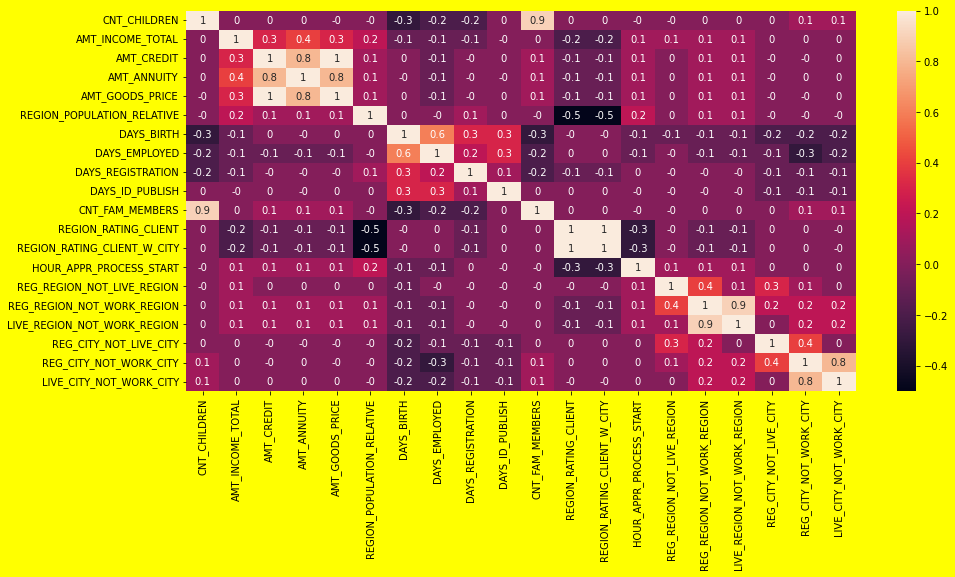

In [72]:
plt.figure(figsize=(15,7),facecolor='yellow')
sns.heatmap(cor_target0,annot=True)

In [73]:
cor_target1=round(target1.corr(),1)
cor_target1

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                          1.0               0.0        -0.0   
AMT_INCOME_TOTAL                      0.0               1.0         0.0   
AMT_CREDIT                           -0.0               0.0         1.0   
AMT_ANNUITY                           0.0               0.0         0.8   
AMT_GOODS_PRICE                      -0.0               0.0         1.0   
REGION_POPULATION_RELATIVE           -0.0               0.0         0.1   
DAYS_BIRTH                           -0.3              -0.0         0.1   
DAYS_EMPLOYED                        -0.2              -0.0         0.0   
DAYS_REGISTRATION                    -0.1              -0.0         0.0   
DAYS_ID_PUBLISH                       0.0               0.0         0.1   
CNT_FAM_MEMBERS                       0.9               0.0         0.1   
REGION_RATING_CLIENT                  0.0              -0.0        -0.1   
REGION_RATING_CLIENT_W_CITY           0.0              -0.0        -0.1   
HOUR_APPR_PROCESS_START              -0.0               0.0         0.0   
REG_REGION_NOT_LIVE_REGION           -0.0               0.0         0.0   
REG_REGION_NOT_WORK_REGION           -0.0               0.0         0.0   
LIVE_REGION_NOT_WORK_REGION          -0.0               0.0         0.0   
REG_CITY_NOT_LIVE_CITY               -0.0              -0.0        -0.0   
REG_CITY_NOT_WORK_CITY                0.0              -0.0        -0.0   
LIVE_CITY_NOT_WORK_CITY               0.1              -0.0        -0.0   

                             AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN                         0.0             -0.0   
AMT_INCOME_TOTAL                     0.0              0.0   
AMT_CREDIT                           0.8              1.0   
AMT_ANNUITY                          1.0              0.8   
AMT_GOODS_PRICE                      0.8              1.0   
REGION_POPULATION_RELATIVE           0.1              0.1   
DAYS_BIRTH                           0.0              0.1   
DAYS_EMPLOYED                       -0.1              0.0   
DAYS_REGISTRATION                   -0.0              0.0   
DAYS_ID_PUBLISH                      0.0              0.1   
CNT_FAM_MEMBERS                      0.1              0.0   
REGION_RATING_CLIENT                -0.1             -0.1   
REGION_RATING_CLIENT_W_CITY         -0.1             -0.1   
HOUR_APPR_PROCESS_START              0.0              0.0   
REG_REGION_NOT_LIVE_REGION           0.0              0.0   
REG_REGION_NOT_WORK_REGION           0.1              0.0   
LIVE_REGION_NOT_WORK_REGION          0.1              0.0   
REG_CITY_NOT_LIVE_CITY              -0.0             -0.0   
REG_CITY_NOT_WORK_CITY               0.0             -0.0   
LIVE_CITY_NOT_WORK_CITY              0.0             -0.0   

                             REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
CNT_CHILDREN                                       -0.0        -0.3   
AMT_INCOME_TOTAL                                    0.0        -0.0   
AMT_CREDIT                                          0.1         0.1   
AMT_ANNUITY                                         0.1         0.0   
AMT_GOODS_PRICE                                     0.1         0.1   
REGION_POPULATION_RELATIVE                          1.0         0.0   
DAYS_BIRTH                                          0.0         1.0   
DAYS_EMPLOYED                                       0.0         0.6   
DAYS_REGISTRATION                                   0.1         0.3   
DAYS_ID_PUBLISH                                     0.0         0.3   
CNT_FAM_MEMBERS                                    -0.0        -0.2   
REGION_RATING_CLIENT                               -0.4        -0.0   
REGION_RATING_CLIENT_W_CITY                        -0.4        -0.0   
HOUR_APPR_PROCESS_START                             0.1        -0.1   
REG_REGION_NOT_LIVE_REGION                         -0.0        -0.1   
REG_REGION_NOT_WORK_REGION         

<AxesSubplot:>

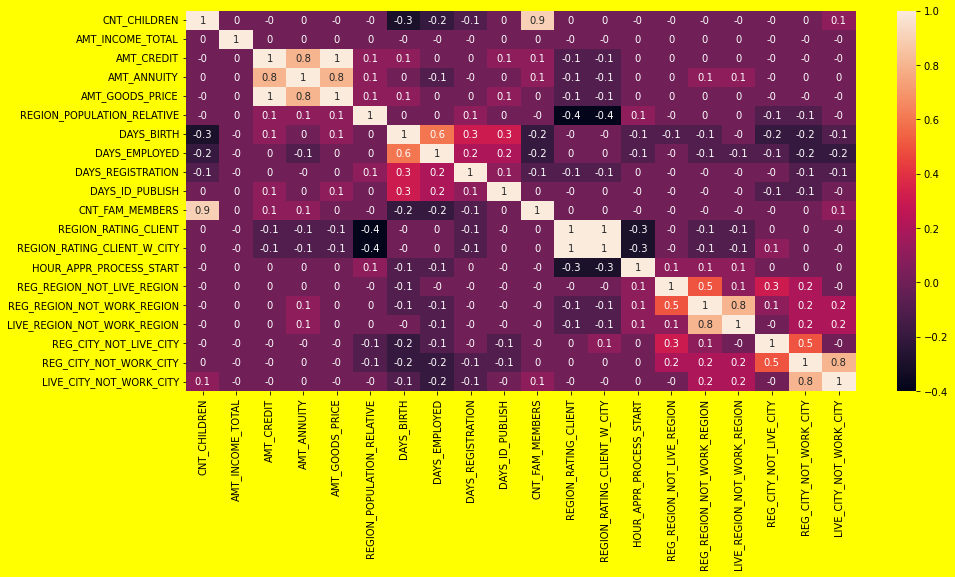

In [74]:
plt.figure(figsize=(15,7),facecolor='yellow')
sns.heatmap(cor_target1,annot=True)

# USING THIS COLUMNS FOR BIVARIATE ANALYSIS (NUMERICAL VARIABLE) AS THEY HAVE GOOD correlation FOR COUSTMER PAYING ON TIME 
AMT_CREDIT and AMT_GOODS_PRICE correlation 0.99

REGION_RATING_CLIENT_W_CITY and REGION_RATING_CLIENT correlation  0.95

CNT_FAM_MEMBERS and CNT_CHILDREN correlation  0.88

LIVE_REGION_NOT_WORK_REGION and REG_REGION_NOT_WORK_REGION correlation  0.85

AMT_ANNUITY and AMT_GOODS_PRICE correlation  0.79

AMT_ANNUITY and AMT_CREDIT  correlation  0.79



# USING THIS COLUMNS FOR BIVARIATE ANALYSIS (NUMERICAL VARIABLE) AS THEY HAVE GOOD correlation FOR COUSTMER PAYING NOT ON TIME 
AMT_CREDIT and AMT_GOODS_PRICE correlation 0.98

REGION_RATING_CLIENT_W_CITY and  REGION_RATING_CLIENT correlation 0.96

CNT_CHILDREN   and  CNT_FAM_MEMBERS correlation 0.88

LIVE_REGION_NOT_WORK_REGION and REG_REGION_NOT_WORK_REGION correlation 0.85

AMT_GOODS_PRICE and AMT_ANNUITY correlation 0.76

AMT_ANNUITY and AMT_CREDIT correlation 0.76

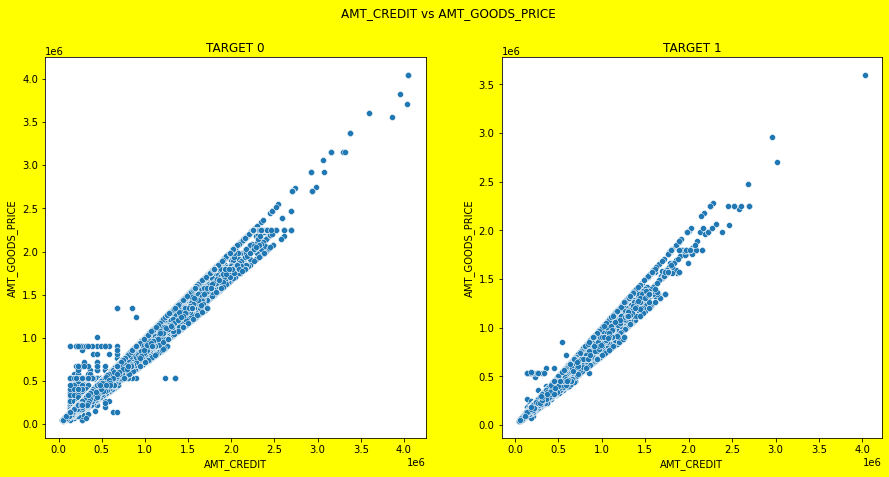

In [75]:
plt.figure(figsize=(15,7),facecolor='yellow')
plt.suptitle('AMT_CREDIT vs AMT_GOODS_PRICE ')
plt.subplot(121)
plt.title('TARGET 0')
sns.scatterplot(data=target0,x='AMT_CREDIT',y='AMT_GOODS_PRICE')
plt.subplot(122)
plt.title('TARGET 1')
sns.scatterplot(data=target1,x='AMT_CREDIT',y='AMT_GOODS_PRICE')
plt.show()

# Conclusion : AMT_CREDIT and AMT_GOODS_PRICE have positive Correlation.

Target 0
count    2.826860e+05
mean     5.427328e+05
std      3.736156e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.850024e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64
Target 1
count    2.482500e+04
mean     4.890142e+05
std      3.115080e+05
min      4.500000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.750000e+05
max      3.600000e+06
Name: AMT_GOODS_PRICE, dtype: float64


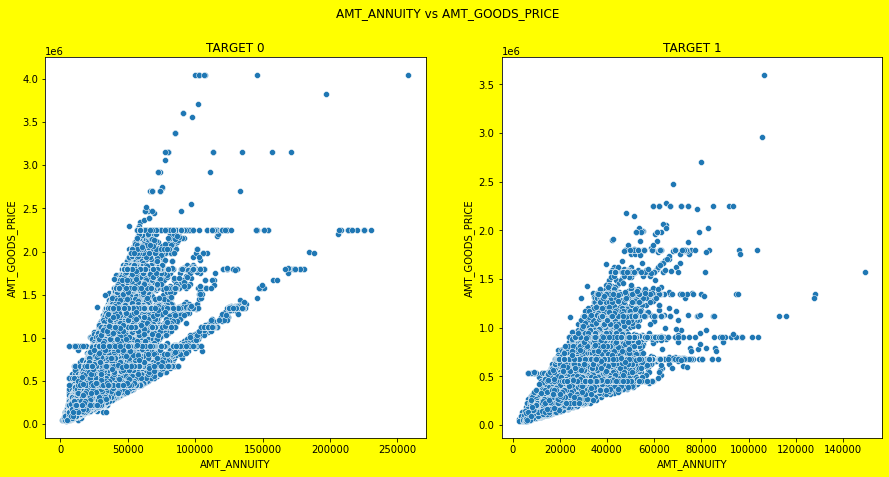

In [76]:
print('Target 0')
print(target0.AMT_GOODS_PRICE.describe())
print('Target 1')
print(target1.AMT_GOODS_PRICE.describe())
plt.figure(figsize=(15,7),facecolor='yellow')
plt.suptitle('AMT_ANNUITY vs AMT_GOODS_PRICE ')
plt.subplot(121)
plt.title('TARGET 0')
sns.scatterplot(data=target0,x='AMT_ANNUITY',y='AMT_GOODS_PRICE')
plt.subplot(122)
plt.title('TARGET 1')
sns.scatterplot(data=target1,x='AMT_ANNUITY',y='AMT_GOODS_PRICE')
plt.show()

# Conclusion : AMT_ANNUITY and AMT_GOODS_PRICE have positive Correlation.

# Now  Using the second data set for analysis

# A. Data Understanding

# 1.Reading data

In [79]:
df_2.head(5)  # showing 5 top rows of data

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [80]:
df_2.shape # shape of csv file

(1670214, 37)

In [81]:
# checking the data types 
df_2.dtypes 

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [82]:
# checking the data types count 
df_2.dtypes.value_counts() 

object     16
float64    15
int64       6
dtype: int64

# 2.Checking the missing values

In [83]:

df_2.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [84]:
percent_missing1 = df_2.isnull().sum() * 100 / len(df1)
percent_missing1

SK_ID_PREV                       0.000000
SK_ID_CURR                       0.000000
NAME_CONTRACT_TYPE               0.000000
AMT_ANNUITY                    121.047702
AMT_APPLICATION                  0.000000
AMT_CREDIT                       0.000325
AMT_DOWN_PAYMENT               291.320961
AMT_GOODS_PRICE                125.366247
WEEKDAY_APPR_PROCESS_START       0.000000
HOUR_APPR_PROCESS_START          0.000000
FLAG_LAST_APPL_PER_CONTRACT      0.000000
NFLAG_LAST_APPL_IN_DAY           0.000000
RATE_DOWN_PAYMENT              291.320961
RATE_INTEREST_PRIMARY          541.204380
RATE_INTEREST_PRIVILEGED       541.204380
NAME_CASH_LOAN_PURPOSE           0.000000
NAME_CONTRACT_STATUS             0.000000
DAYS_DECISION                    0.000000
NAME_PAYMENT_TYPE                0.000000
CODE_REJECT_REASON               0.000000
NAME_TYPE_SUITE                266.788830
NAME_CLIENT_TYPE                 0.000000
NAME_GOODS_CATEGORY              0.000000
NAME_PORTFOLIO                   0

In [2]:
#checking columns with more than 35% of missing values

In [85]:

len(percent_missing1[percent_missing1.values>35])
percent_missing1=percent_missing1[percent_missing1.values>35]


In [86]:
len(percent_missing1)

14

# 3.Removing column which has missing data more than 35 %


In [88]:
# Removing column which has missing data more than 35 %
df_2.drop(percent_missing1.index, axis=1, inplace = True)
df_2.shape

(1670214, 23)

In [89]:
df_2.isnull().sum()

SK_ID_PREV                       0
SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
AMT_APPLICATION                  0
AMT_CREDIT                       1
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
FLAG_LAST_APPL_PER_CONTRACT      0
NFLAG_LAST_APPL_IN_DAY           0
NAME_CASH_LOAN_PURPOSE           0
NAME_CONTRACT_STATUS             0
DAYS_DECISION                    0
NAME_PAYMENT_TYPE                0
CODE_REJECT_REASON               0
NAME_CLIENT_TYPE                 0
NAME_GOODS_CATEGORY              0
NAME_PORTFOLIO                   0
NAME_PRODUCT_TYPE                0
CHANNEL_TYPE                     0
SELLERPLACE_AREA                 0
NAME_SELLER_INDUSTRY             0
NAME_YIELD_GROUP                 0
PRODUCT_COMBINATION            346
dtype: int64

In [90]:
df_2.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [91]:
mode3=df_2.PRODUCT_COMBINATION.mode()[0]

In [92]:
df_2.PRODUCT_COMBINATION.fillna(mode3,inplace=True)

# B. Merging both data sets.

In [93]:
d2=d.merge(df_2, on = 'SK_ID_CURR', how = 'inner')

In [94]:
d2.shape

(1413701, 56)

In [95]:
d2.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START_x',
       'HOUR_APPR_PROCESS_START_x', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'SK_ID_PREV',
       'NAME_CONTRACT_TYPE_y', 'AMT_APPLICATION', 'AMT_CREDIT_y',
       'WEEKDAY_APPR_PROCESS_START_y', 'HOUR_APPR_PROCESS_START_y',
       'FLAG_LAST_APPL_PER_CONTRA

In [96]:
d2.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE_x            0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT_x                    0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 0
REGION_RATING_CLIENT            0
REGION_RATING_CLIENT_W_CITY     0
WEEKDAY_APPR_PROCESS_START_x    0
HOUR_APPR_PROCESS_START_x       0
REG_REGION_NOT_LIVE_REGION      0
REG_REGION_NOT_WORK_REGION      0
LIVE_REGION_NO

In [97]:
main=d2[['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER','PRODUCT_COMBINATION','NAME_GOODS_CATEGORY','NAME_PRODUCT_TYPE','FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL','AMT_CREDIT_x','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED','DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE','CNT_FAM_MEMBERS', 'ORGANIZATION_TYPE', 'AMT_APPLICATION', 'AMT_CREDIT_y', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS','CODE_REJECT_REASON', 'REGION_RATING_CLIENT']]

In [98]:
main.shape

(1413701, 29)

In [99]:
main.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'PRODUCT_COMBINATION', 'NAME_GOODS_CATEGORY', 'NAME_PRODUCT_TYPE',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'ORGANIZATION_TYPE',
       'AMT_APPLICATION', 'AMT_CREDIT_y', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'CODE_REJECT_REASON', 'REGION_RATING_CLIENT'],
      dtype='object')

# C. Separating in categorical and numerical columns

In [100]:
main_num=main.select_dtypes(include=[np.number])
main_cat=main.select_dtypes(exclude=[np.number])

In [101]:
main_num.shape

(1413701, 13)

In [102]:
main_cat.shape

(1413701, 16)

In [103]:
main_num.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'AMT_APPLICATION', 'AMT_CREDIT_y', 'REGION_RATING_CLIENT'],
      dtype='object')

In [104]:
main_cat.columns

Index(['NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'PRODUCT_COMBINATION',
       'NAME_GOODS_CATEGORY', 'NAME_PRODUCT_TYPE', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'ORGANIZATION_TYPE', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS',
       'CODE_REJECT_REASON'],
      dtype='object')

In [105]:
main.NAME_CONTRACT_STATUS.value_counts()

Approved        886099
Canceled        259441
Refused         245390
Unused offer     22771
Name: NAME_CONTRACT_STATUS, dtype: int64

# D.Separating on the basis on target column.

In [106]:
tar0=main[main.TARGET==0]
tar1=main[main.TARGET==1]

# E.Univariate and Bivariate analysis

TARGET 0
XNA                         722385
Mobile                      176990
Consumer Electronics         97380
Computers                    82635
Audio/Video                  78951
Furniture                    42781
Photo / Cinema Equipment     20051
Construction Materials       19868
Clothing and Accessories     18473
Auto Accessories              5663
Jewelry                       4719
Homewares                     4023
Medical Supplies              3058
Vehicles                      2567
Sport and Leisure             2356
Other                         2203
Gardening                     2166
Office Appliances             1821
Tourism                       1268
Medicine                      1222
Direct Sales                   303
Fitness                        159
Additional Service             102
Education                       84
Weapon                          60
Insurance                       52
Animals                          1
Name: NAME_GOODS_CATEGORY, dtype: int64
TARGET

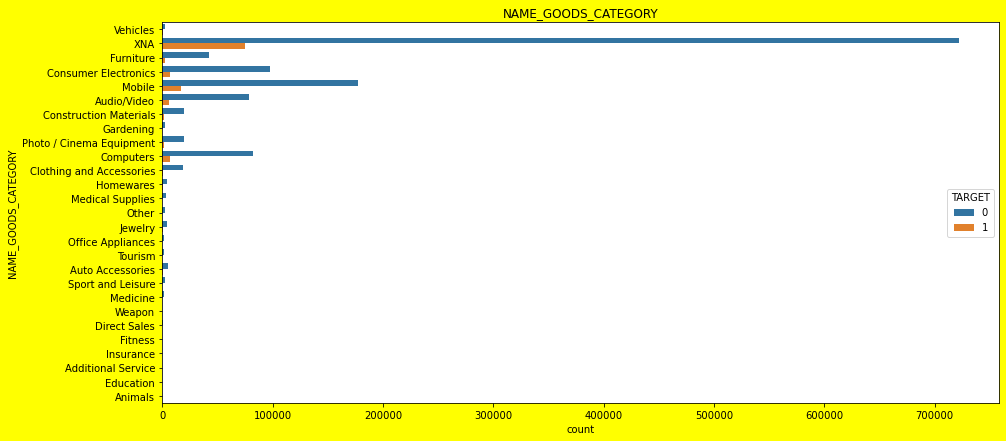

In [107]:
print('TARGET 0')
print(tar0.NAME_GOODS_CATEGORY.value_counts())
print('TARGET 1')
print(tar1.NAME_GOODS_CATEGORY.value_counts())
plt.figure(figsize=(15,7),facecolor='yellow')
sns.countplot(data=main,y=main.NAME_GOODS_CATEGORY,hue=main['TARGET'])
plt.title('NAME_GOODS_CATEGORY')
plt.show()

# Conclusion:
1.XNA,Mobile,Consumer Electronics,Computers are goods category taken with help of loan.                   
  

TARGET 0
Cash                              212920
POS household with interest       208948
POS mobile with interest          174035
Cash X-Sell: middle               110630
Cash X-Sell: low                  103318
Card Street                        83914
POS industry with interest         78245
POS household without interest     66770
Card X-Sell                        60561
Cash Street: high                  45824
Cash X-Sell: high                  44963
Cash Street: middle                26457
Cash Street: low                   25705
POS other with interest            18657
POS mobile without interest        18322
POS industry without interest      10128
POS others without interest         1944
Name: PRODUCT_COMBINATION, dtype: int64
TARGET 1
Cash                              22494
POS household with interest       17516
POS mobile with interest          16815
Card Street                       10680
Cash X-Sell: middle                9406
Cash X-Sell: low                   7281
Card 

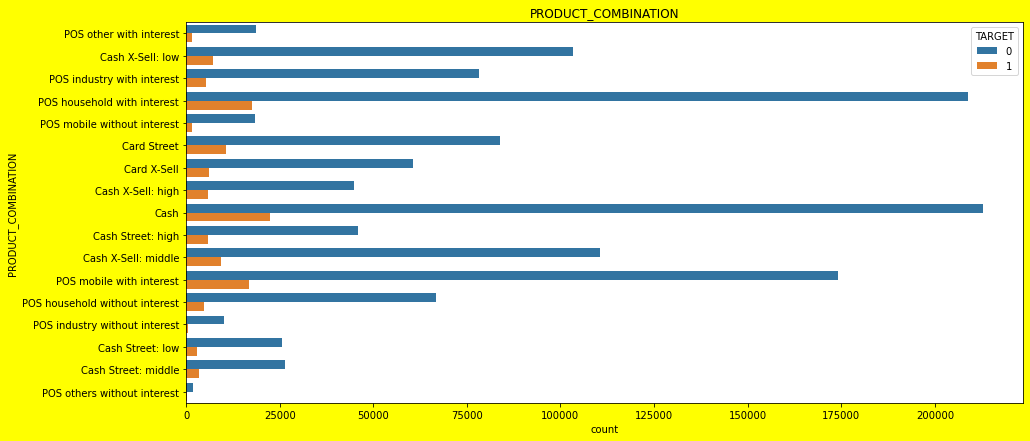

In [108]:
print('TARGET 0')
print(tar0.PRODUCT_COMBINATION.value_counts())
print('TARGET 1')
print(tar1.PRODUCT_COMBINATION.value_counts())

print(tar1.PRODUCT_COMBINATION.value_counts()/tar0.PRODUCT_COMBINATION.value_counts()) # find % change in target 1 and target 0
plt.figure(figsize=(15,7),facecolor='yellow')
sns.countplot(data=main,y=main.PRODUCT_COMBINATION,hue=main['TARGET'])
plt.title('PRODUCT_COMBINATION')
plt.show()

# Conclusion :
1. 13% Cash Street: middle product combination have highest defaulters.
2. Card Street,Card X-Sell ,Cash Cash Street: high  are other product combination were  have highest defaulters.

TARGET 0
XAP                                 721774
XNA                                 517893
Repairs                              17501
Other                                11759
Urgent needs                          6154
Buying a used car                     2151
Building a house or an annex          2020
Everyday expenses                     1836
Medicine                              1620
Payments on other loans               1321
Education                             1194
Journey                                931
Purchase of electronic equipment       817
Buying a new car                       806
Wedding / gift / holiday               707
Buying a home                          617
Furniture                              575
Car repairs                            564
Buying a holiday home / land           408
Business development                   313
Gasification / water supply            206
Buying a garage                        109
Hobby                                   36
Mo

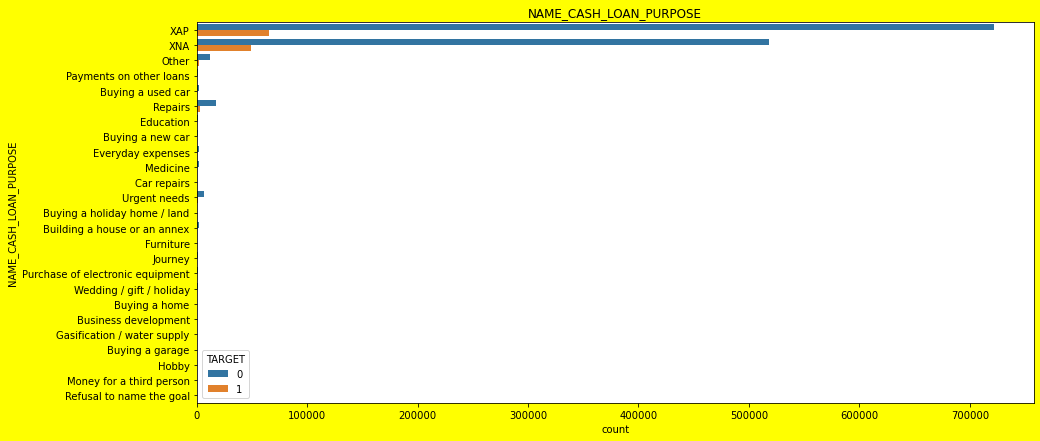

In [109]:
print('TARGET 0')
print(tar0.NAME_CASH_LOAN_PURPOSE.value_counts())
print('TARGET 1')
print(tar1.NAME_CASH_LOAN_PURPOSE.value_counts())
print(tar1.NAME_CASH_LOAN_PURPOSE.value_counts()/tar0.NAME_CASH_LOAN_PURPOSE.value_counts()) # find % change in target 1 and target 0
plt.figure(figsize=(15,7),facecolor='yellow')
sns.countplot(data=main,y=main.NAME_CASH_LOAN_PURPOSE,hue=main['TARGET'])
plt.title('NAME_CASH_LOAN_PURPOSE')
plt.show()

# Conclusion :
1. 30% of people of loan purpose  Refusal to name the goal were defaulters.
2. Hobby,Money for a third person,Payments on other loans,Gasification / water supply  ,Car repairs may have high chance to be defaulters

TARGET 0
Approved        818856
Canceled        235641
Refused         215952
Unused offer     20892
Name: NAME_CONTRACT_STATUS, dtype: int64
TARGET 1
Approved        67243
Refused         29438
Canceled        23800
Unused offer     1879
Name: NAME_CONTRACT_STATUS, dtype: int64


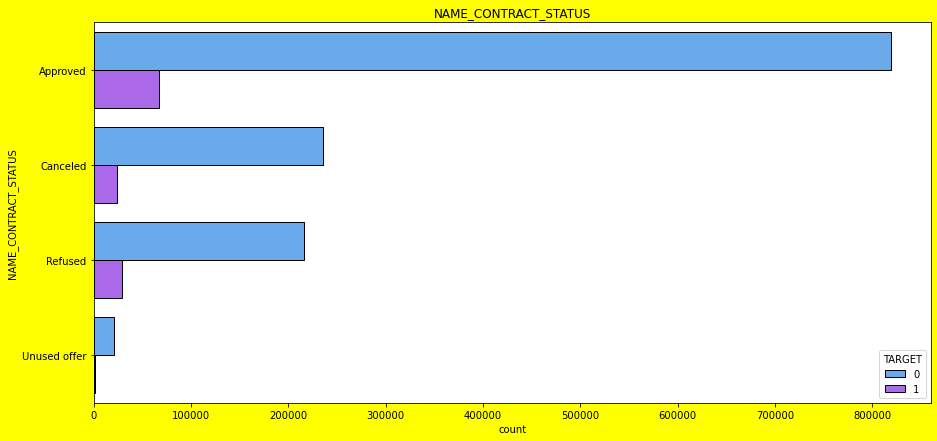

In [110]:
print('TARGET 0')
print(tar0.NAME_CONTRACT_STATUS.value_counts())
print('TARGET 1')
print(tar1.NAME_CONTRACT_STATUS.value_counts())
plt.figure(figsize=(15,7),facecolor='yellow')
sns.countplot(data=main,y=main.NAME_CONTRACT_STATUS,hue=main['TARGET'],palette='cool',ec='black')
plt.title('NAME_CONTRACT_STATUS')
plt.show()

# Conclusion :
1. 13% people who Refused  contract were unable to pay on time.
2. 10% people who Canceled contract were unable to pay on time.

TARGET 0
Working                 649909
Commercial associate    295396
Pensioner               257586
State servant            88370
Unemployed                  56
Student                     24
Name: NAME_INCOME_TYPE, dtype: int64
TARGET 1
Working                 74180
Commercial associate    26085
Pensioner               15958
State servant            6054
Unemployed                 67
Maternity leave            16
Name: NAME_INCOME_TYPE, dtype: int64


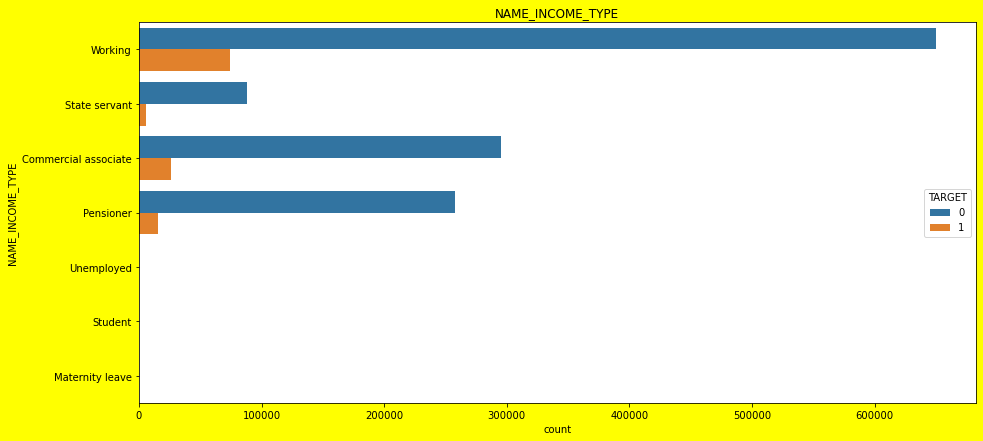

In [111]:
print('TARGET 0')
print(tar0.NAME_INCOME_TYPE.value_counts())
print('TARGET 1')
print(tar1.NAME_INCOME_TYPE.value_counts())
plt.figure(figsize=(15,7),facecolor='yellow')
sns.countplot(data=main,y=main.NAME_INCOME_TYPE,hue=main['TARGET'])
plt.title('NAME_INCOME_TYPE')
plt.show()

# Conclusion :
1. Working people are more,About 10% of total working people find problem in making payment.
2. 8% of state servant find problem in making payment.

TARGET 0
F      882303
M      408983
XNA        55
Name: CODE_GENDER, dtype: int64
TARGET 1
F    72836
M    49524
Name: CODE_GENDER, dtype: int64


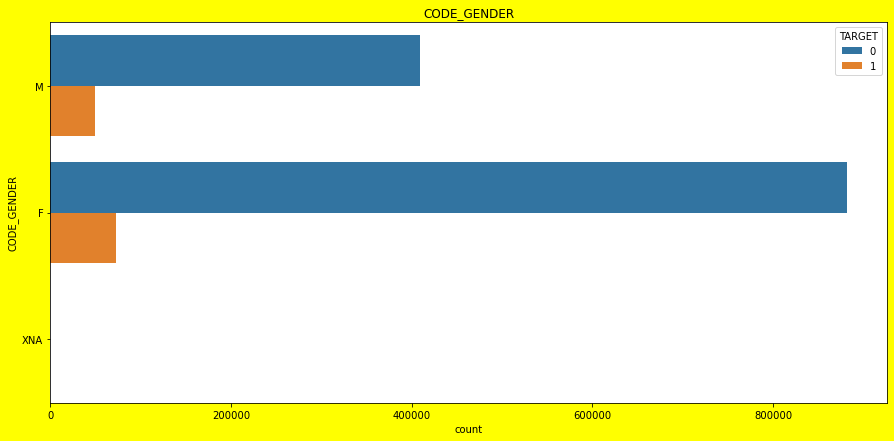

In [112]:
print('TARGET 0')
print(tar0.CODE_GENDER.value_counts())
print('TARGET 1')
print(tar1.CODE_GENDER.value_counts())
plt.figure(figsize=(15,7),facecolor='yellow')
sns.countplot(data=main,y=main.CODE_GENDER,hue=main['TARGET'])
plt.title('CODE_GENDER')
plt.show()

# Conclusion :
1. Female are good in payment than male.
2. But there are also more female with not payment on time.

# Multivariate Analysis

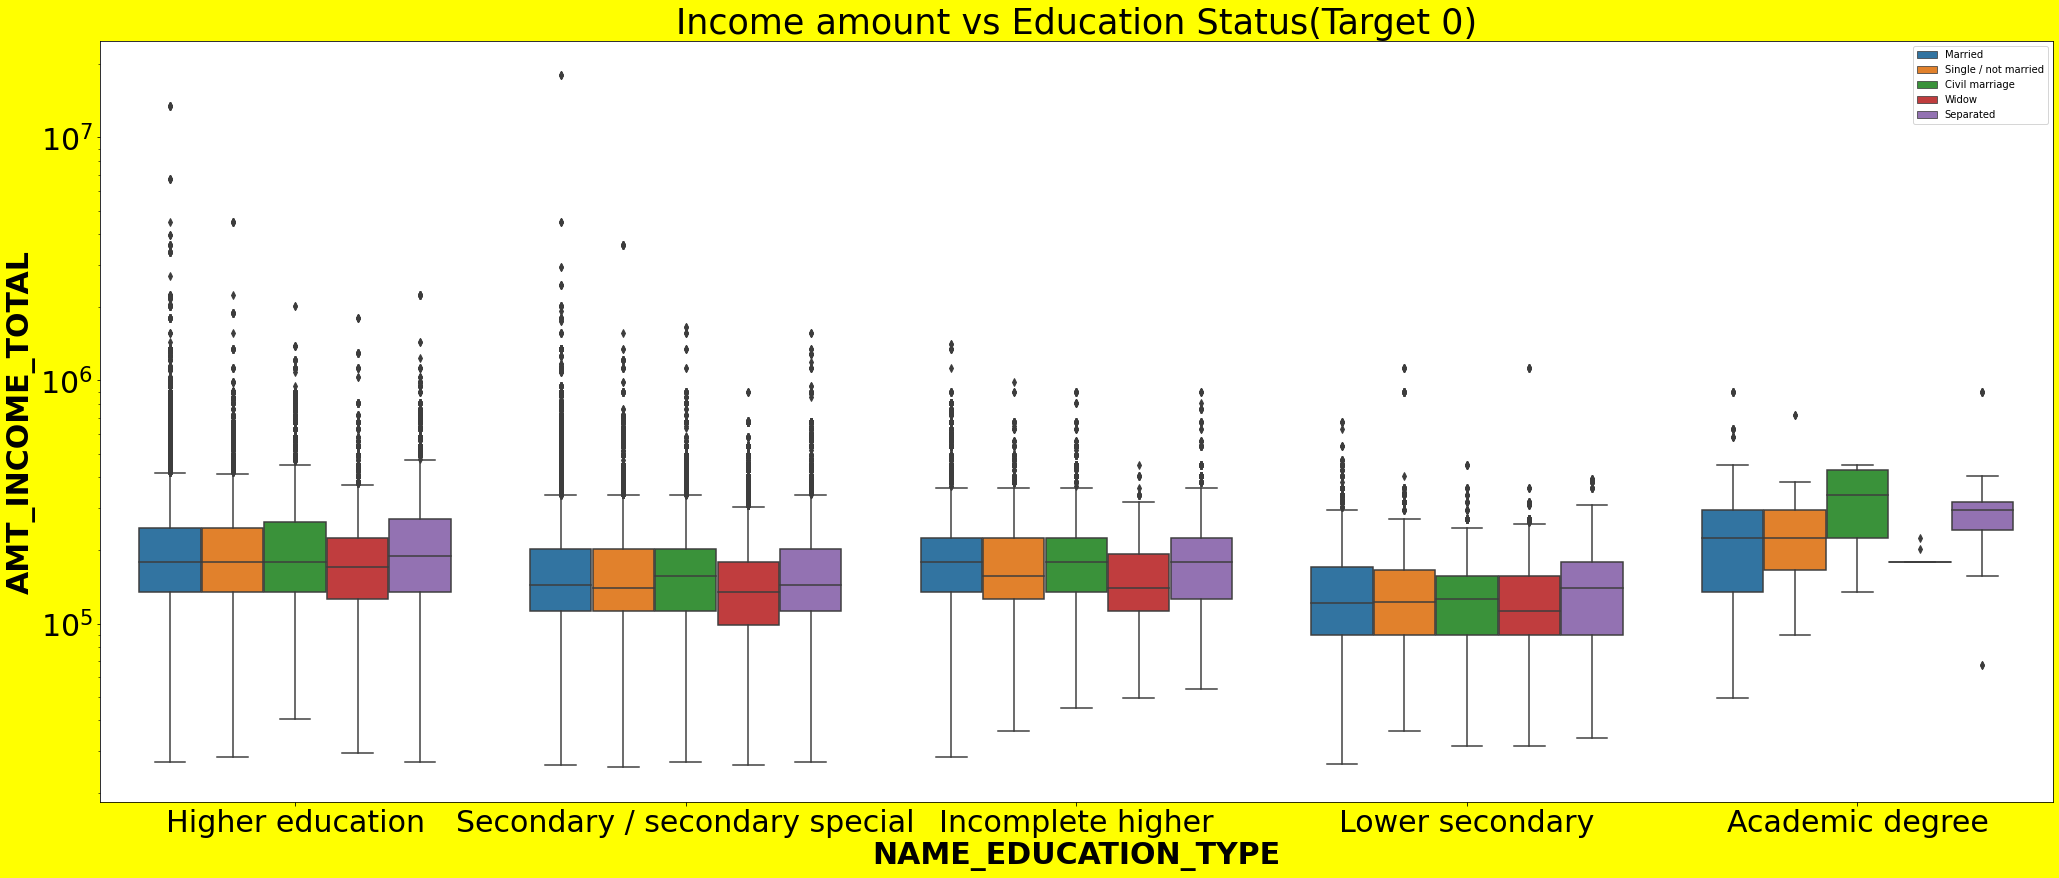

In [113]:
plt.figure(figsize=(35,14),facecolor='yellow') 
plt.yscale('log')                     
plt.xticks(rotation = 90)


sns.boxplot(data =tar0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')


plt.legend( loc = 'upper right')                                             
plt.title('Income amount vs Education Status(Target 0)',fontsize=35 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 30, fontweight="bold")
plt.xticks(rotation=0,fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

# Conclusion:
1.Clients having Higher Education, Incomplete Higher Education, Lower Secondary Education and Secondary/Secondary Special have a higher number of outliers.

2.From the above figure, we can say that some of the clients having Higher Education tend to have the highest income compared to others.

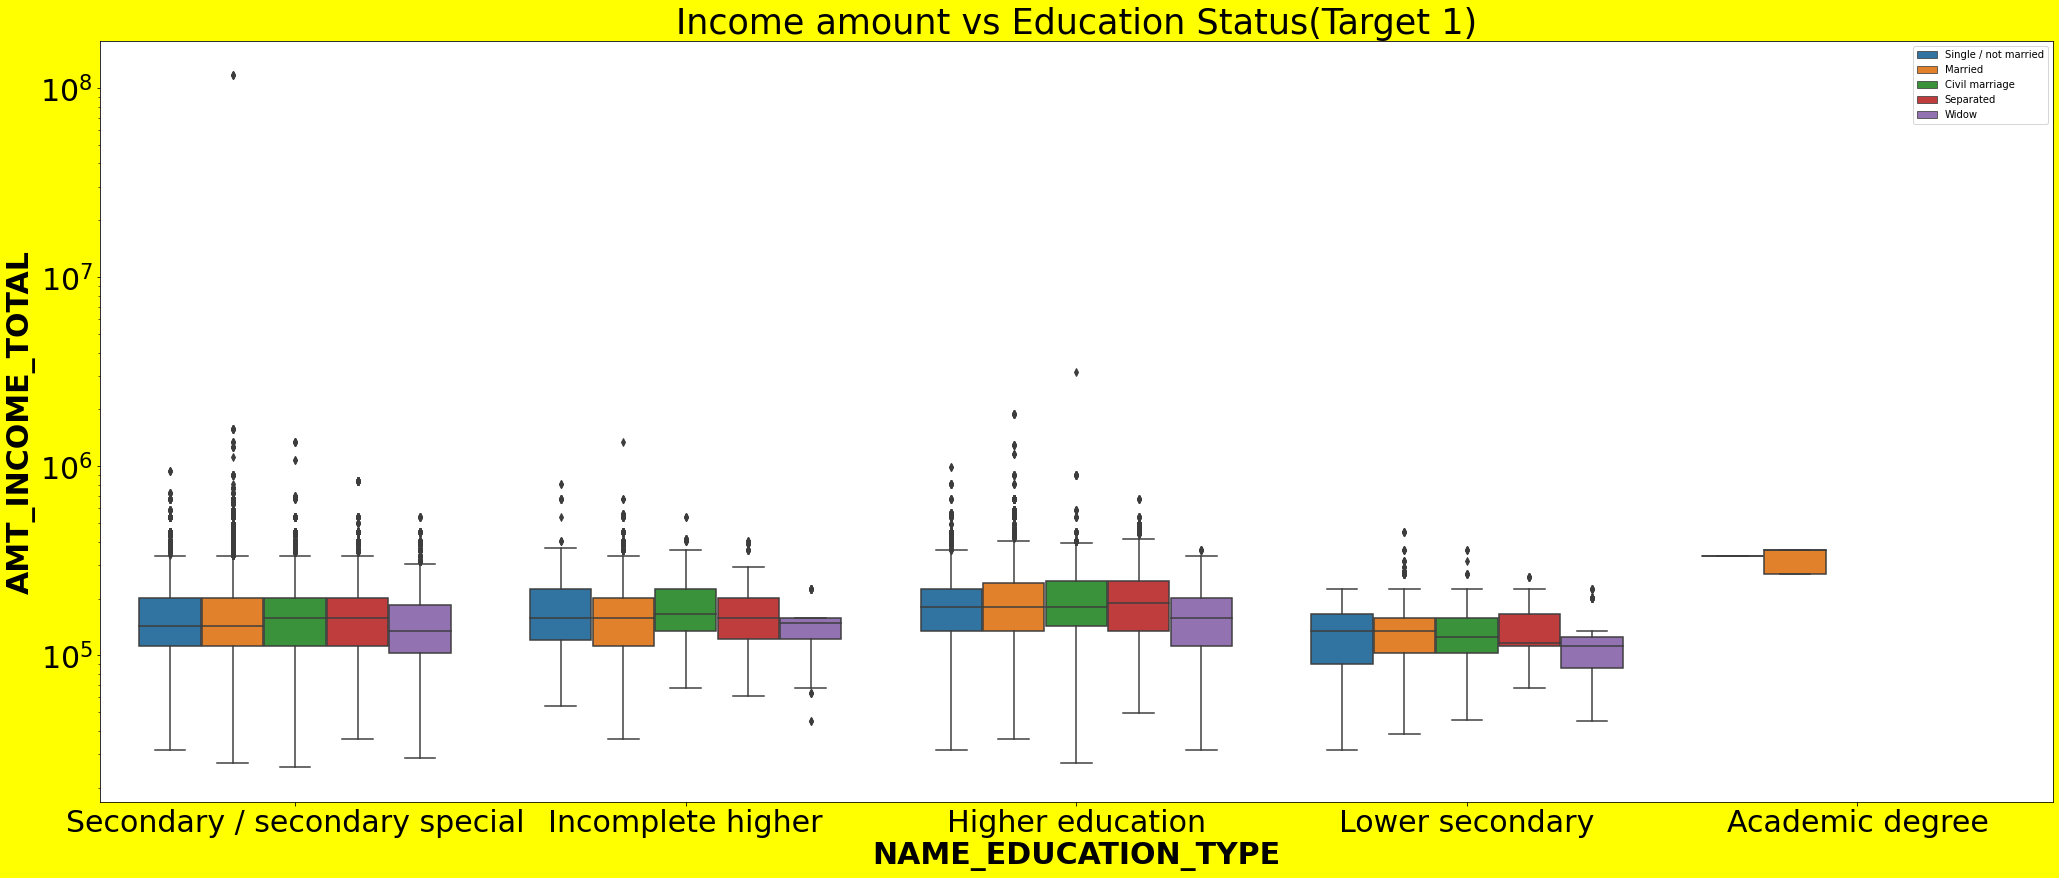

In [114]:
plt.figure(figsize=(35,14),facecolor='yellow') 
plt.yscale('log')                     
plt.xticks(rotation = 90)
sns.boxplot(data =tar1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.legend( loc = 'upper right')                                             
plt.title('Income amount vs Education Status(Target 1)',fontsize=35 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 30, fontweight="bold")
plt.xticks(rotation=0,fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()


# Conclusion:
1. There are low people with Academic degree
2. Also there are low outliers in income compared to people with payment on time . 

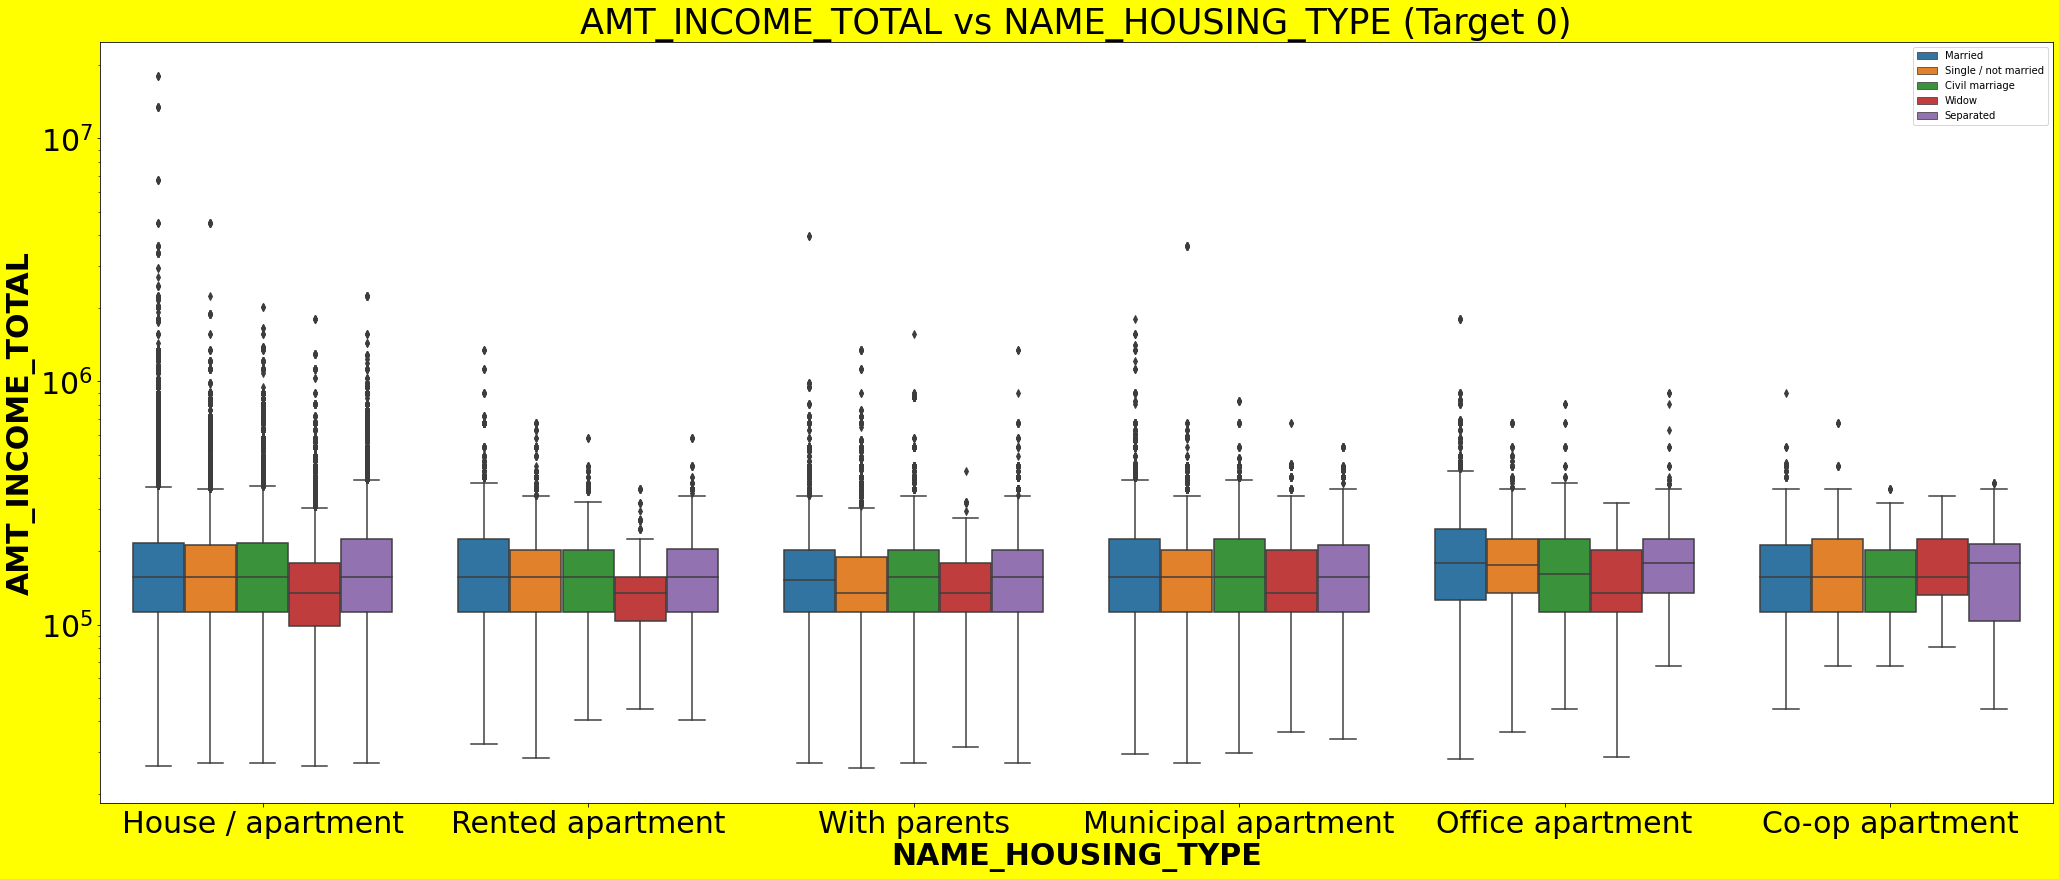

In [115]:
plt.figure(figsize=(35,14),facecolor='yellow') 
plt.yscale('log')                      
plt.xticks(rotation = 90)

sns.boxplot(data =tar0, x='NAME_HOUSING_TYPE',y='AMT_INCOME_TOTAL',hue ='NAME_FAMILY_STATUS',orient='v')
plt.legend( loc = 'upper right',)                                             
plt.title(' AMT_INCOME_TOTAL vs NAME_HOUSING_TYPE (Target 0) ',fontsize=35 )
plt.xlabel("NAME_HOUSING_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 30, fontweight="bold")
plt.xticks(rotation=0, fontsize=30)
plt.yticks(rotation=360, fontsize=30)
plt.show()

# Conclusion :
1. The income of the overall income is more compared to people with Target 0.
2. The people of housing type House / apartment have more income compared to other.
3. There are more outliers in income amount compared to people with Target 1.

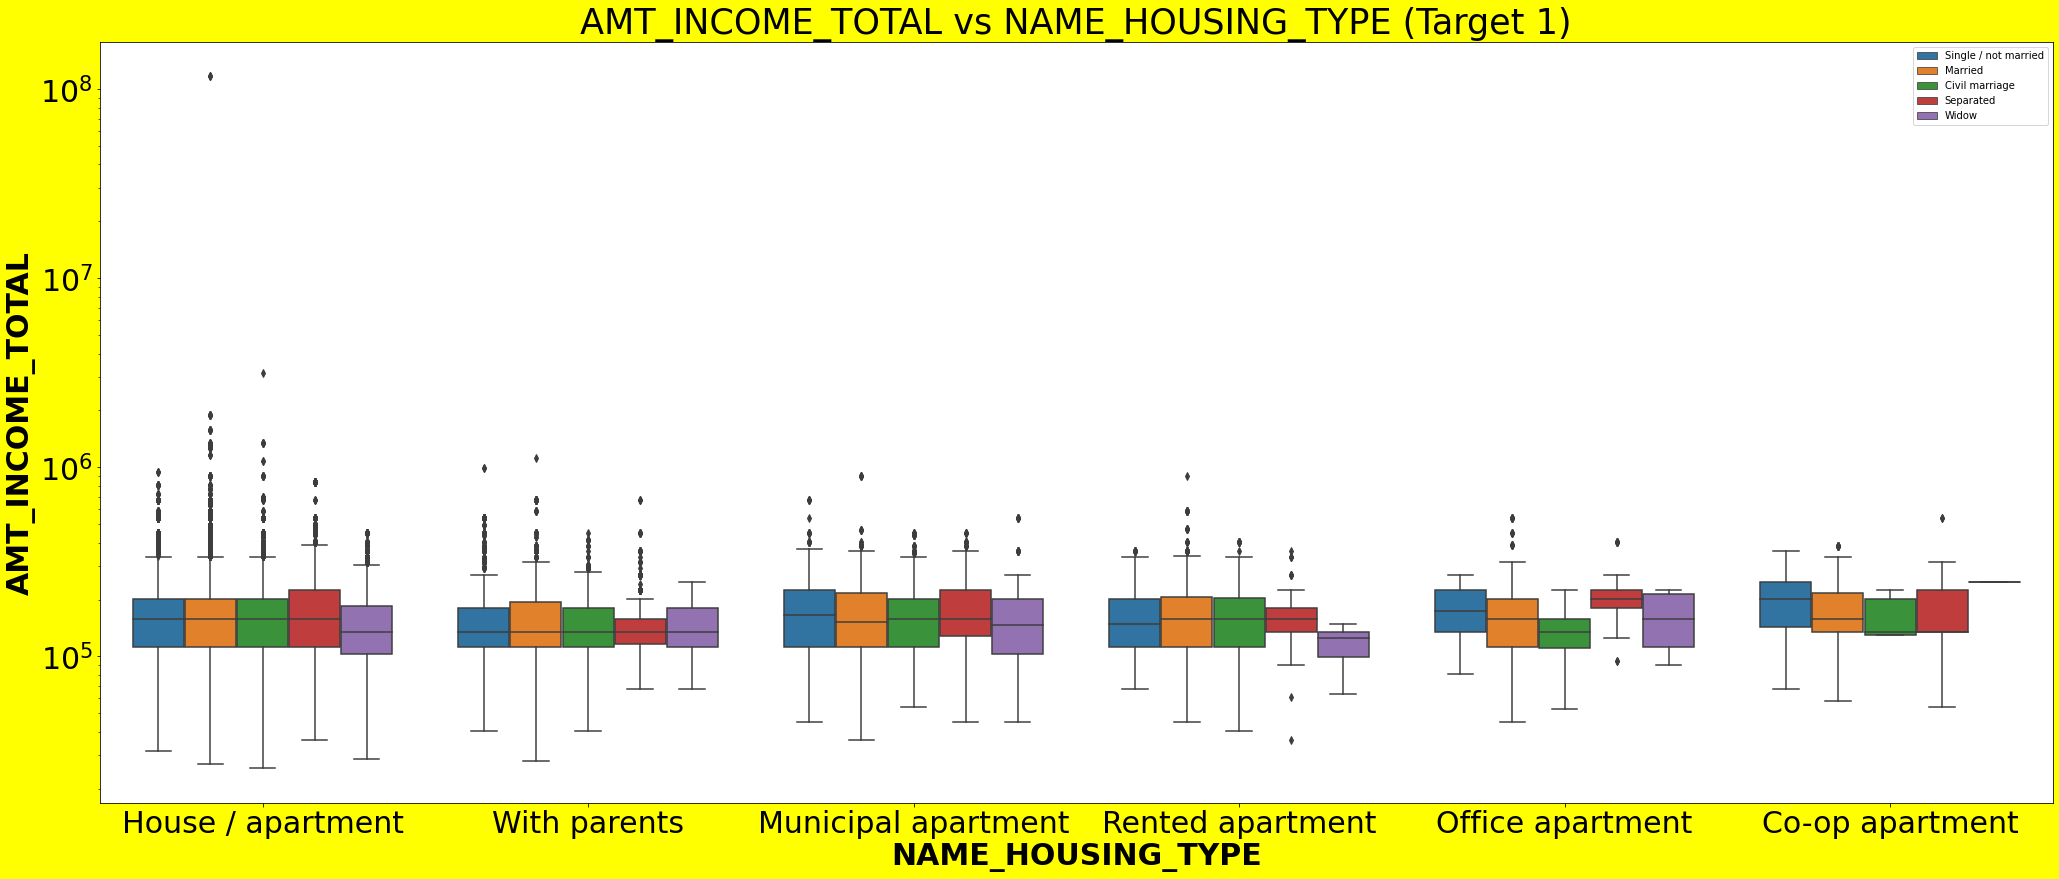

In [116]:
plt.figure(figsize=(35,14),facecolor='yellow') 
plt.yscale('log')                      
plt.xticks(rotation = 90)

sns.boxplot(data =tar1, x='NAME_HOUSING_TYPE',y='AMT_INCOME_TOTAL',hue ='NAME_FAMILY_STATUS',orient='v')
plt.legend( loc = 'upper right',)                                             
plt.title(' AMT_INCOME_TOTAL vs NAME_HOUSING_TYPE (Target 1) ',fontsize=35 )
plt.xlabel("NAME_HOUSING_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 30, fontweight="bold")
plt.xticks(rotation=0, fontsize=30)
plt.yticks(rotation=360, fontsize=30)
plt.show()

# Conclusion :
1. The income of the overall income is low compared to people with Target 1
2. The people of housing type House / apartment have more income compared to other

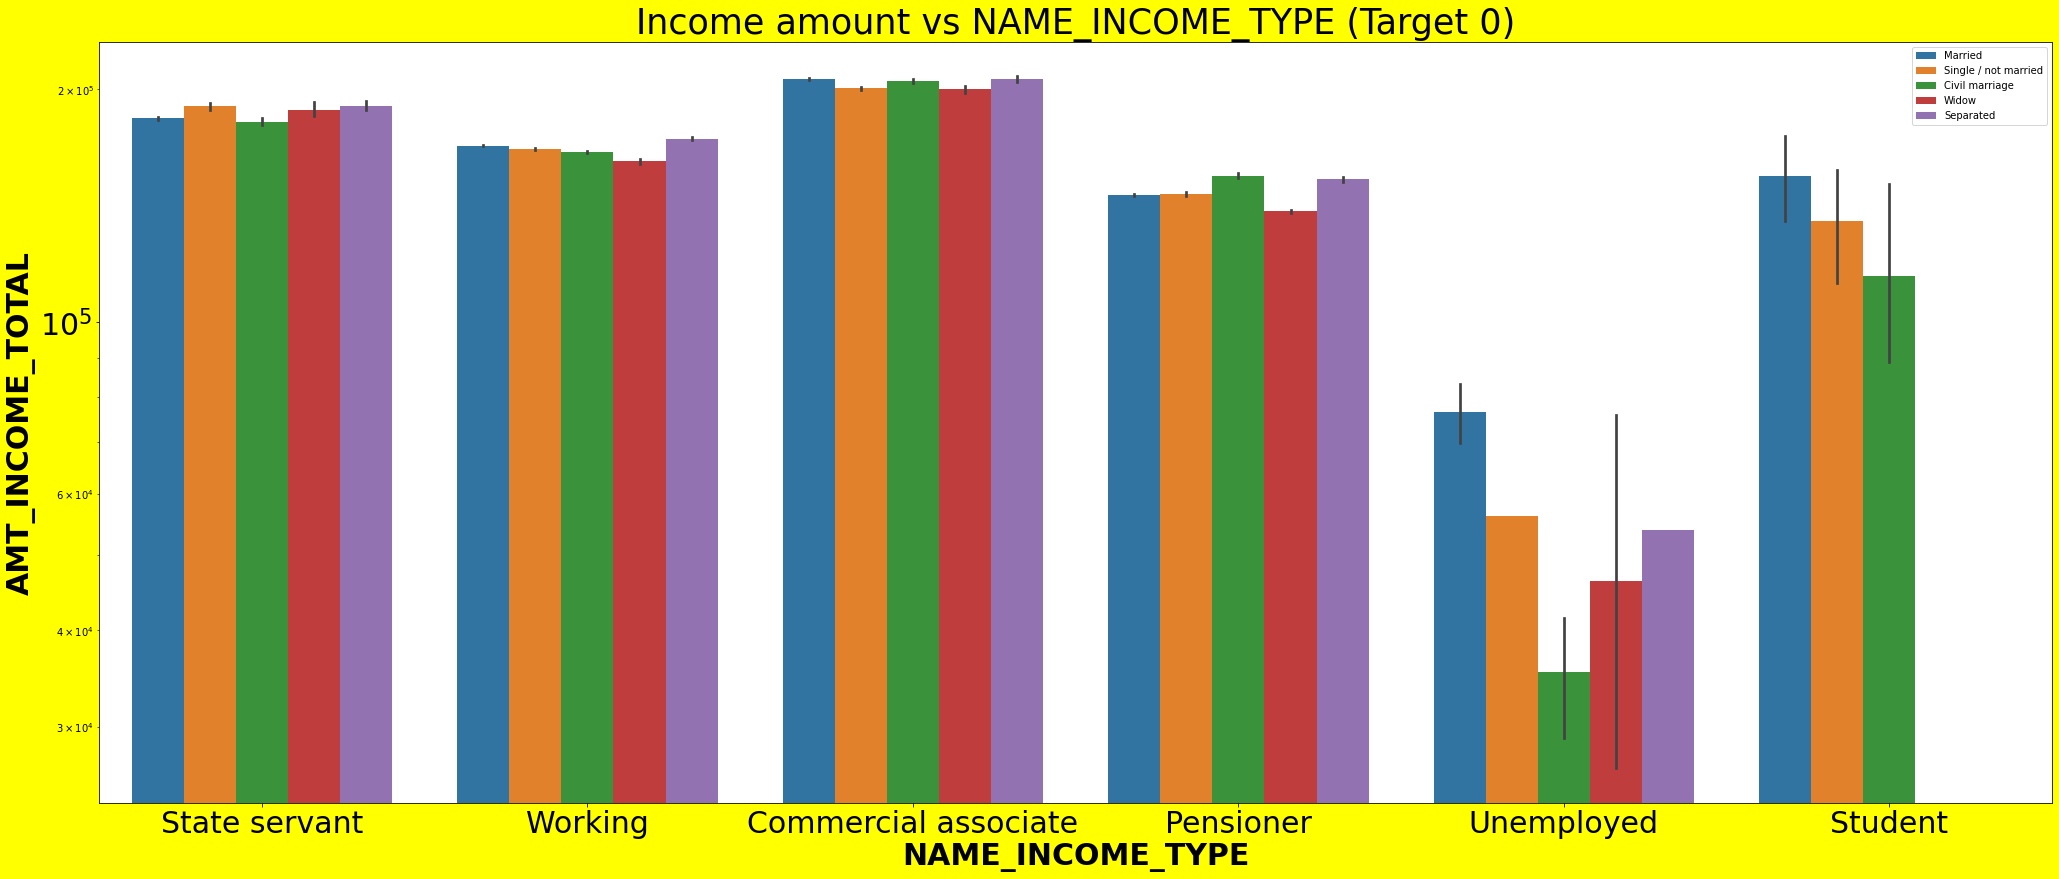

In [117]:
plt.figure(figsize=(35,14),facecolor='yellow') 
plt.yscale('log')                     
plt.xticks(rotation = 90)
sns.barplot(data =tar0, x='NAME_INCOME_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.legend( loc = 'upper right')                                             
plt.title('Income amount vs NAME_INCOME_TYPE (Target 0)',fontsize=35 )
plt.xlabel("NAME_INCOME_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 30, fontweight="bold")
plt.xticks(rotation=0, fontsize=30)
plt.yticks(rotation=360, fontsize=30)
plt.show()

# Conclusion:

1.Business man , and commercial associate are likely to apply more for loan and are Non-defaulters

2.Married Business man have more income compared to others and are non defaulters.

3.While pensioner ,student and unemployed have high risk of defaulters due to low income.


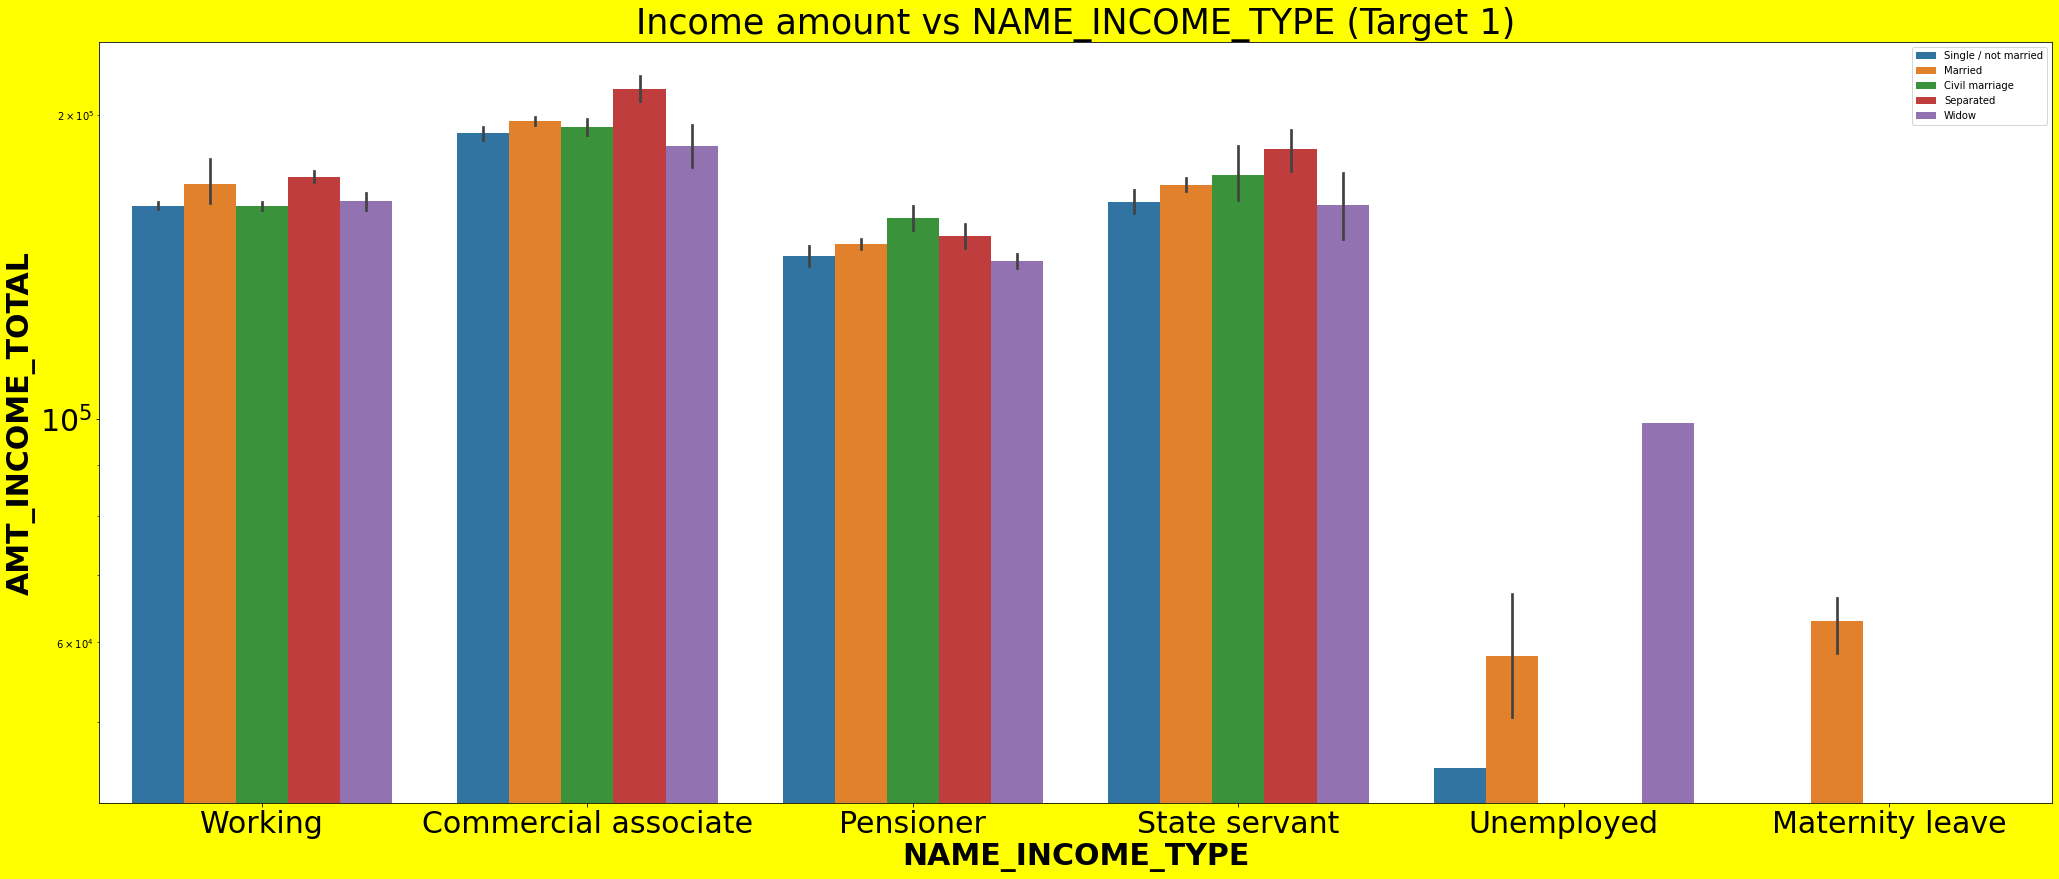

In [118]:
plt.figure(figsize=(35,14),facecolor='yellow') 
plt.yscale('log')                     
plt.xticks(rotation = 90)
sns.barplot(data =tar1, x='NAME_INCOME_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.legend( loc = 'upper right')                                             
plt.title('Income amount vs NAME_INCOME_TYPE (Target 1)',fontsize=35 )
plt.xlabel("NAME_INCOME_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 30, fontweight="bold")
plt.xticks(rotation=0, fontsize=30)
plt.yticks(rotation=360, fontsize=30)
plt.show()

# Conclusion :
 1.While pensioner ,student and unemployed have high risk of defaulters due to low income.
 
 2.Unemployed have low income and have high chance of risk. 

# Final Conclusion :
1.Person with Higher education , Academic degree should be preferred.

2.Applicant with income type of Business and commercial associate are likely to be non default.

3.Person with House as an asset can be preferred as a asset collateral and can we given loan.

4.Based on there avgerage income of different occupation we can provide loan to the new clients as per as there income and occupation.

5.Applicants who are employed and are married have lesser chance to be defaulter.

6.Male clients with Incomplete Education having very low salaries have a high risk of default.

7.30% of people of loan purpose Refusal to name the goal were defaulters.

8.Hobby,Money for a third person,Payments on other loans,Gasification / water supply ,Car repairs may have high chance to be defaulters

9.57% people with income type Unemployed have high chance to be defaulters.


